#Load Data

In [ ]:
#loading data - the Kaggle API method
!pip install kaggle #installing kaggle library
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/ #copying kaggle.json into newly made dir
!chmod 600 ~/.kaggle/kaggle.json #allocating required permission for this file

In [ ]:
!kaggle competitions download jigsaw-toxic-comment-classification-challenge #using the library to download

 38% 9.00M/23.4M [00:00<00:01, 14.7MB/s]
100% 23.4M/23.4M [00:00<00:00, 36.9MB/s]
 76% 20.0M/26.3M [00:00<00:00, 208MB/s]
100% 26.3M/26.3M [00:00<00:00, 168MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 183MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 207MB/s]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #data visualisation lib based on matplotlib (builds on top)

In [ ]:
!unzip test.csv.zip
!unzip train.csv.zip
!unzip test_labels.csv.zip #unzipping data

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test_labels.csv.zip
  inflating: test_labels.csv         


In [ ]:
df=pd.read_csv("train.csv")
tester=pd.read_csv("test.csv")
test_labels=pd.read_csv("test_labels.csv")

In [ ]:
test_labels.head(2) #a lot of the data values are -1 -> to be removed, as the -1 values include the rows weren't used for scoring in the kaggle accuracy metrics. Won't help us check if predicted are right/wrong

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1


In [ ]:
test_labels = test_labels[(test_labels[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)] #removing the -1s
print(test_labels.shape)
test_labels.head(2)

(63978, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0


In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
tester = pd.merge(tester, test_labels, on = "id") #merging the test dataset (based on id of comments) to have whole data, enabling us to check later 

In [ ]:
tester

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
63973,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
63974,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
63975,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
63976,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
tester.shape

(63978, 8)

#EDA

In [ ]:
df.dtypes #we have object and int64 types

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [ ]:
df.duplicated().sum() #checking if duplicates exist - none do.

0

In [ ]:
tester.duplicated().sum() #no duplicates in test, either. 

0

In [ ]:
df.isnull().sum() #no nulls exist in train

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
tester.isnull().sum() #no nulls in test

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
df_toxic = df.drop(['id', 'comment_text'], axis=1) #remove in order to do rowsum for the 6 category columns
counts = []
categories = list(df_toxic.columns.values) #gets column names
for i in categories:
    counts.append((i, df_toxic[i].sum())) #appends counts to column names
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Text(0.5, 0, 'category')

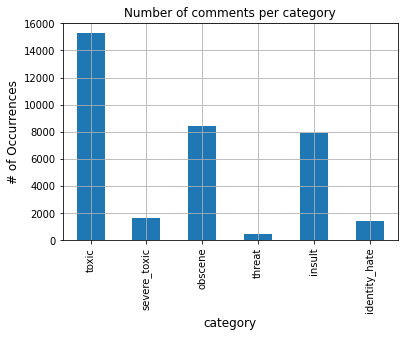

In [ ]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True) #plotting a bar plot
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

In [ ]:
lens = df.comment_text.str.len()  
lens.mean(), lens.std(), lens.max() #statistics of comments in training data

(394.0732213246768, 590.7202819048923, 5000)

In [ ]:
len_test=tester.comment_text.str.len()
len_test.mean(), len_test.std(), len_test.max() #stats of comments in test data

(383.3793178905249, 598.1100714808655, 5000)

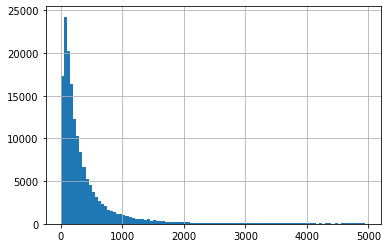

In [ ]:
lens.hist(bins = np.arange(0,5000,50)) #number of characters per comment - distribution plotting via a histogram

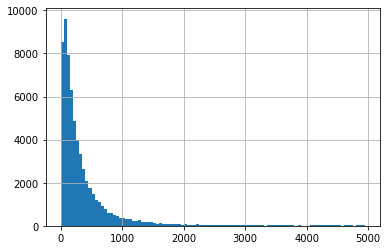

In [ ]:
len_test.hist(bins = np.arange(0,5000,50)) #similar for test, too

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of labels')

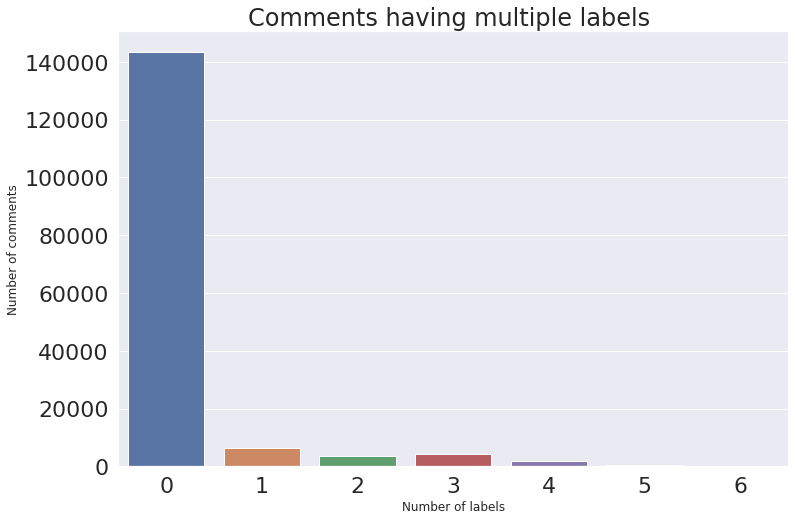

In [ ]:
rowSums = df.iloc[:,2:].sum(axis=1) #all category rows, (3rd to last col). iloc is 0 index based
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values) #number of labels (row values of df) by number of comments - make up the x and y axes
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

In [ ]:
clean=len(df[(df['toxic']==0) & (df['severe_toxic']==0) & (df['obscene']==0) & (df['threat']== 0) & (df['insult']==0) & (df['identity_hate']==0)]) #0 in all categories -> clean
print("Total comments = ",len(df))
print("Total clean comments = ", clean)
print("Total tags =", rowSums.sum()) # including multiple for some
print('Percentage of comments that are not labelled:')
print(clean/ len(df))
#shows mostly unlabelled. Let us check how many are labelled to understand the class imbalance. 

Total comments =  159571
Total clean comments =  143346
Total tags = 35098
Percentage of comments that are not labelled:
0.8983211235124177


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of labels')

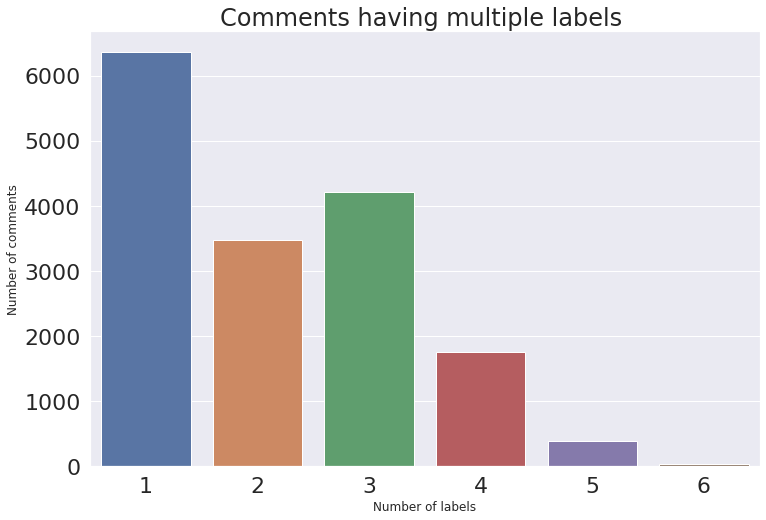

In [ ]:
rowSums = df.iloc[:,2:].sum(axis=1) #all category rows, (3rd to last col). iloc is 0 index based
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:] #excluding 0 labels, the first column - but similar to the last graph
sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

In [ ]:
df['clean']=(rowSums==0) #for ease of removing clean anywhere needed

In [ ]:
COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean']
df_comb = df.groupby(COLUMNS).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
df_comb
#after clean - top are just toxic, and insult, obscene and toxic's combo

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count
0,0,0,0,0,0,0,True,143346
1,1,0,0,0,0,0,False,5666
2,1,0,1,0,1,0,False,3800
3,1,0,1,0,0,0,False,1758
4,1,0,0,0,1,0,False,1215
5,1,1,1,0,1,0,False,989
6,1,0,1,0,1,1,False,618
7,0,0,1,0,0,0,False,317
8,0,0,0,0,1,0,False,301
9,1,1,1,0,1,1,False,265


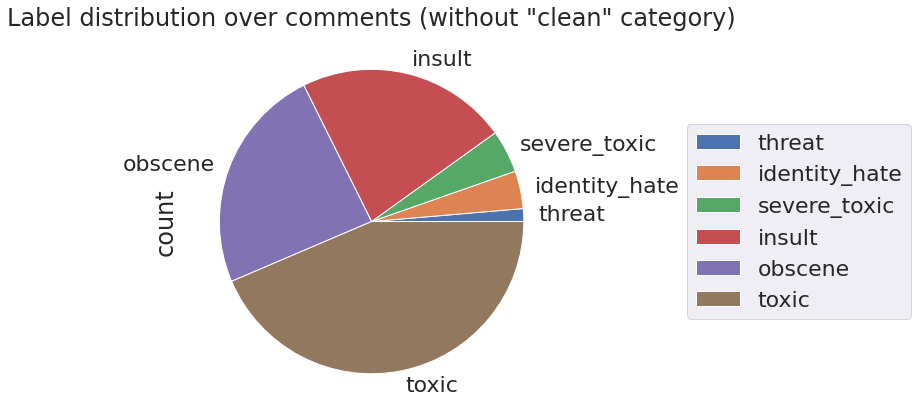

In [ ]:
COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean']
df_distribution = df[COLUMNS].sum().to_frame().rename(columns={0: 'count'}).sort_values('count') #to_frame converts series to df
df_distribution.drop('clean').plot.pie(y='count',
                                      title='Label distribution over comments (without "clean" category)',
                                      figsize=(7,7)).legend(loc='center left', bbox_to_anchor=(1.3, 0.5)) #informs which part of the bounding box to put the legend in, x and y coordinates

In [ ]:
df_distribution.sort_values('count', ascending=False) #toxic, obscene and insult are the top three after clean. class imbalance with clean

,count
clean,143346
toxic,15294
obscene,8449
insult,7877
severe_toxic,1595
identity_hate,1405
threat,478


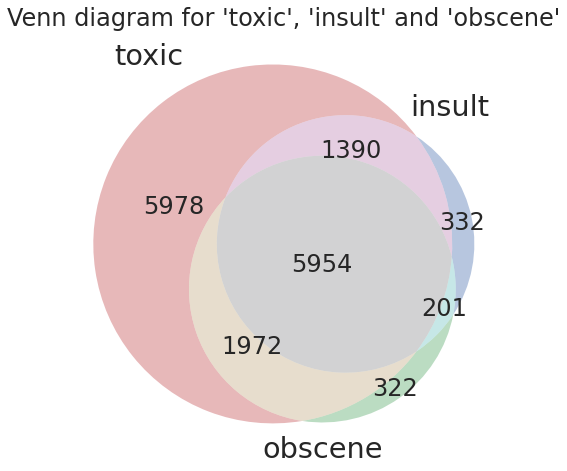

In [ ]:
t = df[(df['toxic'] == 1) & (df['insult'] == 0) & (df['obscene'] == 0)].shape[0] #storing combinations in variables
i = df[(df['toxic'] == 0) & (df['insult'] == 1) & (df['obscene'] == 0)].shape[0]
o = df[(df['toxic'] == 0) & (df['insult'] == 0) & (df['obscene'] == 1)].shape[0]

t_i = df[(df['toxic'] == 1) & (df['insult'] == 1) & (df['obscene'] == 0)].shape[0]
t_o = df[(df['toxic'] == 1) & (df['insult'] == 0) & (df['obscene'] == 1)].shape[0]
i_o = df[(df['toxic'] == 0) & (df['insult'] == 1) & (df['obscene'] == 1)].shape[0]

t_o_i = df[(df['toxic'] == 1) & (df['insult'] == 1) & (df['obscene'] == 1)].shape[0]

from matplotlib_venn import venn2
from matplotlib_venn import venn3

plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
venn3(subsets = (t, i, t_i, o, t_o, i_o, t_o_i), 
      set_labels=('toxic', 'insult', 'obscene'), set_colors=('r','b','g'))
plt.show()
#5954 are all 3 combo.
#only a small part of insult and obscene are not toxic

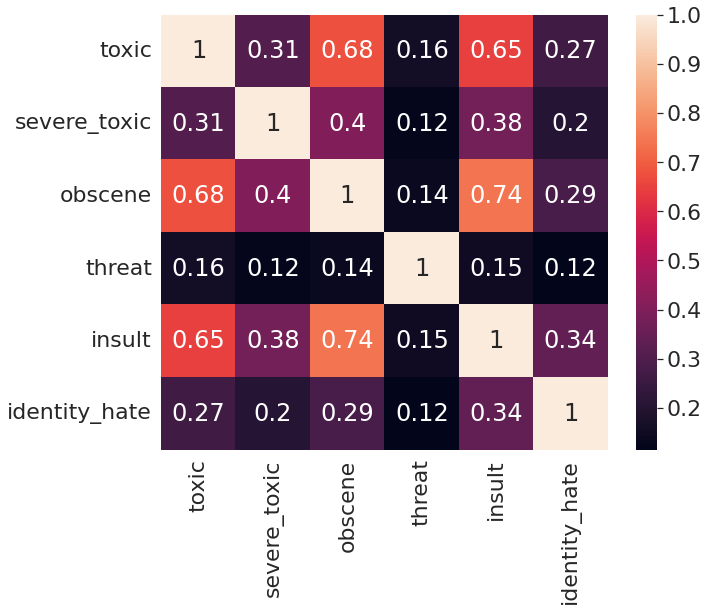

In [ ]:
unclean_df=df.iloc[:,2:-1] #filter by removing text columns, leaving binary behind

corr=unclean_df.corr() #compute pairwise correlation of columns, default pearson
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

#However, as this is binary type data (categorical - binary), we need to compare it in other ways.

In [ ]:
#Crosstab
#Since technically a crosstab between all 6 classes is impossible to vizualize, lets compare toxic to other tags (as toxic appears the most)
main_col="toxic"
corr_mats=[]
for other_col in unclean_df.columns[1:]: #excludes toxic, as it will be compared with rest
    confusion_matrix = pd.crosstab(unclean_df[main_col], unclean_df[other_col]) #computes a crosstabulation of 2 or more factors
    corr_mats.append(confusion_matrix) #append crosstab
out = pd.concat(corr_mats,axis=1,keys=unclean_df.columns[1:])
out
#144277 are not toxic - and none from it are severe_toxic. so, severe_toxic comment must be a toxic. Other classes seem to be a subset of toxic, with a few exceptions


severe_toxic       obscene        ...  insult       identity_hate      
severe_toxic            0     1       0     1  ...       0     1             0     1
toxic                                          ...                                  
0                  144277     0  143754   523  ...  143744   533        144174   103
1                   13699  1595    7368  7926  ...    7950  7344         13992  1302

[2 rows x 10 columns]

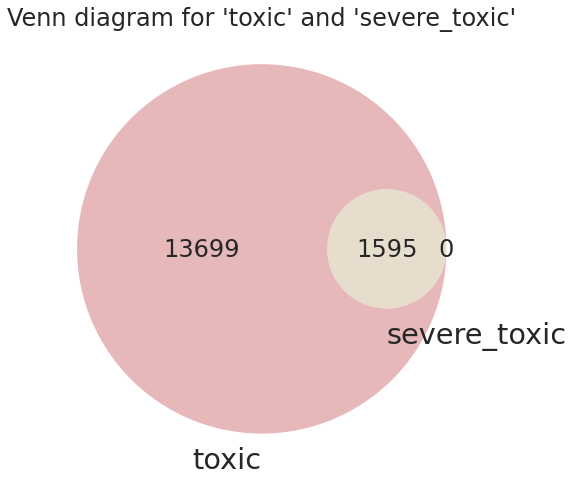

In [ ]:
t = df[(df['toxic'] == 1) & (df['severe_toxic'] == 0)].shape[0]
s = df[(df['toxic'] == 0) & (df['severe_toxic'] == 1)].shape[0]

t_s = df[(df['toxic'] == 1) & (df['severe_toxic'] == 1)].shape[0]


plt.figure(figsize=(8, 8))
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'severe_toxic'))
plt.show()
#severe toxic are all part of toxic

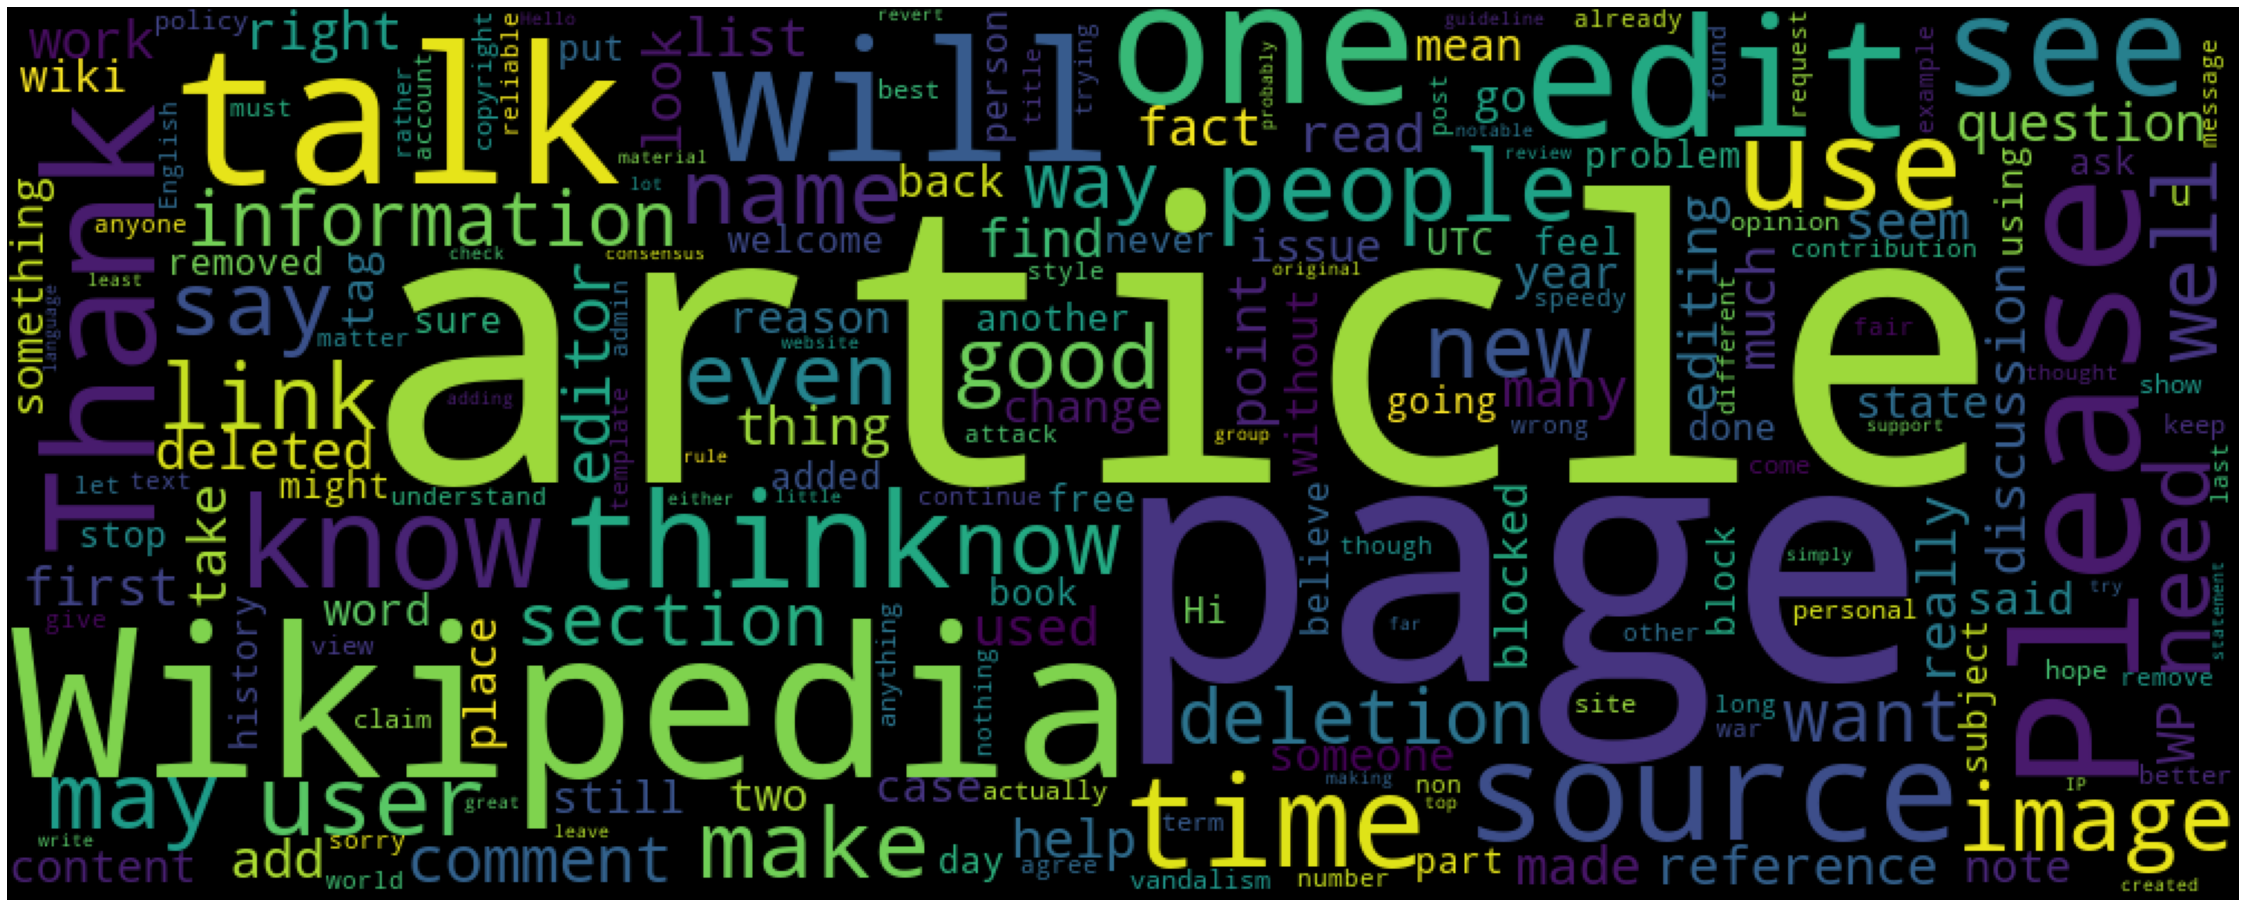

In [ ]:
from wordcloud import WordCloud,STOPWORDS
#Frequent words shown via a word cloud - more frequently occuring words are shown as bigger
plt.figure(figsize=(40,25))
# clean
subset = df[df.clean==True]
text = subset.comment_text.values #values() is an inbuilt method in Python programming language that returns a list of all the values available in a given dictionary
cloud_clean = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=1000,
                          height=400
                         ).generate(" ".join(text))
plt.axis('off')
plt.imshow(cloud_clean) #displays data as an image
#Collocations are phrases or expressions containing multiple words, that are highly likely to co-occur - like "social media"

In [ ]:
# plt.figure(figsize=(40,25))
# # toxic
# subset = df[df.clean==False]
# text = subset.comment_text.values
# cloud_toxic = WordCloud(
#                           stopwords=STOPWORDS,
#                           background_color='black',
#                           collocations=False,
#                           width=1000,
#                           height=400
#                          ).generate(" ".join(text))
# plt.axis('off')
# plt.imshow(cloud_toxic)

Sample Comments

In [ ]:
print("toxic:")
print(df[df.toxic==1].iloc[1,1])

toxic:
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


In [ ]:
print("Severe toxic:")
print(df[df.severe_toxic==1].iloc[1,1])

Severe toxic:
Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!


Some comments have IP Addresses, accents and punctuation. We need to remove this for an efficient model.

#Proprocessing and Cleaning

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re #regex
import sys
import warnings
to_clean = df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
if not sys.warnoptions: #warnings framework
    warnings.simplefilter("ignore") #doesn't print matching warnings - ignores them

In [ ]:
def cleanHtml(sentence): #removes HTML tags
    cleanr = re.compile('<.*?>') #compiles a regex pattern provided for a string
    cleantext = re.sub(cleanr, ' ', str(sentence)) #replaces occurances of cleanr characters with blank
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence) #r used to show raw string notation for regex patterns
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip() #removes spaces at beginning and end via strip function
    cleaned = cleaned.replace("\n"," ") #replaces newline with blank
    return cleaned
    
def keepAlpha(sentence): #numbers can lead to overfitting, so we remove
    alpha_sent = "" #initialise an empty string
    for word in sentence.split(): #for each word in a sentence
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word) #any char not in alphabets, replaced with blank
        alpha_sent += alpha_word
        alpha_sent += " " #re-inserting gap between words
    alpha_sent = alpha_sent.strip()
    return alpha_sent

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within']) #we add some words we saw frequently to the stopwords list that is inbuilt
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I) #re.I ignores case, compile regex 

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence) # substitute with blank in the place of the stopword

stemmer = SnowballStemmer("english") #special feature over porter - excludes stemming of stopwords. More than porter, less than Lancaster stemming (a good middle ground)
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " " #concatenate all stems
    stemSentence = stemSentence.strip()
    return stemSentence

def clean_conjunctions(text): #split abbreviations and conjunctions to the pair words
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
to_clean['comment_text'] = to_clean['comment_text'].str.lower() #applying all the functions we defined to test and train
to_clean['comment_text'] = to_clean['comment_text'].apply(cleanHtml)
to_clean['comment_text'] = to_clean['comment_text'].apply(cleanPunc)
to_clean['comment_text'] = to_clean['comment_text'].apply(keepAlpha)
to_clean['comment_text'] = to_clean['comment_text'].apply(removeStopWords)
to_clean['comment_text'] = to_clean['comment_text'].apply(stemming) 
to_clean['comment_text'] = to_clean['comment_text'].apply(clean_conjunctions)

In [ ]:
tester['comment_text'] = tester['comment_text'].str.lower()
tester['comment_text'] = tester['comment_text'].apply(cleanHtml)
tester['comment_text'] = tester['comment_text'].apply(cleanPunc)
tester['comment_text'] = tester['comment_text'].apply(keepAlpha)
tester['comment_text']=tester['comment_text'].apply(removeStopWords)
tester['comment_text']=tester['comment_text'].apply(stemming)
tester['comment_text'] = tester['comment_text'].apply(clean_conjunctions)

In [ ]:
to_clean

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seem stuck tha...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realli tri edit war guy constant re...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that on,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time ask view complet contradict covera...,0,0,0,0,0,0
159567,ffea4adeee384e90,asham horribl thing put talk page,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm there actual articl prostitut ring...,0,0,0,0,0,0
159569,fff125370e4aaaf3,look like actual put speedi first version dele...,0,0,0,0,0,0


In [ ]:
tester

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,thank understand think high would revert witho...,0,0,0,0,0,0
1,000247e83dcc1211,dear god site horribl,0,0,0,0,0,0
2,0002f87b16116a7f,somebodi invari tri add religion realli mean w...,0,0,0,0,0,0
3,0003e1cccfd5a40a,say right type type institut need case level s...,0,0,0,0,0,0
4,00059ace3e3e9a53,ad new product list make sure relev ad new pro...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
63973,fff8f64043129fa2,jerom see never got around surpris look exampl...,0,0,0,0,0,0
63974,fff9d70fe0722906,lucki bastard http wikimediafound org wiki pre...,0,0,0,0,0,0
63975,fffa8a11c4378854,shame want speak gay romanian,0,0,0,0,0,0
63976,fffac2a094c8e0e2,mel gibson nazi bitch make shitti movi much bu...,1,0,1,0,1,0


In [ ]:
df_cleaned=to_clean #making a new df to store a clean copy

In [ ]:
y=df_cleaned.drop(labels=['id','comment_text'], axis=1) #creating a "y" to use as a y_train later, with only the output variables

In [ ]:
y_matrix=y.to_numpy() #makes it a matrix
y_matrix

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
x=df_cleaned.drop(labels=['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], axis=1) #to use as training x input

#Split - for Tf-idf and BoW

In [ ]:
from sklearn.model_selection import train_test_split #to prevent a leaky (content sharing between train and outside data - not good for a practical model) model, we split ahead of time(For tf-idf and BoW)
X_train, X_test, y_train, y_test = train_test_split(x, y_matrix, test_size = 0.2, random_state = 0)

#BoW Pre-processing

In [ ]:
#All defaults bag of words parameters - refer to the documentation for individual in-depth meanings. 

from sklearn.feature_extraction.text import CountVectorizer
bow= CountVectorizer(stop_words='english',
    strip_accents='unicode', #remove language accents
    min_df=0.005, #ignore terms that occur in less than 0.5% of documents
    max_df=1.0, #ignore terms that occur in 100% of documents (all)
    analyzer='word', #word ngrams, not character or sentence
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 1), #only unigrams
    max_features=30000,
    encoding='utf-8')

In [ ]:
#Hyperparameters tuned (refer to section below)
from sklearn.feature_extraction.text import CountVectorizer

#group 1 - SGD classifier
bow_sgd = CountVectorizer(stop_words='english',
    strip_accents='unicode', #remove language accents
    min_df=0.01,
    max_df=0.25,
    analyzer='word', #word ngrams, not character or sentence
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 2), #only unigrams
    max_features=30000,
    encoding='utf-8') #ngram range, min and max df are tuned below and sorted into groups according to the tuning results

#group 2 - Ada boost
bow_mnb_ada= CountVectorizer(stop_words='english',
    strip_accents='unicode', #remove language accents
    min_df=0.001,
    max_df=0.25,
    analyzer='word', #word ngrams, not character or sentence
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 1), #only unigrams
    max_features=30000,
    encoding='utf-8')

#group 3 - SVC classifier
bow_svc= CountVectorizer(stop_words='english',
    strip_accents='unicode', #remove language accents
    min_df=0.005,
    max_df=0.5,
    analyzer='word', #word ngrams, not character or sentence
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 2), #only unigrams and bigrams
    max_features=30000,
    encoding='utf-8')

#group 4 - perceptron and logistic regression
bow_percep_logreg= CountVectorizer(stop_words='english',
    strip_accents='unicode', #remove language accents
    min_df=0.001,
    max_df=0.25,
    analyzer='word', #word ngrams, not character or sentence
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 2), #only unigrams and bigrams
    max_features=30000,
    encoding='utf-8')

#group 5 - passive aggressive classifier
bow_passaggress= CountVectorizer(stop_words='english',
    strip_accents='unicode', #remove language accents
    min_df=0.001,
    max_df=0.5,
    analyzer='word', #word ngrams, not character or sentence
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 2), #only unigrams and bigrams
    max_features=30000,
    encoding='utf-8')

#group 6 - decision trees
bow_dt= CountVectorizer(stop_words='english',
    strip_accents='unicode', #remove language accents
    min_df=0.001,
    max_df=0.75,
    analyzer='word', #word ngrams, not character or sentence
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 2), #only unigrams and bigrams
    max_features=30000,
    encoding='utf-8')

In [ ]:
#g1
x_bow_matrix_g1 = bow_sgd.fit_transform(X_train.comment_text)  #use BoW we defined above on our text and get a dict sparse matrix

In [ ]:
x_bow_matrix_g1

<127656x483 sparse matrix of type '<class 'numpy.int64'>'
	with 1649936 stored elements in Compressed Sparse Row format>

In [ ]:
import scipy.sparse
x_bow_g1=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_g1) #df from a sparse matrix - conversion

In [ ]:
x_bow_g1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127651,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
127652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
127653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
127654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_bow_matrix_test_g1 = bow_sgd.transform(X_test.comment_text) #same for test

In [ ]:
x_bow_matrix_test_g1

<31915x483 sparse matrix of type '<class 'numpy.int64'>'
	with 413146 stored elements in Compressed Sparse Row format>

In [ ]:
x_bow_test_g1=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_test_g1)

In [ ]:
x_bow_test_g1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31911,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31912,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31913,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#g2
x_bow_matrix_g2 = bow_mnb_ada.fit_transform(X_train.comment_text)

In [ ]:
x_bow_g2=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_g2)

In [ ]:
x_bow_matrix_test_g2 = bow_mnb_ada.transform(X_test.comment_text)

In [ ]:
x_bow_test_g2=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_test_g2)

In [ ]:
#g3
x_bow_matrix_g3 = bow_svc.fit_transform(X_train.comment_text)

In [ ]:
x_bow_g3=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_g3)

In [ ]:
x_bow_matrix_test_g3 = bow_svc.transform(X_test.comment_text)

In [ ]:
x_bow_test_g3=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_test_g3)

In [ ]:
#g4
x_bow_matrix_g4 = bow_percep_logreg.fit_transform(X_train.comment_text)

In [ ]:
x_bow_g4=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_g4)

In [ ]:
x_bow_matrix_test_g4 = bow_percep_logreg.transform(X_test.comment_text)

In [ ]:
x_bow_test_g4=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_test_g4)

In [ ]:
#g5
x_bow_matrix_g5 = bow_passaggress.fit_transform(X_train.comment_text)

In [ ]:
x_bow_g5=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_g5)

In [ ]:
x_bow_matrix_test_g5 = bow_passaggress.transform(X_test.comment_text)

In [ ]:
x_bow_test_g5=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_test_g5)

In [ ]:
#g6
x_bow_matrix_g6 = bow_dt.fit_transform(X_train.comment_text)

In [ ]:
x_bow_g6=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_g6)

In [ ]:
x_bow_matrix_test_g6 = bow_dt.transform(X_test.comment_text)

In [ ]:
x_bow_test_g6=pd.DataFrame.sparse.from_spmatrix(x_bow_matrix_test_g6)

#Tf-idf Preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#This set of tf-idf has hypertuned parameters for each set of models (evident in the variables used to store them)

#for SGD classifier, multinomial naive bayes, percerptron, logistic regression and adaboost - group 1
tfidf_sgd_mnb_percep_logreg_ada = TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
               encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None) #0.25, (1,1), 0.001, True - selected set of tuned (refer to hyperparameter tuning section below). parameters meaning obtained for documentation, rest (parameters not tuned) left as default 

#for svc classifier - group 2
tfidf_svc=TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='False',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)#0.25, (1,2), 0.001, False

#for decision tree - group 3
tfidf_dt=TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',
                input='content', lowercase=True, max_df=0.75, max_features=None,
                min_df=0.001, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None) #0.75, (1,2), 0.001, True

#for passive aggressive classifier - group 4
tfidf_passagress=TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=False,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None) #0.25, (1,1), 0.001, False

In [ ]:
#group 1:
x_tfidf_matrix_g1=tfidf_sgd_mnb_percep_logreg_ada.fit_transform(X_train.comment_text) #use tf-idf we defined above on our text and get a dict sparse matrix

In [ ]:
x_tfidf_matrix_g1

<127656x2889 sparse matrix of type '<class 'numpy.float64'>'
	with 2834849 stored elements in Compressed Sparse Row format>

In [ ]:
import scipy.sparse
x_tfidf_g1=pd.DataFrame.sparse.from_spmatrix(x_tfidf_matrix_g1) #df from a sparse matrix - conversion

In [ ]:
x_tfidf_g1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.742721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.109721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076707,0.0,0.0,0.0,0.0,0.110646,0.0,0.126214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127651,0.0,0.0,0.151607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164288,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.108746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127652,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127653,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127654,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

In [ ]:
x_tfidf_matrix_test_g1=tfidf_sgd_mnb_percep_logreg_ada.transform(X_test.comment_text) #applying same for test

In [ ]:
x_tfidf_test_g1=pd.DataFrame.sparse.from_spmatrix(x_tfidf_matrix_test_g1)

In [ ]:
#g2
x_tfidf_matrix_g2=tfidf_svc.fit_transform(X_train.comment_text) #use tf-idf on our text and get a dict matrix

In [ ]:
x_tfidf_g2=pd.DataFrame.sparse.from_spmatrix(x_tfidf_matrix_g2)

In [ ]:
x_tfidf_matrix_test_g2=tfidf_svc.transform(X_test.comment_text)
x_tfidf_test_g2=pd.DataFrame.sparse.from_spmatrix(x_tfidf_matrix_test_g2)

In [ ]:
#g3
x_tfidf_matrix_g3=tfidf_dt.fit_transform(X_train.comment_text) #use tf-idf on our text and get a dict matrix

In [ ]:
x_tfidf_g3=pd.DataFrame.sparse.from_spmatrix(x_tfidf_matrix_g3)

In [ ]:
x_tfidf_matrix_test_g3=tfidf_dt.transform(X_test.comment_text)
x_tfidf_test_g3=pd.DataFrame.sparse.from_spmatrix(x_tfidf_matrix_test_g3)

In [ ]:
#g4
x_tfidf_matrix_g4=tfidf_passagress.fit_transform(X_train.comment_text) #use tf-idf on our text and get a dict matrix

In [ ]:
x_tfidf_g4=pd.DataFrame.sparse.from_spmatrix(x_tfidf_matrix_g4)

In [ ]:
x_tfidf_matrix_test_g4=tfidf_passagress.transform(X_test.comment_text)
x_tfidf_test_g4=pd.DataFrame.sparse.from_spmatrix(x_tfidf_matrix_test_g4)

#Google's Pretrained Word2vec Pre-processing

In [ ]:
!kaggle datasets download -d umbertogriffo/googles-trained-word2vec-model-in-python #from https://www.kaggle.com/umbertogriffo/googles-trained-word2vec-model-in-python via Kaggle API

100% 3.17G/3.17G [01:05<00:00, 56.7MB/s]
100% 3.17G/3.17G [01:05<00:00, 52.0MB/s]


In [ ]:
!unzip googles-trained-word2vec-model-in-python.zip

Archive:  googles-trained-word2vec-model-in-python.zip
  inflating: GoogleNews-vectors-negative300.bin  
  inflating: GoogleNews-vectors-negative300.bin.gz  


In [ ]:
import gensim #generate similar package

In [ ]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True) #loads the given weight matrix in the original word2vec format

In [ ]:
word2vec

In [ ]:
w2v_df=df_cleaned #make a copy of the cleaned dataframe

In [ ]:
w2v_df['tokens'] = w2v_df['comment_text'].apply(lambda words: (words.split(" "))) #make tokens of the comments in the training dataframe

In [ ]:
w2v_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,"[explan, edit, made, usernam, hardcor, metalli..."
1,000103f0d9cfb60f,daww match background colour im seem stuck tha...,0,0,0,0,0,0,"[daww, match, background, colour, im, seem, st..."
2,000113f07ec002fd,hey man im realli tri edit war guy constant re...,0,0,0,0,0,0,"[hey, man, im, realli, tri, edit, war, guy, co..."
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0,"[cant, make, real, suggest, improv, wonder, se..."
4,0001d958c54c6e35,sir hero chanc rememb page that on,0,0,0,0,0,0,"[sir, hero, chanc, rememb, page, that, on]"
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time ask view complet contradict covera...,0,0,0,0,0,0,"[second, time, ask, view, complet, contradict,..."
159567,ffea4adeee384e90,asham horribl thing put talk page,0,0,0,0,0,0,"[asham, horribl, thing, put, talk, page]"
159568,ffee36eab5c267c9,spitzer umm there actual articl prostitut ring...,0,0,0,0,0,0,"[spitzer, umm, there, actual, articl, prostitu..."
159569,fff125370e4aaaf3,look like actual put speedi first version dele...,0,0,0,0,0,0,"[look, like, actual, put, speedi, first, versi..."


In [ ]:
MAX_VOCAB_SIZE = 175303 #how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 200 #max number of words in a comment to use
embed_dim = 300 #how big is each word vector (k, later)

In [ ]:
import tensorflow as tf  #required imports
from tensorflow import keras
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False) #initialise a tokenizer
tokenizer.fit_on_texts(w2v_df["comment_text"].tolist()) #updates vocab based on the comment tokens - makes a dictionary
training_sequences = tokenizer.texts_to_sequences(w2v_df["comment_text"].tolist()) #transforms each text to a seq of ints from a dict mapping

train_word_index = tokenizer.word_index #indices of words in the dictionary - see below
print('Found %s unique tokens.' % len(train_word_index))

train_data = sequence.pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all sentence seqs with 0 at beginning to be same len

#creating the embedding matrix
train_embedding_weights = np.zeros((len(train_word_index)+1, embed_dim)) #matrix with 0s of required dim
for word,index in train_word_index.items(): #for each word in training data
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(embed_dim) #either fill with pretrained weights if the word exists, or random weights
print(train_embedding_weights.shape) #index to put words in

Found 136407 unique tokens.
(136408, 300)


In [ ]:
train_word_index #dict mapping for all words in training data

{'articl': 1,
 'page': 2,
 'wikipedia': 3,
 'edit': 4,
 'talk': 5,
 'use': 6,
 'like': 7,
 'pleas': 8,
 'would': 9,
 'delet': 10,
 'dont': 11,
 'thank': 12,
 'sourc': 13,
 'see': 14,
 'think': 15,
 'make': 16,
 'know': 17,
 'time': 18,
 'im': 19,
 'peopl': 20,
 'user': 21,
 'say': 22,
 'get': 23,
 'go': 24,
 'block': 25,
 'need': 26,
 'remov': 27,
 'name': 28,
 'want': 29,
 'link': 30,
 'imag': 31,
 'person': 32,
 'discuss': 33,
 'look': 34,
 'work': 35,
 'help': 36,
 'even': 37,
 'inform': 38,
 'well': 39,
 'good': 40,
 'refer': 41,
 'fuck': 42,
 'comment': 43,
 'list': 44,
 'chang': 45,
 'way': 46,
 'question': 47,
 'ad': 48,
 'could': 49,
 'editor': 50,
 'point': 51,
 'section': 52,
 'tri': 53,
 'first': 54,
 'thing': 55,
 'read': 56,
 'take': 57,
 'wp': 58,
 'fact': 59,
 'new': 60,
 'vandal': 61,
 'seem': 62,
 'state': 63,
 'revert': 64,
 'right': 65,
 'find': 66,
 'reason': 67,
 'made': 68,
 'mani': 69,
 'place': 70,
 'ask': 71,
 'much': 72,
 'realli': 73,
 'mean': 74,
 'ive': 75,

In [ ]:
train_data #for fitting the NN - training data (one of two seperate things)

array([[   0,    0,    0, ...,   19, 1765, 1281],
       [   0,    0,    0, ...,    5,  866,  122],
       [   0,    0,    0, ...,  620,   97,  403],
       ...,
       [   0,    0,    0, ..., 2177, 8713, 3040],
       [   0,    0,    0, ...,   10,   34,  370],
       [   0,    0,    0, ...,   36, 1321, 1531]], dtype=int32)

In [ ]:
train_embedding_weights #put in NN architecture definition (the other thing)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65389985,  0.17460504,  0.10243097, ...,  0.53754615,
         0.21463181,  0.9061529 ],
       [ 0.17675781,  0.02929688,  0.01031494, ..., -0.22265625,
        -0.01416016, -0.08935547],
       ...,
       [ 0.62431273,  0.60260446,  0.58001075, ...,  0.17729586,
         0.32419201,  0.63872353],
       [ 0.18419917,  0.47675152,  0.60517789, ...,  0.57930465,
         0.6031547 ,  0.40901905],
       [ 0.08793207,  0.95345866,  0.33785947, ...,  0.83399597,
         0.10338219,  0.34019069]])

In [ ]:
test_sequences = tokenizer.texts_to_sequences(tester["comment_text"].tolist()) #transforms each text to a seq of ints - for test data
test_data = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

#FastText Pre-processing

In [ ]:
#import the needed packages

import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs

In [ ]:
ft_df=df_cleaned #make a copy of the cleaned

In [ ]:
!kaggle datasets download -d vsmolyakov/fasttext #download from kaggle

 95% 101M/107M [00:00<00:00, 122MB/s] 
100% 107M/107M [00:00<00:00, 122MB/s]


In [ ]:
!unzip fasttext.zip

Archive:  fasttext.zip
  inflating: wiki.simple.vec         


In [ ]:
import codecs #importing module that provides stream and file interfaces for transcoding data

In [ ]:
fastembed=codecs.open("wiki.simple.vec") #from https://www.kaggle.com/vsmolyakov/fasttext 

In [ ]:
fastembed #these are inbuilt fasttext word embeddings, trained on english wikipedia.

<_io.TextIOWrapper name='wiki.simple.vec' mode='r' encoding='UTF-8'>

In [ ]:
print('loading word embeddings...')
embeddings_index = {}
for line in tqdm(fastembed): #tqdm is a library for creating progress bars
    values = line.rstrip().rsplit(' ') #strip the lines of spaces on the right and split by blanks
    word = values[0] #first part of the line has the word itself, using that to store the embedding
    coefs = np.asarray(values[1:], dtype='float32') #the rest had the word's embedding
    embeddings_index[word] = coefs #store neatly in an array for each word - mapping words to their embeddings
fastembed.close()
print('found %s word vectors' % len(embeddings_index)) #total count of pre-trained vectors found

loading word embeddings...


111052it [00:08, 12692.35it/s]

found 111052 word vectors


In [ ]:
embeddings_index #the mappings, an array for each word/character

In [ ]:
len(embeddings_index)

111052

In [ ]:
tokenizer = RegexpTokenizer(r'\w+') #regex to tokenize, w=alphanumeric

In [ ]:
print("pre-processing train data...")
processed_docs_train = [] #init an empty array to store
training=ft_df['comment_text'].tolist() #converting all comments to a list
for doc in tqdm(training): #tokenize training data, doc by doc
    tokens = tokenizer.tokenize(doc) #tokenize each doc
    filtered = [word for word in tokens if word not in stop_words] #list of all tokens, not including the stop words
    processed_docs_train.append(" ".join(filtered)) #append all tokens together

processed_docs_test = [] #repeat for test data
testing=tester['comment_text'].tolist() #tokenize test data
for doc in tqdm(testing):
    tokens = tokenizer.tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test.append(" ".join(filtered))


pre-processing train data...


100%|██████████| 63978/63978 [00:00<00:00, 72107.51it/s]


In [ ]:
ft_df['doc_len'] = ft_df['comment_text'].apply(lambda words: len(words.split(" "))) #applying a lambda function to split by words and get length
max_seq_len = np.round(ft_df['doc_len'].mean() + ft_df['doc_len'].std()).astype(int) 
#pad to an appropriate length -> mean+std_dev, to use later

In [ ]:
print("tokenizing input data...")
MAX_NB_WORDS = 100000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False) #initialising another tokenizer
tokenizer.fit_on_texts(processed_docs_train + processed_docs_test)  #leaky - accidentally shares info between train and test. Trains tokenizer to later to texts_to_sequences
word_seq_train = tokenizer.texts_to_sequences(processed_docs_train) #text of tokens to sequence of ints
word_seq_test = tokenizer.texts_to_sequences(processed_docs_test)
word_index = tokenizer.word_index #index of the word in the dictionary
print("dictionary size: ", len(word_index)) #length of all comments tokens from comment text obtained

#pad sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len) #pads beginning with 0 by default to sequence length we found above
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)

tokenizing input data...
dictionary size:  184171


In [ ]:
#training params
batch_size = 256 #size of a batch

#model parameters
num_filters = 64 #number of filters
embed_dim = 300 #how big is each word vector (k, later)
weight_decay = 1e-4 #a way to penalise complexity and prevent overfitting

In [ ]:
#embedding matrix creation
print('preparing embedding matrix...') #to be given to model when training
words_not_found = [] #init an array to store all not found
nb_words = min(MAX_NB_WORDS, len(word_index)) #inorder to help with dimensions
embedding_matrix = np.zeros((nb_words, embed_dim)) # min(limit, number of words) x width we set
for word, i in word_index.items(): #for all token words
    if i >= nb_words: #boundary reached
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:   # words not found in embedding index will be all-zeros 
        embedding_matrix[i] = embedding_vector
    else: #if not found, append to the array we are storing in
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 69729


In [ ]:
print("sample words not found: ", np.random.choice(words_not_found, 10)) #ten random not found words
#some are regional words, names or typos

sample words not found:  ['gendelman' 'swedenman' 'textur' 'convivi' 'gaget' 'dumbfalcon'
 'frankopan' 'sarievski' 'citiat' 'turtl']


In [ ]:
num_classes=6 #as we have 6 labels possible (toxic classes)

#GloVe Pre-processing

In [ ]:
!kaggle datasets download -d takuok/glove840b300dtxt #from https://www.kaggle.com/takuok/glove840b300dtxt, via the kaggle API method

100% 2.08G/2.08G [00:19<00:00, 97.6MB/s]
100% 2.08G/2.08G [00:19<00:00, 114MB/s] 


In [ ]:
!unzip glove840b300dtxt.zip

Archive:  glove840b300dtxt.zip
  inflating: glove.840B.300d.txt     


In [ ]:
glove = open('glove.840B.300d.txt') #opening the file

In [ ]:
glove

<_io.TextIOWrapper name='glove.840B.300d.txt' mode='r' encoding='UTF-8'>

In [ ]:
glove_df=df_cleaned #make a copy of the cleaned dataframe

In [ ]:
embeddings_index = dict() #creating a dictionary - changeable, unordered and indexed [reading from pre-trained embeddings]
for line in glove:
	values = line.split(' ') #split the line by its spaces
	word = values[0] #first part of the line has the word itself, using that to store the embedding
	coefs = np.asarray(values[1:], dtype='float32') #the rest had the word's embedding
	embeddings_index[word] = coefs #store neatly in an array for each word - #mapping words to their embeddings
glove.close()

print('found %s word vectors.' % len(embeddings_index))

found 2196017 word vectors.


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence

In [ ]:
tokenizer = Tokenizer(num_words=20000)
X_train=glove_df["comment_text"].values #obtaining comment text for train and test
X_test=tester["comment_text"].values

tokenizer.fit_on_texts(list(X_train)) #tokenizer updates internal vocab based on a list of texts

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train) #turning the tokenized text into sequences - text to sequence of ints, one for each word
X_test  = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=200) #pads sequence to desired length with 0s at the start
X_test  = sequence.pad_sequences(X_test,  maxlen=200)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (159571, 200)
X_test shape:  (63978, 200)


In [ ]:
y_train = glove_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values 

In [ ]:
#create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 300)) #setting default 0 values in the matrix to be filled

for word, i in tokenizer.word_index.items(): #for each word in the training data's vocab
    embedding_vector = embeddings_index.get(word) #get the word from pretrained 
    if embedding_vector is not None: #if the word was found in the pretrained vocab
        embedding_matrix[i] = embedding_vector #(only puts existing words in)

#Predictions

#Bag of Words

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score

def print_score(y_pred, clf): #defining one clean method to print scores
    print("Clf: ", clf.__class__.__name__) #prints classifier name
    print("Jacard score: {}".format(jaccard_score(y_test, y_pred, average="weighted"))) #via the inbuilt jaccard score function
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100)) #via the inbuilt hamming loss function
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted'))) #via the inbuilt f1 score function
    print("---")     

from sklearn.dummy import DummyClassifier #importing necessary libraries and packages
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Bag of Words models, before hyperparameter tuning

#classic models
dummy = DummyClassifier() 
sgd = SGDClassifier()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
nb= MultinomialNB(fit_prior=True, class_prior=None) #clf = classifier, fit_prior is to learn class probabilities or not. false uses a uniform prior. 
#class_prior is the prior probabilities of classes. If specified, priors not adjusted according to data
dt = DecisionTreeClassifier(random_state=0)
ada=AdaBoostClassifier(n_estimators=30,learning_rate=1)


for classifier in [dummy, sgd, svc, perceptron, pac, nb, dt, ada]: #for each model
    clf = OneVsRestClassifier(classifier) #apply one vs rest classifier, one for each class in output
    clf.fit(x_bow, y_train) #fit the model on the training data
    y_pred = clf.predict(x_bow_test) #predict the output
    print_score(y_pred, classifier) #print metrics

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Clf:  DummyClassifier
Jacard score: 0.03619403958676651
Hamming loss: 6.938221317040054
F1 score: 0.0695054795736412
---
Clf:  SGDClassifier
Jacard score: 0.3986824120044344
Hamming loss: 2.457047365397671
F1 score: 0.6014467139092274
---


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Clf:  LinearSVC
Jacard score: 0.3549067788928829
Hamming loss: 2.5656692255470257
F1 score: 0.5592510763821192
---
Clf:  Perceptron
Jacard score: 0.3477491640786471
Hamming loss: 3.5265549114836285
F1 score: 0.5076382844773925
---
Clf:  PassiveAggressiveClassifier
Jacard score: 0.35452554982224516
Hamming loss: 3.3792887357042147
F1 score: 0.474418925108991
---
Clf:  MultinomialNB
Jacard score: 0.4122017127565852
Hamming loss: 3.281111285184605
F1 score: 0.5486889004136598
---
Clf:  DecisionTreeClassifier
Jacard score: 0.3284692424431479
Hamming loss: 3.9276202412658625
F1 score: 0.48311794961478577
---
Clf:  AdaBoostClassifier
Jacard score: 0.3717271387783077
Hamming loss: 2.5661914460285136
F1 score: 0.5418794829076415
---


In [ ]:
#Bag of Words, post hyperparameter tuning
#group 1, SGD Classifier - got lower - maybe have to tune other parameters, or have a larger gridsearch grid

sgd = SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=500, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False) #all values are default except for the tuned parameters - refer to the tuning section of code

for classifier in [sgd]: #similar to above, for each model, applies one vs rest, fits, predicts and outputs a set of metrics
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_bow_g1, y_train)
    y_pred = clf.predict(x_bow_test_g1)
    print_score(y_pred, classifier)

Clf:  SGDClassifier
Jacard score: 0.26168242436072864
Hamming loss: 2.895712569846989
F1 score: 0.4575701831024469
---


In [ ]:
#group 2- Naive Bayes and Adaboost

nb= MultinomialNB(alpha=1, class_prior=None,fit_prior='True') #clf = classifier, fit_prior is to learn class probabilities or not. false uses a uniform prior. 
#class_prior is the prior probabilities of classes. If specified, priors not adjusted according to data

ada=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=None, #does slightly worse - only because we didn't explore enough params. we use default.
                                                 learning_rate=0.5,
                                                 n_estimators=75,
                                                 random_state=None)

for classifier in [nb, ada]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_bow_g2, y_train)
    y_pred = clf.predict(x_bow_test_g2)
    print_score(y_pred, classifier)

Clf:  MultinomialNB
Jacard score: 0.5043985703563271
Hamming loss: 2.9745678625515692
F1 score: 0.6213864855120588
---
Clf:  AdaBoostClassifier
Jacard score: 0.3511895899580807
Hamming loss: 2.546347067731997
F1 score: 0.5288090099510852
---


In [ ]:
#group 3 - SVC classifier

svc = LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='hinge', max_iter=100,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)

for classifier in [svc]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_bow_g3, y_train)
    y_pred = clf.predict(x_bow_test_g3)
    print_score(y_pred, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Clf:  LinearSVC
Jacard score: 0.3741162179595226
Hamming loss: 2.509269413546399
F1 score: 0.5804741162302791
---


In [ ]:
#group 4 - Perceptron (40mins to run) - did very slightly worse than default (not enough possibilities in search grid maybe)

perceptron = Perceptron(alpha=0.0001, class_weight=None,
                                         early_stopping=False, eta0=1.0,
                                         fit_intercept=True, max_iter=100,
                                         n_iter_no_change=5, n_jobs=None,
                                         penalty='l2', random_state=0,
                                         shuffle=True, tol=0.001,
                                         validation_fraction=0.1, verbose=0,
                                         warm_start=False)

for classifier in [perceptron]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_bow_g4, y_train)
    y_pred = clf.predict(x_bow_test_g4)
    print_score(y_pred, classifier)

Clf:  Perceptron
Jacard score: 0.32613469776663534
Hamming loss: 3.4811217295942347
F1 score: 0.4713297785838338
---


In [ ]:
#group 5 - Passive Aggressive Classifier

pac = PassiveAggressiveClassifier(C=0.5, average=False,class_weight=None,
                                                          early_stopping=False,
                                                          fit_intercept=True,
                                                          loss='hinge',
                                                          max_iter=500,
                                                          n_iter_no_change=5,
                                                          n_jobs=None,
                                                          random_state=None,
                                                          shuffle=True,
                                                          tol=0.001,
                                                          validation_fraction=0.1,
                                                          verbose=0,
                                                          warm_start=False)

for classifier in [pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_bow_g5, y_train)
    y_pred = clf.predict(x_bow_test_g5)
    print_score(y_pred, classifier)


Clf:  PassiveAggressiveClassifier
Jacard score: 0.461172922989786
Hamming loss: 2.5891691472139535
F1 score: 0.6050245424851318
---


In [ ]:
#group 6 - Decision Trees

dt = DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=50,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                     splitter='random')

for classifier in [dt]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_bow_g6, y_train)
    y_pred = clf.predict(x_bow_test_g6)
    print_score(y_pred, classifier)

Clf:  DecisionTreeClassifier
Jacard score: 0.42179726111688454
Hamming loss: 2.6575800302887878
F1 score: 0.5880377683312665
---


#Tf-idf

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score

def print_score(y_pred, clf): #defining one clean method to print scores
    print("Clf: ", clf.__class__.__name__) #prints classifier name
    print("Jacard score: {}".format(jaccard_score(y_test, y_pred, average="weighted"))) #via the inbuilt jaccard score function
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100)) #via the inbuilt hamming loss function
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted'))) #via the inbuilt f1 score function
    print("---")   

In [ ]:
from sklearn.dummy import DummyClassifier #importing necessary packages and libraries
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Tf-idf without hyperparameter tuning

#classic models
dummy = DummyClassifier()
sgd = SGDClassifier()
logreg=LogisticRegression(solver='sag' )#sag is for an algorithm to use for the optimisation problem. default lbfgs, sag handles multinomial loss and large dataets
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
nb= MultinomialNB(fit_prior=True, class_prior=None) #clf = classifier, fit_prior is to learn class probabilities or not. false uses a uniform prior. 
#class_prior is the prior probabilities of classes. If specified, priors not adjusted according to data
dt = DecisionTreeClassifier(random_state=0)
ada=AdaBoostClassifier(n_estimators=30,learning_rate=1)


for classifier in [dummy, sgd, logreg, svc, perceptron, pac, nb, dt, ada]: #for each model, uses a one vs rest classifier to fit and predict data, and ultimately print a score
    clf = OneVsRestClassifier(classifier) # a different classifier for each output class
    clf.fit(x_tfidf, y_train)
    y_pred = clf.predict(x_tfidf_test)#predicting 
    print_score(y_pred, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Clf:  DummyClassifier
Jacard score: 0.03433912327396455
Hamming loss: 6.862499347224397
F1 score: 0.06592199377019761
---
Clf:  SGDClassifier
Jacard score: 0.4049627574201393
Hamming loss: 2.3400699775445193
F1 score: 0.6236974018394582
---
Clf:  LogisticRegression
Jacard score: 0.431773053062742
Hamming loss: 2.3092589691367698
F1 score: 0.6095335745083336
---
Clf:  LinearSVC
Jacard score: 0.4274309781231971
Hamming loss: 2.276881299284558
F1 score: 0.6231657433454773
---
Clf:  Perceptron
Jacard score: 0.39331276978709556
Hamming loss: 3.083711943182412
F1 score: 0.5547756181670964
---
Clf:  PassiveAggressiveClassifier
Jacard score: 0.3982226567801333
Hamming loss: 2.79753511932738
F1 score: 0.5958023835224564
---
Clf:  MultinomialNB
Jacard score: 0.3385949548557167
Hamming loss: 2.559924800250666
F1 score: 0.522942968730928
---
Clf:  DecisionTreeClassifier
Jacard score: 0.37188518908072393
Hamming loss: 3.171967204553763
F1 score: 0.5387919848225492
---
Clf:  AdaBoostClassifier
Jacar

In [ ]:
#With optimised hyperparameters: group 1 - SGD classifier, logistic regression, perceptron, multinomial naive bayes and ada boost

sgd = SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=500, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False) #has all the default parameters except the tuned ones below

logreg=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)

perceptron = Perceptron(alpha=0.0001, class_weight=None, #the only one that did slightly worse after tuning. Might be fixed by tuning with more possibilites/parameters in the grid search grid
                                         early_stopping=False, eta0=1.0,
                                         fit_intercept=True, max_iter=100,
                                         n_iter_no_change=5, n_jobs=None,
                                         penalty='l2', random_state=0,
                                         shuffle=True, tol=0.001,
                                         validation_fraction=0.1, verbose=0,
                                         warm_start=False)

nb= MultinomialNB(alpha=1, class_prior=None,fit_prior='True') #fit_prior is to learn class probabilities or not. false uses a uniform prior. 
#class_prior is the prior probabilities of classes. If specified, priors not adjusted according to data

ada=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=None,
                                                 learning_rate=0.5,
                                                 n_estimators=75,
                                                 random_state=None)


for classifier in [sgd, nb, perceptron, logreg, ada]: #for each classifier, applies one vs rest, fits the data, predicts and prints the metric scores
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_tfidf_g1, y_train)
    y_pred = clf.predict(x_tfidf_test_g1)
    print_score(y_pred, classifier)

Clf:  SGDClassifier
Jacard score: 0.4744588231841425
Hamming loss: 2.098804115097394
F1 score: 0.6588708958114725
---
Clf:  MultinomialNB
Jacard score: 0.43931974874593704
Hamming loss: 2.2277925740247535
F1 score: 0.6238547792833571
---
Clf:  Perceptron
Jacard score: 0.3678720002165426
Hamming loss: 4.344352185492715
F1 score: 0.5220195596720077
---
Clf:  LogisticRegression
Jacard score: 0.5258776438227551
Hamming loss: 1.9431824116141836
F1 score: 0.699183737824806
---
Clf:  AdaBoostClassifier
Jacard score: 0.40477883080437854
Hamming loss: 2.359914355841036
F1 score: 0.5820864235118371
---


In [ ]:
#group 2 - SVC classifier

svc = LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='hinge', max_iter=100,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)

for classifier in [svc]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_tfidf_g2, y_train)
    y_pred = clf.predict(x_tfidf_test_g2)
    print_score(y_pred, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Clf:  LinearSVC
Jacard score: 0.5347668625937176
Hamming loss: 1.8899159225024806
F1 score: 0.7277314317475081
---


In [ ]:
#group 3 - Decision tree

dt = DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=50,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                     splitter='random')

for classifier in [dt]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_tfidf_g3, y_train)
    y_pred = clf.predict(x_tfidf_test_g3)
    print_score(y_pred, classifier)

Clf:  DecisionTreeClassifier
Jacard score: 0.4917017949336704
Hamming loss: 2.304558984803384
F1 score: 0.6553288380226819
---


In [ ]:
#group 4- passive aggressive classifier

pac = PassiveAggressiveClassifier(C=0.5, average=False,class_weight=None,
                                                          early_stopping=False,
                                                          fit_intercept=True,
                                                          loss='hinge',
                                                          max_iter=500,
                                                          n_iter_no_change=5,
                                                          n_jobs=None,
                                                          random_state=None,
                                                          shuffle=True,
                                                          tol=0.001,
                                                          validation_fraction=0.1,
                                                          verbose=0,
                                                          warm_start=False)

for classifier in [pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_tfidf_g4, y_train)
    y_pred = clf.predict(x_tfidf_test_g4)
    print_score(y_pred, classifier)

Clf:  PassiveAggressiveClassifier
Jacard score: 0.5197824867842438
Hamming loss: 1.9964489007258865
F1 score: 0.6958464955758737
---


# Word2Vec

In [ ]:
#common -------- run before any of the Word2Vec Models below
from keras import Input
from keras.layers import Concatenate, Embedding
from keras import Model

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU

In [ ]:
label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [ ]:
y_train=w2v_df[label_names].values
y_train

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#defines callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test): #prints metrics in an organised manner
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---") 

#end of common ------

1. CNN

In [ ]:
w2v_cnn = Sequential() #groups a linear stack of layers
w2v_cnn.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_cnn.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields like a flashlight
w2v_cnn.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space 
#add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
w2v_cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
w2v_cnn.add(GlobalMaxPool1D()) #add global pooling layer - see comment below
w2v_cnn.add(Dropout(0.5)) #drops 50% of nodes randomly to prevent overfitting
w2v_cnn.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
w2v_cnn.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel (for the 6 output classes)

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
w2v_cnn.compile(loss='binary_crossentropy', #uses binary crossentropy as a loss function
                  optimizer='adam',
                  metrics=['acc'])
w2v_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 200, 64)           134464    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 100, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 100, 64)           16448     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)               

In [ ]:
#train the NN -10m 14s
w2v_cnn_hist = w2v_cnn.fit(train_data, y_train, epochs=2, callbacks=callbacks_list, validation_split=0.1, shuffle=True, batch_size=32)

Epoch 1/2
4488/4488 [==============================] - 309s 69ms/step - loss: 0.0767 - acc: 0.9504 - val_loss: 0.0604 - val_acc: 0.9940
Epoch 2/2
4488/4488 [==============================] - 305s 68ms/step - loss: 0.0589 - acc: 0.9937 - val_loss: 0.0581 - val_acc: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_cnn, w2v_test_auc_cnn = w2v_cnn.evaluate(test_data, y_test, batch_size=32) #using the evaluate method to get test loss and test accuracy
print('Test Loss:     ', w2v_test_loss_cnn)
print('Test Accuracy:', w2v_test_auc_cnn)

2000/2000 [==============================] - 56s 28ms/step - loss: 0.0758 - acc: 0.9976
Test Loss:      0.07582447677850723
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_cnn.predict(test_data, batch_size=1024, verbose=1)

63/63 [==============================] - 38s 601ms/step


In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4346973800175079
Hamming loss: 2.9215772088322027
F1 score: 0.6467564995138545
---


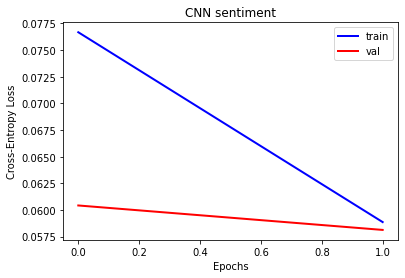

In [ ]:
plt.figure()
plt.plot(w2v_cnn_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_cnn_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
y_pred

array([[1.6688406e-03, 3.4972143e-07, 1.5243888e-04, 7.0575943e-06,
        4.5707822e-04, 2.3896309e-05],
       [8.2227707e-02, 5.1411986e-04, 1.6323864e-02, 1.9012988e-03,
        3.4541965e-02, 4.9255490e-03],
       [3.2226741e-01, 6.8584085e-04, 1.2852156e-01, 1.4237761e-03,
        1.2141925e-01, 1.1011988e-02],
       ...,
       [6.1061263e-01, 8.7751210e-02, 3.2720828e-01, 9.0625823e-02,
        3.7625727e-01, 1.6213959e-01],
       [8.6854523e-01, 1.1917287e-01, 6.6142565e-01, 4.3776691e-02,
        5.7811183e-01, 1.2731951e-01],
       [5.5745184e-02, 7.6615201e-05, 8.9036524e-03, 3.7574768e-04,
        2.0252734e-02, 1.8899739e-03]], dtype=float32)

In [ ]:
# final_df_w2v = pd.DataFrame(columns=['id'] + categories) #neat output dataframe format, in the format of being submitted to a kaggle competition
# final_df_w2v['id'] = tester['id'].values 
# final_df_w2v[categories] = y_test 
# final_df_w2v

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.940256,0.164639,0.826865,0.0342075,0.72256,0.123561
1,0000247867823ef7,0.00101388,7.45349e-08,4.02736e-05,2.9364e-07,9.92738e-05,4.5184e-06
2,00013b17ad220c46,0.0155699,4.0356e-05,0.00217164,0.000122584,0.00280532,0.000631332
3,00017563c3f7919a,0.00072363,2.50179e-08,3.09378e-05,1.55652e-07,3.67951e-05,2.81129e-06
4,00017695ad8997eb,0.0194534,9.27173e-05,0.00359747,0.000197113,0.00418946,0.0010505
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.830027,0.0291646,0.473749,0.00917554,0.436847,0.0363607
153160,fffd7a9a6eb32c16,0.126426,0.00162479,0.0324416,0.00293753,0.0333569,0.00740561
153161,fffda9e8d6fafa9e,0.0115283,1.49333e-05,0.00130674,4.02743e-05,0.00127885,0.000252843
153162,fffe8f1340a79fc2,0.00493932,1.26918e-06,0.000396162,6.23783e-06,0.000396162,4.87735e-05


In [ ]:
#with optimal hyperparameters (batch size, epochs) - 12m 38s
w2v_cnn_hist = w2v_cnn.fit(train_data, y_train, epochs=2, callbacks=callbacks_list, validation_split=0.1, shuffle=True, batch_size=20)

Epoch 1/2
7181/7181 [==============================] - 368s 51ms/step - loss: 0.0717 - acc: 0.9565 - val_loss: 0.0675 - val_acc: 0.9940
Epoch 2/2
7181/7181 [==============================] - 390s 54ms/step - loss: 0.0584 - acc: 0.9932 - val_loss: 0.0564 - val_acc: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
w2v_test_loss_cnn, w2v_test_auc_cnn = w2v_cnn.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:     ', w2v_test_loss_cnn)
print('Test Accuracy:', w2v_test_auc_cnn)

3199/3199 [==============================] - 56s 17ms/step - loss: 0.0764 - acc: 0.9975
Test Loss:      0.0763501524925232
Test Accuracy: 0.9974522590637207


In [ ]:
y_pred = w2v_cnn.predict(test_data)
print_score(np.round(y_pred), y_test) #hamming loss is slightly worse because of small grid given to optimise in grid search. We would need more computation power for a bigger grid

Jaccard score: 0.4350663892651579
Hamming loss: 2.9314764450279784
F1 score: 0.6478095622494161
---


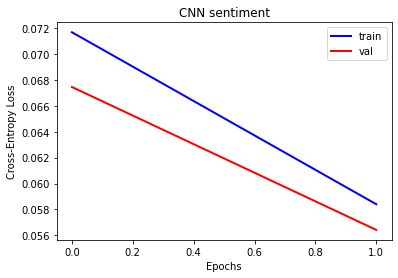

In [ ]:
plt.figure()
plt.plot(w2v_cnn_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_cnn_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

2. RNN with LSTM

In [ ]:
w2v_rnn_lstm = Sequential() #groups a linear stack of layers
w2v_rnn_lstm.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_rnn_lstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2v_rnn_lstm.add(LSTM(25, return_sequences=True)) #add LSTM layer
w2v_rnn_lstm.add(BatchNormalization()) #add normalization layer
w2v_rnn_lstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
w2v_rnn_lstm.add(Dropout(0.5))
w2v_rnn_lstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2v_rnn_lstm.add(Dense(6, activation='sigmoid'))

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
w2v_rnn_lstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2v_rnn_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 200, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200, 25)           32600     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 25)           100       
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 25)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)               

In [ ]:
#Model training - 13m 37s
w2v_rnn_lstm_hist = w2v_rnn_lstm.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 410s 91ms/step - loss: 0.0992 - accuracy: 0.9267 - val_loss: 0.0719 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 408s 91ms/step - loss: 0.0781 - accuracy: 0.9917 - val_loss: 0.0706 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_rnn_lstm, w2v_test_auc_rnn_lstm = w2v_rnn_lstm.evaluate(test_data, y_test, batch_size=32) #evaluate method to obtain test loss and test accuracy
print('Test Loss:    ', w2v_test_loss_rnn_lstm)
print('Test Accuracy:', w2v_test_auc_rnn_lstm)

2000/2000 [==============================] - 51s 25ms/step - loss: 0.0936 - accuracy: 0.9976
Test Loss:     0.09361625462770462
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_lstm.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.37318608756821525
Hamming loss: 3.425656736169725
F1 score: 0.5877964079898158
---


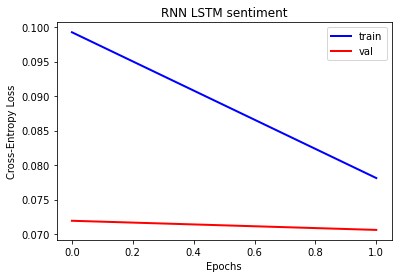

In [ ]:
plt.figure()
plt.plot(w2v_rnn_lstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_lstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters(batch size and epochs) - 36m 25s
w2v_rnn_lstm_hist = w2v_rnn_lstm.fit(train_data, y_train, batch_size=20, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 711s 99ms/step - loss: 0.1014 - accuracy: 0.9369 - val_loss: 0.0779 - val_accuracy: 0.9940
Epoch 2/3
7181/7181 [==============================] - 717s 100ms/step - loss: 0.0849 - accuracy: 0.9869 - val_loss: 0.0830 - val_accuracy: 0.9940
Epoch 3/3
7181/7181 [==============================] - 728s 101ms/step - loss: 0.0816 - accuracy: 0.9923 - val_loss: 0.0776 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
w2v_test_loss_rnn_lstm, w2v_test_auc_rnn_lstm = w2v_rnn_lstm.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:    ', w2v_test_loss_rnn_lstm)
print('Test Accuracy:', w2v_test_auc_rnn_lstm)

3199/3199 [==============================] - 84s 26ms/step - loss: 0.0991 - accuracy: 0.9976
Test Loss:     0.09910941123962402
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_lstm.predict(test_data) #jaccard and f1 scores did worse, maybe due to small scope to optimize in the small grid used for gridsearch in tuning. Can be improved with better computation power
print_score(np.round(y_pred), y_test)

Jaccard score: 0.3637061820874446
Hamming loss: 3.3636562568382886
F1 score: 0.5689182558911114
---


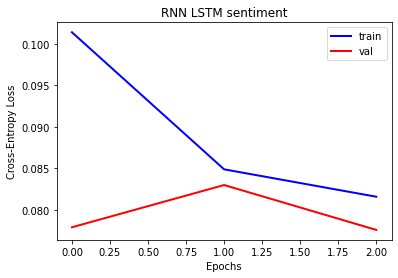

In [ ]:
plt.figure()
plt.plot(w2v_rnn_lstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_lstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

3. RNN with Bi-LSTM

In [ ]:
w2v_rnn_bilstm = Sequential() #groups a linear stack of layers
w2v_rnn_bilstm.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_rnn_bilstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2v_rnn_bilstm.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer and pass in an LSTM()
w2v_rnn_bilstm.add(BatchNormalization()) #add normalization layer
w2v_rnn_bilstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
w2v_rnn_bilstm.add(Dropout(0.5))
w2v_rnn_bilstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2v_rnn_bilstm.add(Dense(6, activation='sigmoid'))

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
w2v_rnn_bilstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2v_rnn_bilstm.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 200, 300)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 50)           65200     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 50)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)              

In [ ]:
#model training - 18 m
w2v_rnn_bilstm_hist = w2v_rnn_bilstm.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)


Epoch 1/2
4488/4488 [==============================] - 540s 119ms/step - loss: 0.0926 - accuracy: 0.9242 - val_loss: 0.0631 - val_accuracy: 0.9939
Epoch 2/2
4488/4488 [==============================] - 541s 121ms/step - loss: 0.0661 - accuracy: 0.9901 - val_loss: 0.0612 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_rnn_bilstm, w2v_test_auc_rnn_bilstm = w2v_rnn_bilstm.evaluate(test_data, y_test, batch_size=32) #use evaluate function to get test loss and test accuracy
print('Test Loss:    ', w2v_test_loss_rnn_bilstm)
print('Test Accuracy:', w2v_test_auc_rnn_bilstm)

2000/2000 [==============================] - 73s 37ms/step - loss: 0.0695 - accuracy: 0.9976
Test Loss:     0.06946884095668793
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_bilstm.predict(test_data)

In [ ]:
y_pred

array([[2.24474072e-03, 9.43840419e-08, 1.23234335e-04, 6.76412128e-06,
        2.20835209e-04, 2.30049432e-06],
       [8.84934068e-02, 4.81605530e-04, 1.54365599e-02, 2.87729502e-03,
        2.83983946e-02, 2.18582153e-03],
       [1.48911953e-01, 2.44826078e-04, 3.77685428e-02, 6.85453415e-04,
        4.67800498e-02, 1.89769268e-03],
       ...,
       [3.44828933e-01, 1.03779733e-02, 1.11023933e-01, 1.71528757e-02,
        1.81265026e-01, 2.83335745e-02],
       [8.70645463e-01, 1.09991848e-01, 5.95862746e-01, 4.19446528e-02,
        5.96793354e-01, 1.09685332e-01],
       [5.45413196e-02, 1.02297345e-04, 8.44627619e-03, 1.05381012e-03,
        1.72720850e-02, 6.91175461e-04]], dtype=float32)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.41397502111623974
Hamming loss: 2.655339856408974
F1 score: 0.6200121241821097
---


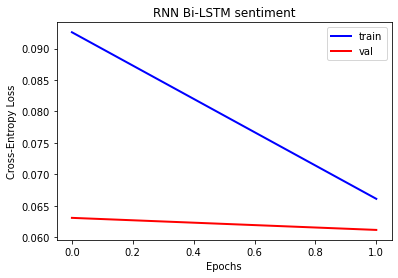

In [ ]:
plt.figure()
plt.plot(w2v_rnn_bilstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_bilstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 44m 28s
w2v_rnn_bilstm_hist = w2v_rnn_bilstm.fit(train_data, y_train, batch_size=20, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 881s 122ms/step - loss: 0.0841 - accuracy: 0.9461 - val_loss: 0.0661 - val_accuracy: 0.9932
Epoch 2/3
7181/7181 [==============================] - 876s 122ms/step - loss: 0.0666 - accuracy: 0.9936 - val_loss: 0.0611 - val_accuracy: 0.9940
Epoch 3/3
7181/7181 [==============================] - 912s 127ms/step - loss: 0.0618 - accuracy: 0.9930 - val_loss: 0.0574 - val_accuracy: 0.9939


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
w2v_test_loss_rnn_bilstm, w2v_test_auc_rnn_bilstm = w2v_rnn_bilstm.evaluate(test_data, y_test, batch_size=20) #evaluate method to get test loss and test accuracy of the model
print('Test Loss:    ', w2v_test_loss_rnn_bilstm)
print('Test Accuracy:', w2v_test_auc_rnn_bilstm)

3199/3199 [==============================] - 112s 35ms/step - loss: 0.0726 - accuracy: 0.9975
Test Loss:     0.07257094979286194
Test Accuracy: 0.9975304007530212


In [ ]:
y_pred = w2v_rnn_bilstm.predict(test_data)
print_score(np.round(y_pred), y_test) #only hamming did worse, probably due to the small grid to optimize in grid search. can be improved with more computation power

Jaccard score: 0.4456754949642499
Hamming loss: 2.7733491721112467
F1 score: 0.6517242363669832
---


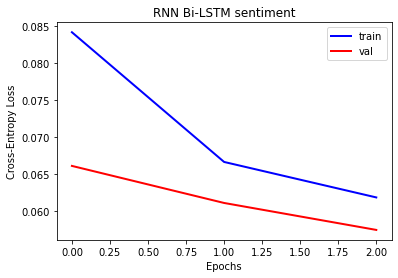

In [ ]:
plt.figure()
plt.plot(w2v_rnn_bilstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_bilstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

4. RNN with GRU

In [ ]:
w2v_rnn_gru = Sequential() #groups a linear stack of layers
w2v_rnn_gru.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_rnn_gru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2v_rnn_gru.add(GRU(25, return_sequences=True)) #add GRU layer
w2v_rnn_gru.add(BatchNormalization()) #add normalization layer
w2v_rnn_gru.add(GlobalMaxPool1D()) #add pooling layer - see comment below
w2v_rnn_gru.add(Dropout(0.5))
w2v_rnn_gru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2v_rnn_gru.add(Dense(6, activation='sigmoid'))

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
w2v_rnn_gru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2v_rnn_gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 300)          0         
_________________________________________________________________
gru (GRU)                    (None, 200, 25)           24525     
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 25)           100       
_________________________________________________________________
global_max_pooling1d (Global (None, 25)                0         
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                1

In [ ]:
#model training - 14m 42s
w2v_rnn_gru_hist = w2v_rnn_gru.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 441s 98ms/step - loss: 0.1042 - accuracy: 0.9165 - val_loss: 0.0706 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 441s 98ms/step - loss: 0.0755 - accuracy: 0.9921 - val_loss: 0.0677 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_rnn_gru, w2v_test_auc_rnn_gru = w2v_rnn_gru.evaluate(test_data, y_test, batch_size=32) #evaluate method to get test loss and test accuracy
print('Test Loss:    ', w2v_test_loss_rnn_gru)
print('Test Accuracy:', w2v_test_auc_rnn_gru)

2000/2000 [==============================] - 47s 23ms/step - loss: 0.0852 - accuracy: 0.9976
Test Loss:     0.08522770553827286
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_gru.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.3865685305514948
Hamming loss: 3.1242510446299248
F1 score: 0.6003124323691607
---


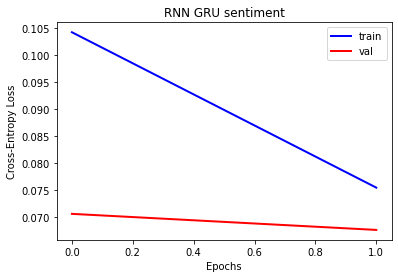

In [ ]:
plt.figure()
plt.plot(w2v_rnn_gru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_gru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and batch accuracy) - 22m 43s
w2v_rnn_gru_hist = w2v_rnn_gru.fit(train_data, y_train, batch_size=20, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
7181/7181 [==============================] - 683s 95ms/step - loss: 0.0912 - accuracy: 0.9499 - val_loss: 0.0691 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 680s 95ms/step - loss: 0.0740 - accuracy: 0.9941 - val_loss: 0.0656 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
w2v_test_loss_rnn_gru, w2v_test_auc_rnn_gru = w2v_rnn_gru.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:    ', w2v_test_loss_rnn_gru)
print('Test Accuracy:', w2v_test_auc_rnn_gru)

3199/3199 [==============================] - 70s 22ms/step - loss: 0.0790 - accuracy: 0.9976
Test Loss:     0.07902779430150986
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_gru.predict(test_data)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.39676575441435313
Hamming loss: 2.846030406285494
F1 score: 0.6012307928598126
---


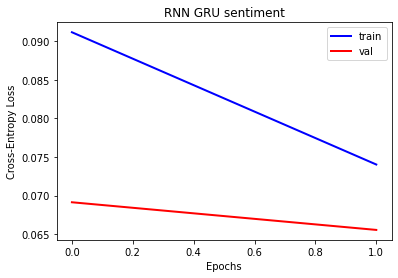

In [ ]:
plt.figure()
plt.plot(w2v_rnn_gru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_gru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

5. RNN with Bi-GRU

In [ ]:
w2v_rnn_bigru = Sequential() #groups a linear stack of layers
w2v_rnn_bigru.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2v_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and pass in a GRU layer
w2v_rnn_bigru.add(BatchNormalization()) #add normalization layer
w2v_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer - see comment below
w2v_rnn_bigru.add(Dropout(0.5))
w2v_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2v_rnn_bigru.add(Dense(6, activation='sigmoid'))

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
w2v_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2v_rnn_bigru.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, 200, 300)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200, 50)           49050     
_________________________________________________________________
batch_normalization_11 (Batc (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 50)                0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 50)              

In [ ]:
#model training - 19m 15s (same params as optimal hyperparameters - batch size and epochs)
w2v_rnn_bigru_hist = w2v_rnn_bigru.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 579s 128ms/step - loss: 0.0903 - accuracy: 0.9107 - val_loss: 0.0624 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 577s 129ms/step - loss: 0.0645 - accuracy: 0.9884 - val_loss: 0.0571 - val_accuracy: 0.9939


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_rnn_bigru, w2v_test_auc_rnn_bigru = w2v_rnn_bigru.evaluate(test_data, y_test, batch_size=32) #using evaluate method to get test loss and test accuracy
print('Test Loss:    ', w2v_test_loss_rnn_bigru)
print('Test Accuracy:', w2v_test_auc_rnn_bigru)

2000/2000 [==============================] - 72s 36ms/step - loss: 0.0737 - accuracy: 0.9971
Test Loss:     0.07367335259914398
Test Accuracy: 0.9970771074295044


In [ ]:
y_pred = w2v_rnn_bigru.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4384420431254754
Hamming loss: 2.8699969781278982
F1 score: 0.6426192700661301
---


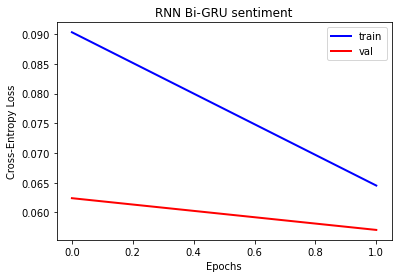

In [ ]:
plt.figure()
plt.plot(w2v_rnn_bigru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_bigru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

# FastText

In [ ]:
#common imports and code -------- run before any of the FastText Models below
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#defines callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

In [ ]:
y_train = ft_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test): #function to print metrics in an organized manner
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---")

#end of common ------

1. CNN

In [ ]:
ft_cnn = Sequential() #groups a linear stack of layers - after this, do .add and add layers
ft_cnn.add(Embedding(nb_words, embed_dim, #trainable = false to not retrain embedding layer
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #can only be used as first layer, turns positive ints into dense vectors of a fixed size. (4,20 into [[0.25, 0.1], [0.6,-0.2]])
ft_cnn.add(Conv1D(num_filters, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields 
ft_cnn.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so in order to reduce space
ft_cnn.add(Conv1D(num_filters, 7, activation='relu', padding='same')) #another convolutional layer
ft_cnn.add(GlobalMaxPooling1D()) #same operation as max pooling 1D, except pool size is entire input block (single max value for each of the input channels)
ft_cnn.add(Dropout(0.5)) #dropout layer - randomly sets input units to 0 with freq of 0.5 per step during training
ft_cnn.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) #densely connected NN, implements an output operation with activation function, input, kernel and bias
ft_cnn.add(Dense(6, activation='sigmoid'))  #multi-label (k-hot encoding) - for the 6 classes in output

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

ft_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #compiling model
#loss= binary crossentropy - cross entropy loss for binary classification
#Optimizer adam - implements the adam algorithm. It is a stochastic (random prob dist) gradient descent method
ft_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 89, 300)           30000000  
_________________________________________________________________
conv1d (Conv1D)              (None, 89, 64)            134464    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 44, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 44, 64)            28736     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [ ]:
#model training - 5m 28s (uses default hyperparameters)
ft_cnn_hist = ft_cnn.fit(word_seq_train, y_train, batch_size=32, epochs=2, callbacks=callbacks_list, validation_split=0.1, shuffle=True)

Epoch 1/2
4488/4488 [==============================] - 166s 37ms/step - loss: 0.0781 - accuracy: 0.9662 - val_loss: 0.0668 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 162s 36ms/step - loss: 0.0634 - accuracy: 0.9911 - val_loss: 0.0643 - val_accuracy: 0.9940


In [ ]:
y_test  = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_cnn, ft_test_auc_cnn = ft_cnn.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_cnn)
print('Test Accuracy:', ft_test_auc_cnn) #using evalute to obtain test loss and accuracy

2000/2000 [==============================] - 26s 13ms/step - loss: 0.0837 - accuracy: 0.9975
Test Loss:     0.08371416479349136
Test Accuracy: 0.9975304007530212


In [ ]:
y_pred = ft_cnn.predict(word_seq_test)
y_pred

array([[3.4856498e-03, 1.0335829e-06, 4.6569109e-04, 5.7110879e-06,
        7.9447031e-04, 2.3024621e-05],
       [9.7429007e-02, 1.2392700e-03, 2.5415272e-02, 3.0428767e-03,
        3.4812242e-02, 5.1314533e-03],
       [3.8966507e-02, 4.8369613e-05, 7.7210367e-03, 1.8727779e-04,
        1.2872994e-02, 8.1908703e-04],
       ...,
       [5.0751203e-01, 2.6426733e-02, 2.2877878e-01, 3.3030808e-02,
        2.8227121e-01, 7.0895493e-02],
       [7.6910007e-01, 5.9303135e-02, 5.5780077e-01, 3.5454422e-02,
        5.1189131e-01, 9.7730607e-02],
       [6.8907142e-02, 1.4540553e-04, 1.2493491e-02, 5.1811337e-04,
        1.9093841e-02, 1.5144646e-03]], dtype=float32)

In [ ]:
print_score(np.round(y_pred), y_test) #printing metrics

Jaccard score: 0.4178383364127952
Hamming loss: 3.0966373857680245
F1 score: 0.6232373844434643
---


In [ ]:
#categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'] #to print as a neat dataframe, or a submission to a kaggle competition

In [ ]:
# submission_df = pd.DataFrame(columns=['id'] + categories)
# submission_df['id'] = tester['id'].values 
# submission_df[categories] = y_test 
# submission_df

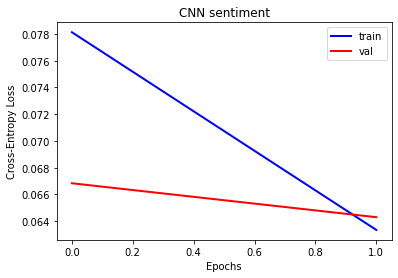

In [ ]:
#generate plots
plt.figure()
plt.plot(ft_cnn_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue
plt.plot(ft_cnn_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimised hyperparameters (batch size and epochs) - 6m 10s
ft_cnn_hist = ft_cnn.fit(word_seq_train, y_train, batch_size=20, epochs=2, callbacks=callbacks_list, validation_split=0.1, shuffle=True)

Epoch 1/2
7181/7181 [==============================] - 188s 26ms/step - loss: 0.0769 - accuracy: 0.9700 - val_loss: 0.0666 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 182s 25ms/step - loss: 0.0632 - accuracy: 0.9923 - val_loss: 0.0644 - val_accuracy: 0.9935


In [ ]:
y_test  = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

ft_test_loss_cnn, ft_test_auc_cnn = ft_cnn.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_cnn)
print('Test Accuracy:', ft_test_auc_cnn)

2000/2000 [==============================] - 27s 13ms/step - loss: 0.0927 - accuracy: 0.9959
Test Loss:     0.09269412606954575
Test Accuracy: 0.9958735704421997


In [ ]:
y_pred = ft_cnn.predict(word_seq_test)
print_score(np.round(y_pred), y_test) #did slightly worse - could be because of the small grid used. using a bigger grid could help, which we would need more computation power for.

Jaccard score: 0.40611502920893255
Hamming loss: 3.4373795158752487
F1 score: 0.6081609982369615
---


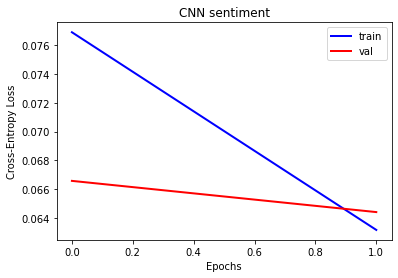

In [ ]:
#generate plots
plt.figure()
plt.plot(ft_cnn_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue
plt.plot(ft_cnn_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

2. RNN (with LSTM Cells)

In [ ]:
ft_rnn_lstm = Sequential() #groups a linear stack of layers
ft_rnn_lstm.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #add embedding layer 
ft_rnn_lstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
ft_rnn_lstm.add(LSTM(25, return_sequences=True)) #add an LSTM layer with 25 units
ft_rnn_lstm.add(BatchNormalization()) #add normalization layer
ft_rnn_lstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
ft_rnn_lstm.add(Dropout(0.5)) #drops 50% of nodes randomly
ft_rnn_lstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
ft_rnn_lstm.add(Dense(6, activation='sigmoid')) #multi-label (k-hot encoding) - for the 6 classes in output

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
ft_rnn_lstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

ft_rnn_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 89, 300)           30000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 89, 300)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 89, 25)            32600     
_________________________________________________________________
batch_normalization (BatchNo (None, 89, 25)            100       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [ ]:
#model training - 6m 9s
ft_rnn_lstm_hist = ft_rnn_lstm.fit(word_seq_train, y_train, batch_size=32, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 184s 41ms/step - loss: 0.0996 - accuracy: 0.9227 - val_loss: 0.0732 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 185s 41ms/step - loss: 0.0821 - accuracy: 0.9884 - val_loss: 0.0709 - val_accuracy: 0.9909


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_rnn_lstm, ft_test_auc_rnn_lstm = ft_rnn_lstm.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_rnn_lstm)
print('Test Accuracy:', ft_test_auc_rnn_lstm)

2000/2000 [==============================] - 24s 12ms/step - loss: 0.0862 - accuracy: 0.9930
Test Loss:     0.08617384731769562
Test Accuracy: 0.9930444955825806


In [ ]:
y_pred = ft_rnn_lstm.predict(word_seq_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.3896250352840091
Hamming loss: 2.9468463117529984
F1 score: 0.5957422546406211
---


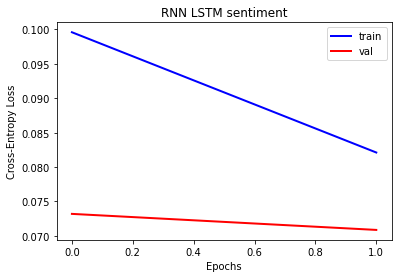

In [ ]:
plt.figure()
plt.plot(ft_rnn_lstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue
plt.plot(ft_rnn_lstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 9m 43s
ft_rnn_lstm_hist = ft_rnn_lstm.fit(word_seq_train, y_train, batch_size=20, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
7181/7181 [==============================] - 293s 41ms/step - loss: 0.1068 - accuracy: 0.9318 - val_loss: 0.0822 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 290s 40ms/step - loss: 0.0884 - accuracy: 0.9911 - val_loss: 0.0784 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
ft_test_loss_rnn_lstm, ft_test_auc_rnn_lstm = ft_rnn_lstm.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_rnn_lstm)
print('Test Accuracy:', ft_test_auc_rnn_lstm)

2000/2000 [==============================] - 26s 13ms/step - loss: 0.0961 - accuracy: 0.9976
Test Loss:     0.09614671766757965
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = ft_rnn_lstm.predict(word_seq_test)

In [ ]:
print_score(np.round(y_pred), y_test) #does minutely worse. due to smaller grid available to tune

Jaccard score: 0.3787298327869258
Hamming loss: 3.012493878103932
F1 score: 0.5847237264182187
---


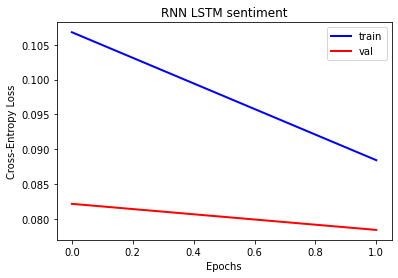

In [ ]:
plt.figure()
plt.plot(ft_rnn_lstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue
plt.plot(ft_rnn_lstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

3. RNN (with Bi-LSTM cells)

In [ ]:
ft_rnn_bilstm = Sequential() #groups a linear stack of layers
ft_rnn_bilstm.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #add embedding layer 
ft_rnn_bilstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
ft_rnn_bilstm.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer wrapper with an LSTM layer as an argument
ft_rnn_bilstm.add(BatchNormalization()) #add normalization layer
ft_rnn_bilstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
ft_rnn_bilstm.add(Dropout(0.5))#drops 50% of nodes randomly
ft_rnn_bilstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
ft_rnn_bilstm.add(Dense(6, activation='sigmoid')) #multi-label (k-hot encoding) - for the 6 classes in output

In [ ]:
ft_rnn_bilstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

ft_rnn_bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 89, 300)           30000000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 89, 300)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 89, 50)            65200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 89, 50)            200       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)               

In [ ]:
#model training - 8m 24s
ft_rnn_bilstm_hist = ft_rnn_bilstm.fit(word_seq_train, y_train, batch_size=32, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 254s 56ms/step - loss: 0.0907 - accuracy: 0.9273 - val_loss: 0.0666 - val_accuracy: 0.9934
Epoch 2/2
4488/4488 [==============================] - 251s 56ms/step - loss: 0.0718 - accuracy: 0.9888 - val_loss: 0.0653 - val_accuracy: 0.9931


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_rnn_bilstm, ft_test_auc_rnn_bilstm = ft_rnn_bilstm.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_rnn_bilstm)
print('Test Accuracy:', ft_test_auc_rnn_bilstm)

2000/2000 [==============================] - 34s 17ms/step - loss: 0.0862 - accuracy: 0.9942
Test Loss:     0.08624766767024994
Test Accuracy: 0.9942480325698853


In [ ]:
y_pred = ft_rnn_bilstm.predict(word_seq_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.42212276165939333
Hamming loss: 2.9768045265560037
F1 score: 0.6286008597998928
---


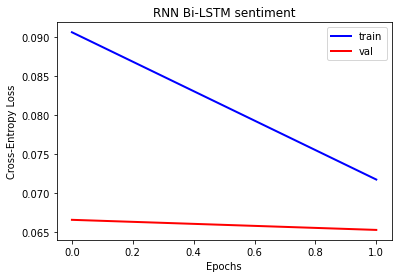

In [ ]:
plt.figure()
plt.plot(ft_rnn_bilstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data
plt.plot(ft_rnn_bilstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data
plt.title('RNN Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 12m 18s
ft_rnn_bilstm_hist = ft_rnn_bilstm.fit(word_seq_train, y_train, batch_size=20, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
7181/7181 [==============================] - 375s 52ms/step - loss: 0.0845 - accuracy: 0.9402 - val_loss: 0.0705 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 364s 51ms/step - loss: 0.0698 - accuracy: 0.9874 - val_loss: 0.0641 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
ft_test_loss_rnn_bilstm, ft_test_auc_rnn_bilstm = ft_rnn_bilstm.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_rnn_bilstm)
print('Test Accuracy:', ft_test_auc_rnn_bilstm)

2000/2000 [==============================] - 37s 18ms/step - loss: 0.0846 - accuracy: 0.9976
Test Loss:     0.08459044247865677
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = ft_rnn_bilstm.predict(word_seq_test) #worse hamming loss, could be due to small grid in gridsearch
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4278672274577669
Hamming loss: 3.0575614534162785
F1 score: 0.6347014077777794
---


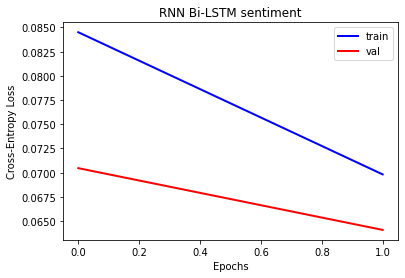

In [ ]:
plt.figure()
plt.plot(ft_rnn_bilstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue
plt.plot(ft_rnn_bilstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red
plt.title('RNN Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

4. RNN (with GRU cells)

In [ ]:
ft_rnn_gru = Sequential() #groups a linear stack of layers
ft_rnn_gru.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #add embedding layer 
ft_rnn_gru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
ft_rnn_gru.add(GRU(25, return_sequences=True)) #add a GRU layer
ft_rnn_gru.add(BatchNormalization()) #add normalization layer
ft_rnn_gru.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
ft_rnn_gru.add(Dropout(0.5)) #Drops 50% of nodes randomly
ft_rnn_gru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
ft_rnn_gru.add(Dense(6, activation='sigmoid')) #multi-label (k-hot encoding) - for the 6 classes in output

In [ ]:
ft_rnn_gru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

ft_rnn_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 89, 300)           30000000  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 89, 300)           0         
_________________________________________________________________
gru (GRU)                    (None, 89, 25)            24525     
_________________________________________________________________
batch_normalization_2 (Batch (None, 89, 25)            100       
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 25)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

In [ ]:
#model training - 6m 34s
ft_rnn_gru_hist = ft_rnn_gru.fit(word_seq_train, y_train, batch_size=32, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 198s 44ms/step - loss: 0.1158 - accuracy: 0.9099 - val_loss: 0.1041 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 196s 44ms/step - loss: 0.1016 - accuracy: 0.9830 - val_loss: 0.0998 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_rnn_gru, ft_test_auc_rnn_gru = ft_rnn_gru.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_rnn_gru)
print('Test Accuracy:', ft_test_auc_rnn_gru)

2000/2000 [==============================] - 23s 11ms/step - loss: 0.1135 - accuracy: 0.9976
Test Loss:     0.11348224431276321
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = ft_rnn_gru.predict(word_seq_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.19573129835777398
Hamming loss: 4.1423093355007445
F1 score: 0.34997133704910605
---


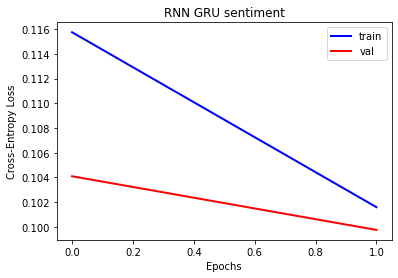

In [ ]:
plt.figure()
plt.plot(ft_rnn_gru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data
plt.plot(ft_rnn_gru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 17m 24s
ft_rnn_gru_hist = ft_rnn_gru.fit(word_seq_train, y_train, batch_size=20, epochs=3, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 341s 47ms/step - loss: 0.1003 - accuracy: 0.9398 - val_loss: 0.0730 - val_accuracy: 0.9933
Epoch 2/3
7181/7181 [==============================] - 332s 46ms/step - loss: 0.0824 - accuracy: 0.9926 - val_loss: 0.0706 - val_accuracy: 0.9940
Epoch 3/3
7181/7181 [==============================] - 335s 47ms/step - loss: 0.0804 - accuracy: 0.9938 - val_loss: 0.0729 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
ft_test_loss_rnn_gru, ft_test_auc_rnn_gru = ft_rnn_gru.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_rnn_gru)
print('Test Accuracy:', ft_test_auc_rnn_gru)

2000/2000 [==============================] - 27s 13ms/step - loss: 0.0913 - accuracy: 0.9976
Test Loss:     0.09130740165710449
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = ft_rnn_gru.predict(word_seq_test)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.3920032947045146
Hamming loss: 2.9929559119280587
F1 score: 0.5966624103574671
---


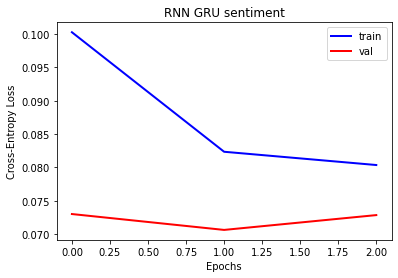

In [ ]:
plt.figure()
plt.plot(ft_rnn_gru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue
plt.plot(ft_rnn_gru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

5. RNN with Bi-GRU

In [ ]:
ft_rnn_bigru = Sequential() #instantiate linear stack of layers
ft_rnn_bigru.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #add embedding layer 
ft_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
ft_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add a bidirectional layer wrapper and a GRU layer
ft_rnn_bigru.add(BatchNormalization()) #add normalization layer
ft_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
ft_rnn_bigru.add(Dropout(0.5)) #drops 50% of nodes randomly
ft_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
ft_rnn_bigru.add(Dense(6, activation='sigmoid')) #multi-label (k-hot encoding) - for the 6 classes in output

In [ ]:
ft_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

ft_rnn_bigru.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 89, 300)           30000000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 89, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 89, 50)            49050     
_________________________________________________________________
batch_normalization_3 (Batch (None, 89, 50)            200       
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 50)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)               

In [ ]:
#model training - 8m 54s
ft_rnn_bigru_hist = ft_rnn_bigru.fit(word_seq_train, y_train, batch_size=32, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 269s 59ms/step - loss: 0.0937 - accuracy: 0.9172 - val_loss: 0.0682 - val_accuracy: 0.9938
Epoch 2/2
4488/4488 [==============================] - 266s 59ms/step - loss: 0.0727 - accuracy: 0.9908 - val_loss: 0.0660 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_rnn_bigru, ft_test_auc_rnn_bigru = ft_rnn_bigru.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_rnn_bigru)
print('Test Accuracy:', ft_test_auc_rnn_bigru)

2000/2000 [==============================] - 33s 17ms/step - loss: 0.0832 - accuracy: 0.9976
Test Loss:     0.08319879323244095
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = ft_rnn_bigru.predict(word_seq_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4220379290559321
Hamming loss: 2.9533589671449563
F1 score: 0.6298541458508968
---


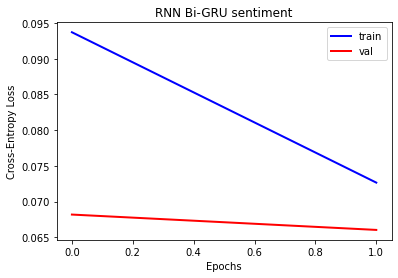

In [ ]:
plt.figure()
plt.plot(ft_rnn_bigru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue
plt.plot(ft_rnn_bigru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red
plt.title('RNN Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 20m 49s
ft_rnn_bigru_hist = ft_rnn_bigru.fit(word_seq_train, y_train, batch_size=20, epochs=3, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 408s 57ms/step - loss: 0.0703 - accuracy: 0.9924 - val_loss: 0.0628 - val_accuracy: 0.9939
Epoch 3/3
7181/7181 [==============================] - 419s 58ms/step - loss: 0.0665 - accuracy: 0.9930 - val_loss: 0.0629 - val_accuracy: 0.9939


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
ft_test_loss_rnn_bigru, ft_test_auc_rnn_bigru = ft_rnn_bigru.evaluate(word_seq_test, y_test, batch_size=32)
print('Test Loss:    ', ft_test_loss_rnn_bigru)
print('Test Accuracy:', ft_test_auc_rnn_bigru)

2000/2000 [==============================] - 38s 19ms/step - loss: 0.0845 - accuracy: 0.9972
Test Loss:     0.08446387201547623
Test Accuracy: 0.9972490668296814


In [ ]:
y_pred = ft_rnn_bigru.predict(word_seq_test)
print_score(np.round(y_pred), y_test) #worse hamming loss, maybe due to the small grid in gridsearch

Jaccard score: 0.42956806531041264
Hamming loss: 3.0302083007700564
F1 score: 0.6381759102479865
---


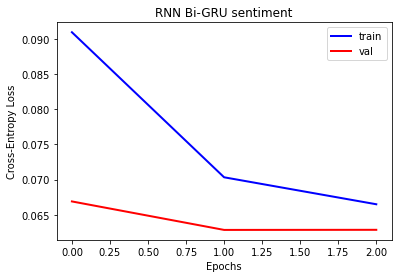

In [ ]:
plt.figure()
plt.plot(ft_rnn_bigru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data
plt.plot(ft_rnn_bigru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data
plt.title('RNN Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

# GloVe

In [ ]:
#common -------- run before any of the GloVe Models below
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#defines callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test): #function to print metrics in an organized manner
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---")   

In [ ]:
max_features=20000  #number of unique words we want to use (or: number of rows in incoming embedding vector)
max_len=200 #max number of words in a comment to use (or: number of columns in incoming embedding vector)
embedding_dims=128#dimension of the embedding variable (or: number of rows in output of embedding vector)
embed_dim=300 #length of each embedding

#end of common -------

1. CNN

In [ ]:
#A pretrained embedding requires the arguments weights=embedding_matrix as well as trainable=False to freeze the weights.

glove_cnn = Sequential() #groups a linear stack of layers
glove_cnn.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
glove_cnn.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields (like a flashlight)
glove_cnn.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space
glove_cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))#add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
glove_cnn.add(GlobalMaxPool1D()) #add global pooling layer (see comment below)
glove_cnn.add(Dropout(0.5)) #add a dropout layer to randomly drop 50% of nodes to prevent overfitting
glove_cnn.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
glove_cnn.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel (for the 6 output classes)

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
glove_cnn.compile(loss='binary_crossentropy', #uses binary crossentropy loss
                    optimizer= 'adam',
                    metrics=['accuracy'])

glove_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 64)           134464    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 100, 64)           16448     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [ ]:
#model training - 11m 26s
glove_cnn_hist = glove_cnn.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 343s 76ms/step - loss: 0.0634 - accuracy: 0.9512 - val_loss: 0.0541 - val_accuracy: 0.9939
Epoch 2/2
4488/4488 [==============================] - 343s 76ms/step - loss: 0.0518 - accuracy: 0.9920 - val_loss: 0.0531 - val_accuracy: 0.9898


In [ ]:
glove_test_loss_cnn, glove_test_auc_cnn = glove_cnn.evaluate(X_test, y_test, batch_size=32) #using the evaluate function to obtained tess loss and accuracy (of the DL model)
print('Test Loss:    ', glove_test_loss_cnn)
print('Test Accuracy:', glove_test_auc_cnn)

2000/2000 [==============================] - 47s 24ms/step - loss: 0.0729 - accuracy: 0.9870
Test Loss:     0.07290945947170258
Test Accuracy: 0.98699551820755


In [ ]:
y_pred = glove_cnn.predict(X_test)

In [ ]:
y_pred

array([[6.54071569e-04, 5.17218135e-09, 4.78247384e-05, 1.30550507e-06,
        4.20657052e-05, 3.45982608e-06],
       [4.03217733e-01, 3.08266282e-03, 8.01886320e-02, 1.89278126e-02,
        1.50643229e-01, 2.64487863e-02],
       [8.57177377e-03, 4.07660337e-07, 9.45270061e-04, 3.29463837e-05,
        8.85367393e-04, 1.39743090e-04],
       ...,
       [6.41171217e-01, 4.11827266e-02, 2.25698948e-01, 6.19747043e-02,
        3.26471865e-01, 1.47338361e-01],
       [9.78826523e-01, 3.11028153e-01, 8.10858011e-01, 1.03376776e-01,
        6.84361815e-01, 1.70822591e-01],
       [9.86847281e-03, 4.67232712e-06, 9.39697027e-04, 2.03400850e-04,
        1.02701783e-03, 2.70426273e-04]], dtype=float32)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.45360355314999373
Hamming loss: 2.9210561964008463
F1 score: 0.6589752559035595
---


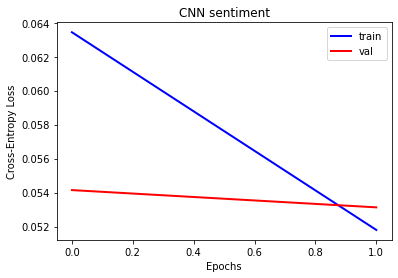

In [ ]:
plt.figure()
plt.plot(glove_cnn_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_cnn_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'] 

In [ ]:
# submission_df = pd.DataFrame(columns=['id'] + categories) #way to output a clean df, or as a submission to a kaggle competition
# submission_df['id'] = tester['id'].values 
# submission_df[categories] = y_pred
# submission_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,0.00660071,1.61829e-05,0.000572562,0.000156075,0.000619709,0.000152975
1,000247e83dcc1211,0.0911599,0.00242388,0.0109212,0.00777483,0.0211804,0.00984511
2,0002f87b16116a7f,0.261672,0.00363508,0.0924804,0.00529742,0.0974861,0.0158669
3,0003e1cccfd5a40a,0.0117222,2.77613e-05,0.000941932,0.00016582,0.00133187,0.000257939
4,00059ace3e3e9a53,0.0040037,6.63614e-06,0.000351191,5.45788e-05,0.000364304,7.49498e-05
...,...,...,...,...,...,...,...
63973,fff8f64043129fa2,0.00272882,2.45779e-06,0.00020653,2.39782e-05,0.000213981,2.73087e-05
63974,fff9d70fe0722906,0.584235,0.0280529,0.312391,0.0252034,0.314755,0.0501047
63975,fffa8a11c4378854,0.672089,0.0871133,0.28466,0.0809461,0.358196,0.191946
63976,fffac2a094c8e0e2,0.954223,0.275103,0.867723,0.0872167,0.679113,0.144508


In [ ]:
#tuned hyperparameters (batch size and epochs) - 17m 22s
glove_cnn_hist = glove_cnn.fit(X_train, y_train, batch_size=32, epochs=3, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/3
4488/4488 [==============================] - 355s 79ms/step - loss: 0.0644 - accuracy: 0.9658 - val_loss: 0.0543 - val_accuracy: 0.9940
Epoch 2/3
4488/4488 [==============================] - 348s 78ms/step - loss: 0.0519 - accuracy: 0.9919 - val_loss: 0.0522 - val_accuracy: 0.9933
Epoch 3/3
4488/4488 [==============================] - 337s 75ms/step - loss: 0.0485 - accuracy: 0.9919 - val_loss: 0.0527 - val_accuracy: 0.9938


In [ ]:
glove_test_loss_cnn, glove_test_auc_cnn = glove_cnn.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', glove_test_loss_cnn)
print('Test Accuracy:', glove_test_auc_cnn)

2000/2000 [==============================] - 52s 26ms/step - loss: 0.0774 - accuracy: 0.9972
Test Loss:     0.07744227349758148
Test Accuracy: 0.9972021579742432


In [ ]:
y_pred = glove_cnn.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test) #slightly worse because of limited grid in the grid search method (due to computational limitations)

Jaccard score: 0.4395297758525265
Hamming loss: 3.129200662727813
F1 score: 0.6503172716718488
---


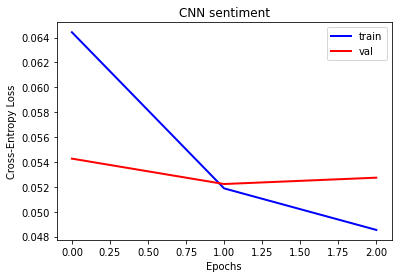

In [ ]:
plt.figure()
plt.plot(glove_cnn_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_cnn_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

2. RNN with LSTM

In [ ]:
glove_rnn_lstm = Sequential() #groups a linear stack of layers
glove_rnn_lstm.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
glove_rnn_lstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
glove_rnn_lstm.add(LSTM(25, return_sequences=True)) #add LSTM layer with 25 nodes
glove_rnn_lstm.add(BatchNormalization()) #add normalization layer
glove_rnn_lstm.add(GlobalMaxPool1D()) #add pooling layer - see comment below
glove_rnn_lstm.add(Dropout(0.5))
glove_rnn_lstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
glove_rnn_lstm.add(Dense(6, activation='sigmoid')) #for the 6 output classes

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
glove_rnn_lstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

glove_rnn_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 300)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 25)           32600     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 25)           100       
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 25)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)               

In [ ]:
#model training - 13m 43s
glove_rnn_lstm_hist = glove_rnn_lstm.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 419s 93ms/step - loss: 0.0911 - accuracy: 0.9258 - val_loss: 0.0644 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 405s 90ms/step - loss: 0.0722 - accuracy: 0.9919 - val_loss: 0.0603 - val_accuracy: 0.9940


In [ ]:
glove_test_loss_rnn_lstm, glove_test_auc_rnn_lstm = glove_rnn_lstm.evaluate(X_test, y_test, batch_size=32) #evaluate method for test loss and test accuracy
print('Test Loss:    ', glove_test_loss_rnn_lstm)
print('Test Accuracy:', glove_test_auc_rnn_lstm)

2000/2000 [==============================] - 53s 26ms/step - loss: 0.0782 - accuracy: 0.9976
Test Loss:     0.07824676483869553
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_lstm.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4383690285461319
Hamming loss: 2.797576250169329
F1 score: 0.6449703322648634
---


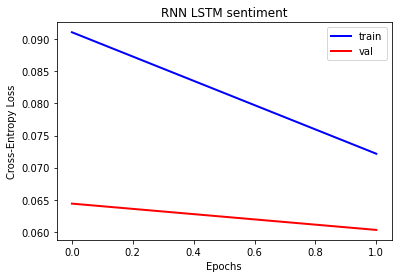

In [ ]:
plt.figure()
plt.plot(glove_rnn_lstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_lstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#tuned hyperparameters (batch size and epochs) - 23m 7s
glove_rnn_lstm_hist = glove_rnn_lstm.fit(X_train, y_train, batch_size=32, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
4488/4488 [==============================] - 454s 101ms/step - loss: 0.0935 - accuracy: 0.9175 - val_loss: 0.0650 - val_accuracy: 0.9940
Epoch 2/3
4488/4488 [==============================] - 447s 100ms/step - loss: 0.0718 - accuracy: 0.9905 - val_loss: 0.0591 - val_accuracy: 0.9939
Epoch 3/3
4488/4488 [==============================] - 485s 108ms/step - loss: 0.0690 - accuracy: 0.9929 - val_loss: 0.0600 - val_accuracy: 0.9940


In [ ]:
glove_test_loss_rnn_lstm, glove_test_auc_rnn_lstm = glove_rnn_lstm.evaluate(X_test, y_test, batch_size=32)
print('Test Loss:    ', glove_test_loss_rnn_lstm)
print('Test Accuracy:', glove_test_auc_rnn_lstm)

2000/2000 [==============================] - 57s 28ms/step - loss: 0.0757 - accuracy: 0.9976
Test Loss:     0.07570040971040726
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_lstm.predict(X_test)
print_score(np.round(y_pred), y_test) #worse jaccard score and f1 score because of limited grid options in grid search

Jaccard score: 0.40739460123368826
Hamming loss: 2.7879375201892316
F1 score: 0.6221619226087286
---


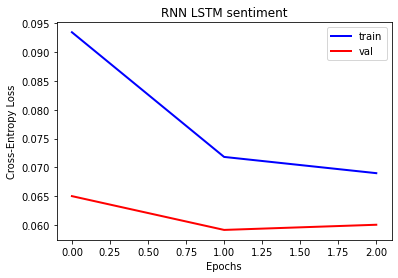

In [ ]:
plt.figure()
plt.plot(glove_rnn_lstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_lstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

3. RNN with Bi-LSTM

In [ ]:
glove_rnn_bilstm = Sequential() #groups a linear stack of layers
glove_rnn_bilstm.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
glove_rnn_bilstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
glove_rnn_bilstm.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer wrapper and pass in an LSTM layer
glove_rnn_bilstm.add(BatchNormalization()) #add normalization layer
glove_rnn_bilstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
glove_rnn_bilstm.add(Dropout(0.5))
glove_rnn_bilstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
glove_rnn_bilstm.add(Dense(6, activation='sigmoid'))

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
glove_rnn_bilstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

glove_rnn_bilstm.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 200, 300)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 50)           65200     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 50)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)               

In [ ]:
#model training - 17m 55s (this is also the optimal params, for epochs and batch size)
glove_rnn_bilstm_hist = glove_rnn_bilstm.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 537s 119ms/step - loss: 0.0783 - accuracy: 0.9219 - val_loss: 0.0562 - val_accuracy: 0.9939
Epoch 2/2
4488/4488 [==============================] - 538s 120ms/step - loss: 0.0589 - accuracy: 0.9895 - val_loss: 0.0530 - val_accuracy: 0.9935


In [ ]:
glove_test_loss_rnn_bilstm, glove_test_auc_rnn_bilstm = glove_rnn_bilstm.evaluate(X_test, y_test, batch_size=32) #using evaluate method to get test loss and accuracy
print('Test Loss:    ', glove_test_loss_rnn_bilstm)
print('Test Accuracy:', glove_test_auc_rnn_bilstm)

2000/2000 [==============================] - 75s 38ms/step - loss: 0.0759 - accuracy: 0.9942
Test Loss:     0.07594943791627884
Test Accuracy: 0.9942480325698853


In [ ]:
y_pred = glove_rnn_bilstm.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4550015749848926
Hamming loss: 3.0744943574353685
F1 score: 0.6586532816459093
---


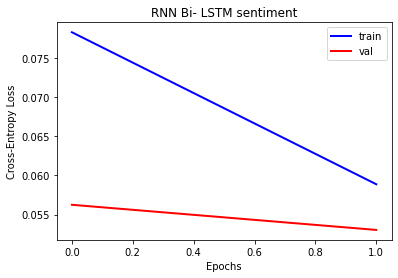

In [ ]:
plt.figure()
plt.plot(glove_rnn_bilstm_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_bilstm_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi- LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

4. RNN with GRU

In [ ]:
glove_rnn_gru = Sequential() #groups a linear stack of layers
glove_rnn_gru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
glove_rnn_gru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
glove_rnn_gru.add(GRU(25, return_sequences=True)) #add GRU later
glove_rnn_gru.add(BatchNormalization()) #add normalization layer
glove_rnn_gru.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
glove_rnn_gru.add(Dropout(0.5))
glove_rnn_gru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
glove_rnn_gru.add(Dense(6, activation='sigmoid'))

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
glove_rnn_gru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

glove_rnn_gru.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 200, 300)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 200, 25)           24525     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200, 25)           100       
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 25)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)               

In [ ]:
#model training - 14m 17s
glove_rnn_gru_hist = glove_rnn_gru.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 431s 96ms/step - loss: 0.0908 - accuracy: 0.9342 - val_loss: 0.0655 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 426s 95ms/step - loss: 0.0690 - accuracy: 0.9919 - val_loss: 0.0615 - val_accuracy: 0.9940


In [ ]:
glove_test_loss_rnn_gru, glove_test_auc_rnn_gru = glove_rnn_gru.evaluate(X_test, y_test, batch_size=32) #using the evaluate method to obtain test loss and accuracy
print('Test Loss:    ', glove_test_loss_rnn_gru)
print('Test Accuracy:', glove_test_auc_rnn_gru)

2000/2000 [==============================] - 44s 22ms/step - loss: 0.0766 - accuracy: 0.9976
Test Loss:     0.07661930471658707
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_gru.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.3970615692761188
Hamming loss: 2.8277949711880126
F1 score: 0.6128508109652733
---


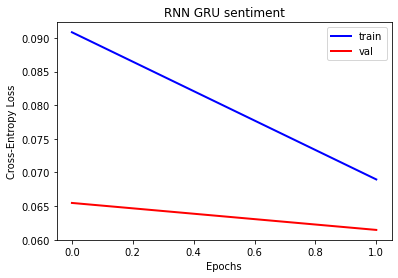

In [ ]:
plt.figure()
plt.plot(glove_rnn_gru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_gru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#tuned hyperparameters (batch size and epochs) - 37m 24s
glove_rnn_gru_hist = glove_rnn_gru.fit(X_train, y_train, batch_size=20, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 730s 101ms/step - loss: 0.0822 - accuracy: 0.9434 - val_loss: 0.0610 - val_accuracy: 0.9940
Epoch 2/3
7181/7181 [==============================] - 728s 101ms/step - loss: 0.0663 - accuracy: 0.9938 - val_loss: 0.0588 - val_accuracy: 0.9940
Epoch 3/3
7181/7181 [==============================] - 727s 101ms/step - loss: 0.0646 - accuracy: 0.9940 - val_loss: 0.0576 - val_accuracy: 0.9940


In [ ]:
glove_test_loss_rnn_gru, glove_test_auc_rnn_gru = glove_rnn_gru.evaluate(X_test, y_test, batch_size=20)
print('Test Loss:    ', glove_test_loss_rnn_gru)
print('Test Accuracy:', glove_test_auc_rnn_gru)

3199/3199 [==============================] - 68s 21ms/step - loss: 0.0767 - accuracy: 0.9976
Test Loss:     0.07665424793958664
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_gru.predict(X_test)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4282764685158904
Hamming loss: 2.9306949263809434
F1 score: 0.6359894263085673
---


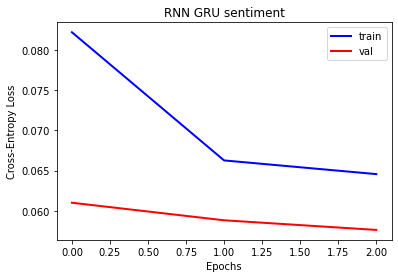

In [ ]:
plt.figure()
plt.plot(glove_rnn_gru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_gru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

5. RNN with Bi-GRU

In [ ]:
glove_rnn_bigru = Sequential() #groups a linear stack of layers
glove_rnn_bigru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
glove_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
glove_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and add GRU layer
glove_rnn_bigru.add(BatchNormalization()) #add normalization layer
glove_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
glove_rnn_bigru.add(Dropout(0.5))
glove_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
glove_rnn_bigru.add(Dense(6, activation='sigmoid'))

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
glove_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

glove_rnn_bigru.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 200, 300)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200, 50)           49050     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 50)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)               

In [ ]:
#model training - 18m 25s (already optimal params)
glove_rnn_bigru_hist = glove_rnn_bigru.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 553s 122ms/step - loss: 0.0836 - accuracy: 0.9219 - val_loss: 0.0559 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 548s 122ms/step - loss: 0.0582 - accuracy: 0.9924 - val_loss: 0.0538 - val_accuracy: 0.9937


In [ ]:
glove_test_loss_rnn_bigru, glove_test_auc_rnn_bigru = glove_rnn_bigru.evaluate(X_test, y_test, batch_size=32) #using evaluate method to get test loss and test accuracy
print('Test Loss:    ', glove_test_loss_rnn_bigru)
print('Test Accuracy:', glove_test_auc_rnn_bigru)

2000/2000 [==============================] - 70s 35ms/step - loss: 0.0698 - accuracy: 0.9965
Test Loss:     0.06977096199989319
Test Accuracy: 0.9964519143104553


In [ ]:
y_pred = glove_rnn_bigru.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.46333707247131234
Hamming loss: 2.7720466410328553
F1 score: 0.6687897994378587
---


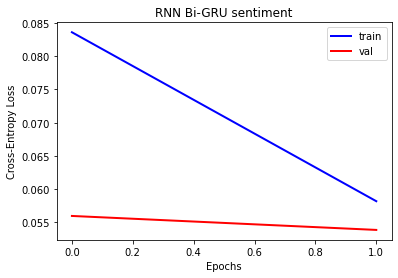

In [ ]:
plt.figure()
plt.plot(glove_rnn_bigru_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_bigru_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

#Comparisons

In [ ]:
# concat all training, validation and testing accuracy scores (before hyperparameter tuning)
accuracy_ft_cnn = ['FastText CNN', #model name
               np.mean(ft_cnn_hist.history['accuracy']), #model accuracy statistics - training, validation and test accuracies
               np.mean(ft_cnn_hist.history['val_accuracy']), 
               ft_test_auc_cnn] 

accuracy_ft_lstm = ['FastText RNN - LSTM', 
               np.mean(ft_rnn_lstm_hist.history['accuracy']), 
               np.mean(ft_rnn_lstm_hist.history['val_accuracy']), 
               ft_test_auc_rnn_lstm]

accuracy_ft_bilstm = ['FastText RNN - Bi-LSTM', 
                np.mean(ft_rnn_bilstm_hist.history['accuracy']), 
                np.mean(ft_rnn_bilstm_hist.history['val_accuracy']), 
                ft_test_auc_rnn_bilstm]

accuracy_ft_gru = ['FastText RNN - GRU', 
                np.mean(ft_rnn_gru_hist.history['accuracy']), 
                np.mean(ft_rnn_gru_hist.history['val_accuracy']), 
                ft_test_auc_rnn_gru]

accuracy_ft_bigru = ['FastText RNN- Bi-GRU ', 
                np.mean(ft_rnn_bigru_hist.history['accuracy']), 
                np.mean(ft_rnn_bigru_hist.history['val_accuracy']), 
                ft_test_auc_rnn_bigru]



accuracy_w2v_cnn = ['Word2Vec CNN', 
                np.mean(w2v_cnn_hist.history['acc']), 
                np.mean(w2v_cnn_hist.history['val_acc']), 
                w2v_test_auc_cnn]

accuracy_w2v_lstm = ['Word2Vec RNN - LSTM ',
                np.mean(w2v_rnn_lstm_hist.history['accuracy']), 
                np.mean(w2v_rnn_lstm_hist.history['val_accuracy']), 
                w2v_test_auc_rnn_lstm]

accuracy_w2v_bilstm = ['Word2Vec RNN- Bi-LSTM', 
                  np.mean(w2v_rnn_bilstm_hist.history['accuracy']), 
                  np.mean(w2v_rnn_bilstm_hist.history['val_accuracy']), 
                  w2v_test_auc_rnn_bilstm]

accuracy_w2v_gru = ['Word2Vec RNN - GRU', 
                  np.mean(w2v_rnn_gru_hist.history['accuracy']), 
                  np.mean(w2v_rnn_gru_hist.history['val_accuracy']), 
                  w2v_test_auc_rnn_gru]

accuracy_w2v_bigru = ['Word2Vec RNN - Bi-GRU', 
                  np.mean(w2v_rnn_bigru_hist.history['accuracy']), 
                  np.mean(w2v_rnn_bigru_hist.history['val_accuracy']), 
                  w2v_test_auc_rnn_bigru]


 
accuracy_glove_cnn= ['Glove CNN', 
                    np.mean(glove_cnn_hist.history['accuracy']), 
                    np.mean(glove_cnn_hist.history['val_accuracy']), 
                    glove_test_auc_cnn]

accuracy_glove_lstm= ['Glove RNN - LSTM', 
                    np.mean(glove_rnn_lstm_hist.history['accuracy']), 
                    np.mean(glove_rnn_lstm_hist.history['val_accuracy']), 
                    glove_test_auc_rnn_lstm]

accuracy_glove_bilstm= ['Glove RNN - Bi-LSTM', 
                    np.mean(glove_rnn_bilstm_hist.history['accuracy']), 
                    np.mean(glove_rnn_bilstm_hist.history['val_accuracy']), 
                     glove_test_auc_rnn_bilstm]

accuracy_glove_gru= ['Glove RNN - GRU', 
                    np.mean(glove_rnn_gru_hist.history['accuracy']), 
                    np.mean(glove_rnn_gru_hist.history['val_accuracy']), 
                     glove_test_auc_rnn_gru]

accuracy_glove_bigru= ['Glove RNN - Bi-GRU', 
                    np.mean(glove_rnn_bigru_hist.history['accuracy']), 
                    np.mean(glove_rnn_bigru_hist.history['val_accuracy']), 
                     glove_test_auc_rnn_bigru]

#create dataframe
comparison_summary = pd.DataFrame([accuracy_ft_cnn])
#append all other scores
comparison_summary = comparison_summary.append([accuracy_ft_lstm, accuracy_ft_bilstm, accuracy_ft_gru, accuracy_ft_bigru, accuracy_w2v_cnn, accuracy_w2v_lstm,accuracy_w2v_bilstm, accuracy_w2v_gru, accuracy_w2v_bigru, accuracy_glove_cnn, accuracy_glove_lstm, accuracy_glove_bilstm, accuracy_glove_gru, accuracy_glove_bigru])


In [ ]:
#clean the new dataframe - add columns
comparison_summary.columns = ['Algorithm', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
comparison_summary.set_index(['Algorithm'], inplace=True)
comparison_summary

,Training Accuracy,Validation Accuracy,Testing Accuracy
Algorithm,,,
FastText CNN,0.978630,0.993984,0.997530
FastText RNN - LSTM,0.955533,0.992449,0.993044
FastText RNN - Bi-LSTM,0.958047,0.993264,0.994248
FastText RNN - GRU,0.946419,0.993984,0.997609
FastText RNN- Bi-GRU,0.953970,0.993890,0.997609
Word2Vec CNN,0.972085,0.993984,0.997609
Word2Vec RNN - LSTM,0.959192,0.993984,0.997609
Word2Vec RNN- Bi-LSTM,0.957149,0.993922,0.997609
Word2Vec RNN - GRU,0.954301,0.993984,0.997609


# Word2Vec Data-specific Embeddings

Pre-processing

In [ ]:
w2v_df_own=df_cleaned #import a copy of the cleaned data

In [ ]:
w2v_df_own['tokens'] = w2v_df_own['comment_text'].apply(lambda words: (words.split(" "))) #make tokens of the comments in the dataframe

In [ ]:
import time
from gensim.models import Word2Vec, KeyedVectors #import gensim package

In [ ]:
start_time = time.time()

w2v_ownembed = Word2Vec(sentences=w2v_df_own['tokens'],  #use the Word2Vec inbuilt method from gensim to train our data-specific embeddings
                 sg=1, 
                 size=300,  
                 workers=4)

In [ ]:
print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 2.23 mins


In [ ]:
MAX_VOCAB_SIZE = 175303 #how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 200 #max number of words in a comment to use
embed_dim = 300 #how big is each word vector (k, later)

In [ ]:
w2v_ownembed

In [ ]:
import tensorflow as tf  #required imports
from tensorflow import keras
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False) #initialise a tokenizer
tokenizer.fit_on_texts(w2v_df_own["comment_text"].tolist()) #updates vocab based on the comment tokens from training data
training_sequences = tokenizer.texts_to_sequences(w2v_df_own["comment_text"].tolist()) #transforms each text to a seq of ints

train_word_index = tokenizer.word_index #indices of words in the dictionary
print('Found %s unique tokens.' % len(train_word_index))

train_data = sequence.pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

#building the embedding matrix
train_embedding_weights = np.zeros((len(train_word_index)+1, embed_dim)) #matrix with 0s of required dim
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = w2v_ownembed[word] if word in w2v_ownembed else np.random.rand(embed_dim) #either fill with pretrained weights or random
print(train_embedding_weights.shape)

Found 136407 unique tokens.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


(136408, 300)


In [ ]:
#for test data
test_sequences = tokenizer.texts_to_sequences(tester["comment_text"].tolist()) #transforms each text to a seq of ints
test_data = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

MODELS

In [ ]:
#common -------- run before any of the Word2Vec Models below
from keras import Input
from keras.layers import Concatenate, Embedding
from keras import Model

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU

#defines callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test):
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---") 

#end of common ------


1. CNN

In [ ]:
w2v_cnn_own = Sequential() #groups a linear stack of layers
w2v_cnn_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) # add embedding layer 
w2v_cnn_own.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields ADD
w2v_cnn_own.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space ADD
#add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
w2v_cnn_own.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
w2v_cnn_own.add(GlobalMaxPool1D()) #add pooling layer 
w2v_cnn_own.add(Dropout(0.5)) #drops 50% of the nodes randomly to prevent overfitting
w2v_cnn_own.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
w2v_cnn_own.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel (6 output classes)

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

In [ ]:
w2v_cnn_own.compile(loss='binary_crossentropy', #uses binary crossentropy
                  optimizer='adam',
                  metrics=['acc'])
w2v_cnn_own.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 64)           134464    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 100, 64)           16448     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 64)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [ ]:
#train the NN
w2v_cnn_own_hist = w2v_cnn_own.fit(train_data, y_train, epochs=2, callbacks=callbacks_list, validation_split=0.1, shuffle=True, batch_size=32)

Epoch 1/2
4488/4488 [==============================] - 324s 72ms/step - loss: 0.0608 - acc: 0.9723 - val_loss: 0.0513 - val_acc: 0.9940
Epoch 2/2
4488/4488 [==============================] - 319s 71ms/step - loss: 0.0504 - acc: 0.9936 - val_loss: 0.0515 - val_acc: 0.9934


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

w2v_test_loss_cnn, w2v_test_auc_cnn = w2v_cnn_own.evaluate(test_data, y_test, batch_size=32) #use the evaluate method to obtain test loss and test accuracy
print('Test Loss:     ', w2v_test_loss_cnn)
print('Test Accuracy:', w2v_test_auc_cnn)

2000/2000 [==============================] - 46s 23ms/step - loss: 0.0749 - acc: 0.9951
Test Loss:      0.07486538589000702
Test Accuracy: 0.9951233267784119


In [ ]:
y_pred = w2v_cnn_own.predict(test_data, batch_size=1024, verbose=1)

63/63 [==============================] - 38s 606ms/step


In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.45925379102832103
Hamming loss: 2.981493638438213
F1 score: 0.6621481671842169
---


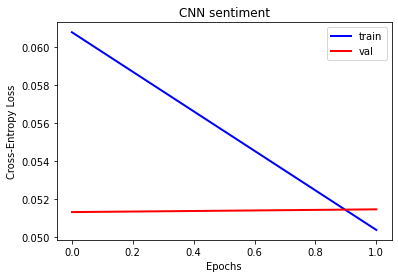

In [ ]:
plt.figure()
plt.plot(w2v_cnn_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_cnn_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 16m 41s
w2v_cnn_own_hist = w2v_cnn_own.fit(train_data, y_train, epochs=3, callbacks=callbacks_list, validation_split=0.1, shuffle=True, batch_size=20)

Epoch 1/3
7181/7181 [==============================] - 336s 47ms/step - loss: 0.0612 - acc: 0.9503 - val_loss: 0.0529 - val_acc: 0.9940
Epoch 2/3
7181/7181 [==============================] - 333s 46ms/step - loss: 0.0511 - acc: 0.9924 - val_loss: 0.0529 - val_acc: 0.9940
Epoch 3/3
7181/7181 [==============================] - 332s 46ms/step - loss: 0.0484 - acc: 0.9936 - val_loss: 0.0530 - val_acc: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

w2v_test_loss_cnn, w2v_test_auc_cnn = w2v_cnn_own.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:     ', w2v_test_loss_cnn)
print('Test Accuracy:', w2v_test_auc_cnn)

3199/3199 [==============================] - 50s 16ms/step - loss: 0.0736 - acc: 0.9976
Test Loss:      0.07360110431909561
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_cnn_own.predict(test_data)
print_score(np.round(y_pred), y_test) #only jaccard is very minutely worse, due to small parameter grid when tuning - need more computational power

Jaccard score: 0.4533611646133677
Hamming loss: 2.9332999885377267
F1 score: 0.6630333937069524
---


In [ ]:
plt.figure()
plt.plot(w2v_cnn_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_cnn_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

2. RNN (with LSTM)

In [ ]:
w2v_rnn_lstm_own = Sequential() #groups a linear stack of layers
w2v_rnn_lstm_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_rnn_lstm_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2v_rnn_lstm_own.add(LSTM(25, return_sequences=True)) #add LSTM layer
w2v_rnn_lstm_own.add(BatchNormalization()) #add normalization layer
w2v_rnn_lstm_own.add(GlobalMaxPool1D()) #add pooling layer - see comment below
w2v_rnn_lstm_own.add(Dropout(0.5))
w2v_rnn_lstm_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2v_rnn_lstm_own.add(Dense(6, activation='sigmoid'))


#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 

w2v_rnn_lstm_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2v_rnn_lstm_own.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 200, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 25)           32600     
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 25)           100       
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 25)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)               

In [ ]:
#model training
w2v_rnn_lstm_own_hist = w2v_rnn_lstm_own.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 397s 88ms/step - loss: 0.0852 - accuracy: 0.9421 - val_loss: 0.0614 - val_accuracy: 0.9939
Epoch 2/2
4488/4488 [==============================] - 397s 88ms/step - loss: 0.0685 - accuracy: 0.9903 - val_loss: 0.0572 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_rnn_lstm_own, w2v_test_auc_rnn_lstm_own = w2v_rnn_lstm_own.evaluate(test_data, y_test, batch_size=32) #using the evaluate method to get test loss and test accuracy
print('Test Loss:    ', w2v_test_loss_rnn_lstm_own)
print('Test Accuracy:', w2v_test_auc_rnn_lstm_own)

2000/2000 [==============================] - 50s 25ms/step - loss: 0.0759 - accuracy: 0.9976
Test Loss:     0.07588927447795868
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_lstm_own.predict(test_data)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.38967498338965245
Hamming loss: 2.9309554325966216
F1 score: 0.6074221131070581
---


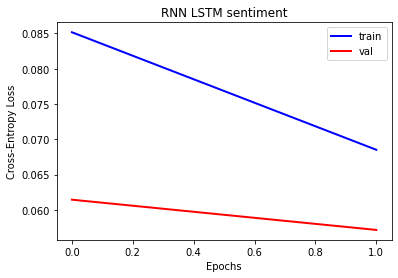

In [ ]:
plt.figure()
plt.plot(w2v_rnn_lstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_lstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 21m 26s
w2v_rnn_lstm_own_hist = w2v_rnn_lstm_own.fit(train_data, y_train, batch_size=20, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
7181/7181 [==============================] - 646s 90ms/step - loss: 0.0778 - accuracy: 0.9482 - val_loss: 0.0588 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 640s 89ms/step - loss: 0.0645 - accuracy: 0.9921 - val_loss: 0.0602 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
w2v_test_loss_rnn_lstm_own, w2v_test_auc_rnn_lstm_own = w2v_rnn_lstm_own.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:    ', w2v_test_loss_rnn_lstm_own)
print('Test Accuracy:', w2v_test_auc_rnn_lstm_own)

3199/3199 [==============================] - 69s 22ms/step - loss: 0.0722 - accuracy: 0.9976
Test Loss:     0.07223957031965256
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_lstm_own.predict(test_data)
print_score(np.round(y_pred), y_test) #worse jaccard and f1 score, maybe due to smaller hyperparameter grid in grid search. can be expanded with more computation power

Jaccard score: 0.3673350537306951
Hamming loss: 2.7433909573082413
F1 score: 0.5934246260863183
---


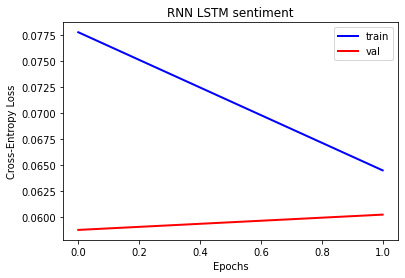

In [ ]:
plt.figure()
plt.plot(w2v_rnn_lstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_lstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

3. RNN (with Bi-LSTM)

In [ ]:
w2v_rnn_bilstm_own = Sequential() #groups a linear stack of layers
w2v_rnn_bilstm_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_rnn_bilstm_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2v_rnn_bilstm_own.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer and pass in an LSTM()
w2v_rnn_bilstm_own.add(BatchNormalization()) #add normalization layer
w2v_rnn_bilstm_own.add(GlobalMaxPool1D()) #add pooling layer - see below comment
w2v_rnn_bilstm_own.add(Dropout(0.5))
w2v_rnn_bilstm_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2v_rnn_bilstm_own.add(Dense(6, activation='sigmoid')) #six output classes


#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 

w2v_rnn_bilstm_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2v_rnn_bilstm_own.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 300)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 50)           65200     
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2

In [ ]:
#model training
w2v_rnn_bilstm_own_hist = w2v_rnn_bilstm_own.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 537s 119ms/step - loss: 0.0783 - accuracy: 0.9268 - val_loss: 0.0544 - val_accuracy: 0.9936
Epoch 2/2
4488/4488 [==============================] - 534s 119ms/step - loss: 0.0568 - accuracy: 0.9899 - val_loss: 0.0520 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_rnn_bilstm_own, w2v_test_auc_rnn_bilstm_own = w2v_rnn_bilstm_own.evaluate(test_data, y_test, batch_size=32) #evaluate method to get test loss and test accuracy
print('Test Loss:    ', w2v_test_loss_rnn_bilstm_own)
print('Test Accuracy:', w2v_test_auc_rnn_bilstm_own)

2000/2000 [==============================] - 74s 37ms/step - loss: 0.0694 - accuracy: 0.9976
Test Loss:     0.06940944492816925
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_bilstm_own.predict(test_data)
y_pred

array([[1.99949741e-03, 1.66705814e-08, 7.42992997e-05, 5.43504120e-06,
        3.31133604e-04, 1.22056454e-05],
       [1.51730716e-01, 1.09568238e-03, 1.76834166e-02, 1.26957297e-02,
        3.83557975e-02, 1.30565166e-02],
       [1.43477321e-02, 6.45530235e-07, 1.10054016e-03, 4.07601692e-05,
        3.36119533e-03, 1.44749880e-04],
       ...,
       [6.18824065e-01, 1.78782940e-02, 1.92470700e-01, 2.95475721e-02,
        2.81908453e-01, 6.74626231e-02],
       [9.31516171e-01, 1.05578035e-01, 6.65825605e-01, 3.57063711e-02,
        5.40107906e-01, 1.39352232e-01],
       [8.85942578e-03, 5.40858025e-07, 5.49554825e-04, 5.02145776e-05,
        1.67226791e-03, 1.36822462e-04]], dtype=float32)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4505958737437876
Hamming loss: 2.7379203267789967
F1 score: 0.6618953731831713
---


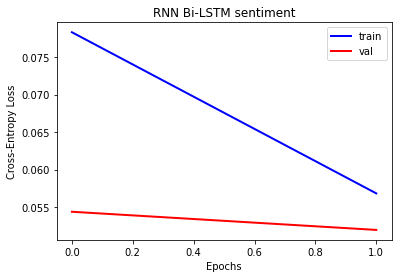

In [ ]:
plt.figure()
plt.plot(w2v_rnn_bilstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_bilstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - (approx 40 mins)
w2v_rnn_bilstm_own_hist = w2v_rnn_bilstm_own.fit(train_data, y_train, batch_size=20, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 853s 118ms/step - loss: 0.0714 - accuracy: 0.9514 - val_loss: 0.0542 - val_accuracy: 0.9940
Epoch 2/3
7181/7181 [==============================] - 787s 110ms/step - loss: 0.0536 - accuracy: 0.9913 - val_loss: 0.0550 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
w2v_test_loss_rnn_bilstm_own, w2v_test_auc_rnn_bilstm_own = w2v_rnn_bilstm_own.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:    ', w2v_test_loss_rnn_bilstm_own)
print('Test Accuracy:', w2v_test_auc_rnn_bilstm_own)

3199/3199 [==============================] - 90s 28ms/step - loss: 0.0722 - accuracy: 0.9976
Test Loss:     0.0721864178776741
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = w2v_rnn_bilstm_own.predict(test_data)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.45013234018278175
Hamming loss: 2.6897266768785104
F1 score: 0.6639857017896659
---


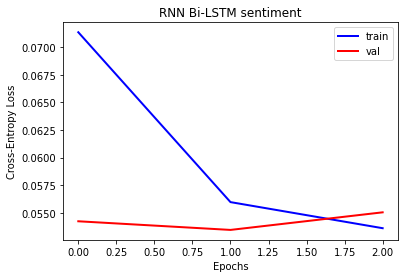

In [ ]:
plt.figure()
plt.plot(w2v_rnn_bilstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_bilstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

4. RNN (with GRU)

In [ ]:
w2v_rnn_gru_own = Sequential() #groups a linear stack of layers
w2v_rnn_gru_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_rnn_gru_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2v_rnn_gru_own.add(GRU(25, return_sequences=True)) #add GRU layer
w2v_rnn_gru_own.add(BatchNormalization()) #add normalization layer
w2v_rnn_gru_own.add(GlobalMaxPool1D()) #add pooling layer - see explanation in comment below
w2v_rnn_gru_own.add(Dropout(0.5))
w2v_rnn_gru_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2v_rnn_gru_own.add(Dense(6, activation='sigmoid')) # 6 classes in output


#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

w2v_rnn_gru_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
w2v_rnn_gru_own.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 300)         0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 200, 25)           24525     
                                                                 
 batch_normalization (BatchN  (None, 200, 25)          100       
 ormalization)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                        

In [ ]:
#model training
w2v_rnn_gru_own_hist = w2v_rnn_gru_own.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 438s 97ms/step - loss: 0.0895 - accuracy: 0.9354 - val_loss: 0.0624 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 437s 97ms/step - loss: 0.0693 - accuracy: 0.9881 - val_loss: 0.0596 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_rnn_gru_own, w2v_test_auc_rnn_gru_own = w2v_rnn_gru_own.evaluate(test_data, y_test, batch_size=32) #use the evaluate method to find test loss and test accuracy
print('Test Loss:    ', w2v_test_loss_rnn_gru_own)
print('Test Accuracy:', w2v_test_auc_rnn_gru_own)

2000/2000 [==============================] - 56s 28ms/step - loss: 0.0712 - accuracy: 0.9976
Test Loss:     0.07119684666395187
Test Accuracy: 0.9975929260253906


In [ ]:
y_pred = w2v_rnn_gru_own.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.389661242921712
Hamming loss: 2.7564162680921567
F1 score: 0.5956018875529652
---


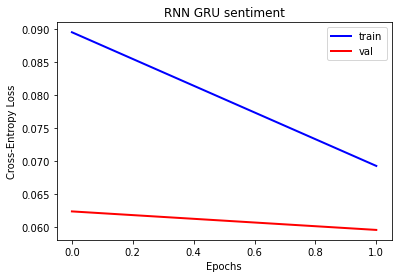

In [ ]:
plt.figure()
plt.plot(w2v_rnn_gru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_gru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 31 m 20s
w2v_rnn_gru_own_hist = w2v_rnn_gru_own.fit(train_data, y_train, batch_size=20, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 638s 88ms/step - loss: 0.0793 - accuracy: 0.9468 - val_loss: 0.0583 - val_accuracy: 0.9940
Epoch 2/3
7181/7181 [==============================] - 628s 87ms/step - loss: 0.0653 - accuracy: 0.9907 - val_loss: 0.0594 - val_accuracy: 0.9940
Epoch 3/3
7181/7181 [==============================] - 614s 85ms/step - loss: 0.0635 - accuracy: 0.9929 - val_loss: 0.0584 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
w2v_test_loss_rnn_gru_own, w2v_test_auc_rnn_gru_own = w2v_rnn_gru_own.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:    ', w2v_test_loss_rnn_gru_own)
print('Test Accuracy:', w2v_test_auc_rnn_gru_own)

3199/3199 [==============================] - 57s 18ms/step - loss: 0.0727 - accuracy: 0.9975
Test Loss:     0.07267791032791138
Test Accuracy: 0.9975460171699524


In [ ]:
y_pred = w2v_rnn_gru_own.predict(test_data)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.40208425771017375
Hamming loss: 2.748340575406129
F1 score: 0.6143015977516444
---


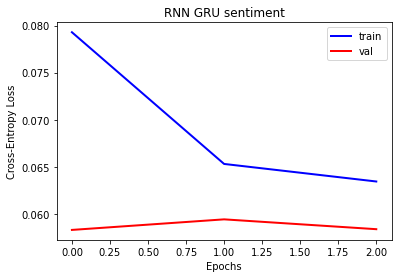

In [ ]:
plt.figure()
plt.plot(w2v_rnn_gru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_gru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

5. RNN (with Bi-GRU)

In [ ]:
w2v_rnn_bigru_own = Sequential() #groups a linear stack of layers
w2v_rnn_bigru_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
w2v_rnn_bigru_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2v_rnn_bigru_own.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and pass in a GRU layer
w2v_rnn_bigru_own.add(BatchNormalization()) #add normalization layer
w2v_rnn_bigru_own.add(GlobalMaxPool1D()) #add pooling layer - see explanation in comment below
w2v_rnn_bigru_own.add(Dropout(0.5))
w2v_rnn_bigru_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2v_rnn_bigru_own.add(Dense(6, activation='sigmoid')) #for 6 output classes


#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

w2v_rnn_bigru_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2v_rnn_bigru_own.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200, 50)          49050     
 l)                                                              
                                                                 
 batch_normalization_1 (Batc  (None, 200, 50)          200       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                     

In [ ]:
#model training
w2v_rnn_bigru_own_hist = w2v_rnn_bigru_own.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 567s 125ms/step - loss: 0.0762 - accuracy: 0.9304 - val_loss: 0.0533 - val_accuracy: 0.9939
Epoch 2/2
4488/4488 [==============================] - 567s 126ms/step - loss: 0.0566 - accuracy: 0.9893 - val_loss: 0.0520 - val_accuracy: 0.9939


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
w2v_test_loss_rnn_bigru_own, w2v_test_auc_rnn_bigru_own = w2v_rnn_bigru_own.evaluate(test_data, y_test, batch_size=32) #use evaluate method to get test loss and test accuracy
print('Test Loss:    ', w2v_test_loss_rnn_bigru_own)
print('Test Accuracy:', w2v_test_auc_rnn_bigru_own)

2000/2000 [==============================] - 68s 34ms/step - loss: 0.0692 - accuracy: 0.9973
Test Loss:     0.06917847692966461
Test Accuracy: 0.9972646832466125


In [ ]:
y_pred = w2v_rnn_bigru_own.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.44892916442014663
Hamming loss: 2.7475590567590946
F1 score: 0.6587879726093006
---


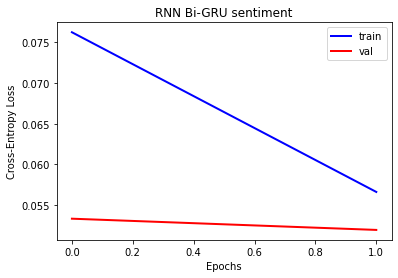

In [ ]:
plt.figure()
plt.plot(w2v_rnn_bigru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_bigru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs): 27m 25s
w2v_rnn_bigru_own_hist = w2v_rnn_bigru_own.fit(train_data, y_train, batch_size=32, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
4488/4488 [==============================] - 540s 120ms/step - loss: 0.0783 - accuracy: 0.9316 - val_loss: 0.0539 - val_accuracy: 0.9940
Epoch 2/3
4488/4488 [==============================] - 537s 120ms/step - loss: 0.0558 - accuracy: 0.9915 - val_loss: 0.0513 - val_accuracy: 0.9940
Epoch 3/3
4488/4488 [==============================] - 551s 123ms/step - loss: 0.0536 - accuracy: 0.9909 - val_loss: 0.0502 - val_accuracy: 0.9939


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
w2v_test_loss_rnn_bigru_own, w2v_test_auc_rnn_bigru_own = w2v_rnn_bigru_own.evaluate(test_data, y_test, batch_size=32)
print('Test Loss:    ', w2v_test_loss_rnn_bigru_own)
print('Test Accuracy:', w2v_test_auc_rnn_bigru_own)

2000/2000 [==============================] - 65s 33ms/step - loss: 0.0733 - accuracy: 0.9973
Test Loss:     0.07332102954387665
Test Accuracy: 0.9973115921020508


In [ ]:
y_pred = w2v_rnn_bigru_own.predict(test_data)
print_score(np.round(y_pred), y_test) #hamming loss got worse - maybe due to parameters grid being small (need more computation power for a larger grid)

Jaccard score: 0.46291166632729946
Hamming loss: 2.910635947773714
F1 score: 0.6689567687933118
---


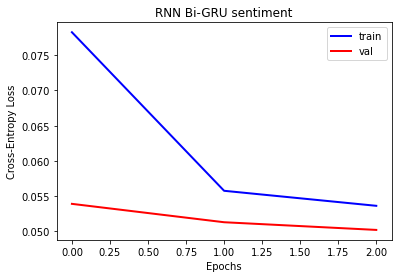

In [ ]:
plt.figure()
plt.plot(w2v_rnn_bigru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(w2v_rnn_bigru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

# FastText Data-specific Embeddings 

Pre-processing

In [ ]:
from gensim.models import FastText  #import from gensim a fasttext method to generate our data-specific embeddings
import time
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from tqdm import tqdm

In [ ]:
ft_df_own=df_cleaned #import a copy of the cleaned dataset

In [ ]:
MAX_VOCAB_SIZE = 175303 #how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 200 #max number of words in a comment to use
embed_dim = 300 #how big is each word vector (k, later)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+') #regex to tokenize, w=alphanumeric

In [ ]:
print("pre-processing train data...")
processed_docs_train = [] #initialise an empty array
training=ft_df_own['comment_text'].tolist() #obtain comment data from training
for doc in tqdm(training): #for each comment in data
    tokens = tokenizer.tokenize(doc) #tokenize training data
    filtered = [word for word in tokens if word not in stop_words] #if the word isn't a stop word
    processed_docs_train.append(" ".join(filtered)) #add to the array

processed_docs_test = []
testing=tester['comment_text'].tolist() #similarly, tokenize test data
for doc in tqdm(testing):
    tokens = tokenizer.tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test.append(" ".join(filtered))

pre-processing train data...


100%|██████████| 63978/63978 [00:00<00:00, 69711.19it/s]


In [ ]:
start_time = time.time()

ftmodel = FastText(sentences=processed_docs_train, #generate our data-specific embeddings
                 sg=1, 
                 size=300,  
                 workers=4) #sg=skipgram - predicts related words given a central word

In [ ]:
print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 2.96 mins


In [ ]:
ftmodel

In [ ]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False) #initialise a tokenizer
tokenizer.fit_on_texts(ft_df_own["comment_text"].tolist()) #updates vocab based on the comment tokens
training_sequences = tokenizer.texts_to_sequences(ft_df_own["comment_text"].tolist()) #transforms each text to a seq of ints

train_word_index = tokenizer.word_index #indices of words in the dictionary
print('Found %s unique tokens.' % len(train_word_index))

train_data = sequence.pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

#creating an embedding matrix
train_embedding_weights = np.zeros((len(train_word_index)+1, embed_dim)) #matrix with 0s of required dim
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = ftmodel[word] if word in ftmodel else np.random.rand(embed_dim) #either fill with pretrained weights or random
print(train_embedding_weights.shape)

Found 136407 unique tokens.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


(136408, 300)


In [ ]:
#similarly for test data, we preprocessing
test_sequences = tokenizer.texts_to_sequences(tester["comment_text"].tolist()) #transforms each text to a seq of ints
test_data = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

MODELS

In [ ]:
#common -------- run before any of the FastText Models below
from keras import Input
from keras.layers import Concatenate, Embedding
from keras import Model

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU

label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y_train=ft_df_own[label_names].values
y_train

from keras.callbacks import ModelCheckpoint, EarlyStopping
#defines callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test):
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---") 

#end of common ------

1. CNN

In [ ]:
ft_cnn_own = Sequential() #groups a linear stack of layers
ft_cnn_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) # add embedding layer 
ft_cnn_own.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields 
ft_cnn_own.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space
#add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
ft_cnn_own.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
ft_cnn_own.add(GlobalMaxPool1D()) #add pooling layer - see below
ft_cnn_own.add(Dropout(0.5)) #to prevent overfitting, 50% of input unit values are dropped. 
ft_cnn_own.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
ft_cnn_own.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 

ft_cnn_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
ft_cnn_own.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 64)           134464    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 64)           16448     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [ ]:
#train the NN
ft_cnn_own_hist = ft_cnn_own.fit(train_data, y_train, epochs=2, callbacks=callbacks_list, validation_split=0.1, shuffle=True, batch_size=32)

Epoch 1/2
4488/4488 [==============================] - 310s 69ms/step - loss: 0.1091 - acc: 0.9472 - val_loss: 0.0885 - val_acc: 0.9940
Epoch 2/2
4488/4488 [==============================] - 307s 68ms/step - loss: 0.0822 - acc: 0.9939 - val_loss: 0.0790 - val_acc: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_cnn, ft_test_auc_cnn = ft_cnn_own.evaluate(test_data, y_test, batch_size=32) #use the evaluate method to get test loss and test accuracy
print('Test Loss:     ', ft_test_loss_cnn)
print('Test Accuracy:', ft_test_auc_cnn)

2000/2000 [==============================] - 44s 22ms/step - loss: 0.0976 - acc: 0.9976
Test Loss:      0.0976334661245346
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = ft_cnn_own.predict(test_data, batch_size=1024, verbose=1)

63/63 [==============================] - 37s 588ms/step


In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.37965511134510366
Hamming loss: 3.459783050423583
F1 score: 0.5810724228762509
---


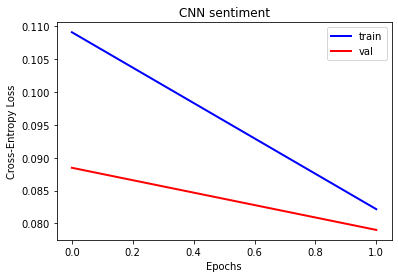

In [ ]:
plt.figure()
plt.plot(ft_cnn_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(ft_cnn_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 11m 53s
ft_cnn_own_hist = ft_cnn_own.fit(train_data, y_train, epochs=2, callbacks=callbacks_list, validation_split=0.1, shuffle=True, batch_size=20)

Epoch 1/2
7181/7181 [==============================] - 353s 49ms/step - loss: 0.1136 - acc: 0.9625 - val_loss: 0.0938 - val_acc: 0.9939
Epoch 2/2
7181/7181 [==============================] - 359s 50ms/step - loss: 0.0943 - acc: 0.9938 - val_loss: 0.0974 - val_acc: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
ft_test_loss_cnn, ft_test_auc_cnn = ft_cnn_own.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:     ', ft_test_loss_cnn)
print('Test Accuracy:', ft_test_auc_cnn)

3199/3199 [==============================] - 52s 16ms/step - loss: 0.1239 - acc: 0.9976
Test Loss:      0.12392503768205643
Test Accuracy: 0.9975929260253906


In [ ]:
y_pred = ft_cnn_own.predict(test_data)
print_score(np.round(y_pred), y_test) #did much worse - maybe grid was too small for gridsearch and values not apt

Jaccard score: 0.2834857311134482
Hamming loss: 3.9445851178009104
F1 score: 0.47566430534284687
---


In [ ]:
plt.figure()
plt.plot(ft_cnn_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(ft_cnn_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

2. RNN (with LSTM)

In [ ]:
ft_rnn_lstm_own = Sequential() #groups a linear stack of layers
ft_rnn_lstm_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
ft_rnn_lstm_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
ft_rnn_lstm_own.add(LSTM(25, return_sequences=True)) #add LSTM layer
ft_rnn_lstm_own.add(BatchNormalization()) #add normalization layer
ft_rnn_lstm_own.add(GlobalMaxPool1D()) #add pooling layer - see below
ft_rnn_lstm_own.add(Dropout(0.5))
ft_rnn_lstm_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
ft_rnn_lstm_own.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

ft_rnn_lstm_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

ft_rnn_lstm_own.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 200, 25)           32600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 25)           100       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 25)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)               

In [ ]:
#train the model
ft_rnn_lstm_own_hist = ft_rnn_lstm_own.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 398s 88ms/step - loss: 0.1456 - accuracy: 0.9066 - val_loss: 0.1443 - val_accuracy: 0.9939
Epoch 2/2
4488/4488 [==============================] - 404s 90ms/step - loss: 0.1303 - accuracy: 0.9873 - val_loss: 0.1339 - val_accuracy: 0.9937


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_rnn_lstm_own, ft_test_auc_rnn_lstm_own = ft_rnn_lstm_own.evaluate(test_data, y_test, batch_size=32) #use the evaluate method to get test loss and test accuracy of the model
print('Test Loss:    ', ft_test_loss_rnn_lstm_own)
print('Test Accuracy:', ft_test_auc_rnn_lstm_own)

2000/2000 [==============================] - 50s 25ms/step - loss: 0.1432 - accuracy: 0.9973
Test Loss:     0.14315715432167053
Test Accuracy: 0.9972959160804749


In [ ]:
y_pred = ft_rnn_lstm_own.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.06588207307977813
Hamming loss: 3.8997780487042424
F1 score: 0.1402392262430826
---


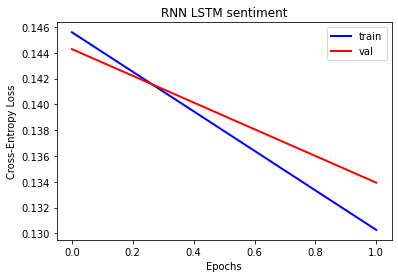

In [ ]:
plt.figure()
plt.plot(ft_rnn_lstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(ft_rnn_lstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs)
ft_rnn_lstm_own_hist = ft_rnn_lstm_own.fit(train_data, y_train, batch_size=20, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 623s 87ms/step - loss: 0.1441 - accuracy: 0.8854 - val_loss: 0.1406 - val_accuracy: 0.9739
Epoch 2/3
7181/7181 [==============================] - 655s 91ms/step - loss: 0.1249 - accuracy: 0.9808 - val_loss: 0.1139 - val_accuracy: 0.9940
Epoch 3/3
7181/7181 [==============================] - 659s 92ms/step - loss: 0.1118 - accuracy: 0.9907 - val_loss: 0.1023 - val_accuracy: 0.9935


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
ft_test_loss_rnn_lstm_own, ft_test_auc_rnn_lstm_own = ft_rnn_lstm_own.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:    ', ft_test_loss_rnn_lstm_own)
print('Test Accuracy:', ft_test_auc_rnn_lstm_own)

3199/3199 [==============================] - 83s 26ms/step - loss: 0.1146 - accuracy: 0.9973
Test Loss:     0.11461843550205231
Test Accuracy: 0.9972646832466125


In [ ]:
y_pred = ft_rnn_lstm_own.predict(test_data)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.2458064966887076
Hamming loss: 3.330050955015787
F1 score: 0.4256301382549475
---


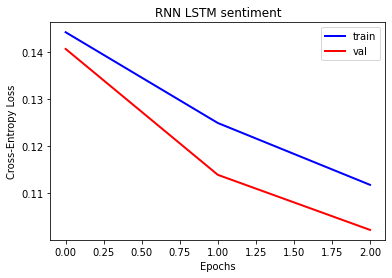

In [ ]:
plt.figure()
plt.plot(ft_rnn_lstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(ft_rnn_lstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

3. RNN (with Bi-LSTM)

In [ ]:
ft_rnn_bilstm_own = Sequential() #groups a linear stack of layers
ft_rnn_bilstm_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
ft_rnn_bilstm_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
ft_rnn_bilstm_own.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer and pass in an LSTM()
ft_rnn_bilstm_own.add(BatchNormalization()) #add normalization layer
ft_rnn_bilstm_own.add(GlobalMaxPool1D()) #add pooling layer - see below comment
ft_rnn_bilstm_own.add(Dropout(0.5))
ft_rnn_bilstm_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
ft_rnn_bilstm_own.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

ft_rnn_bilstm_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

ft_rnn_bilstm_own.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 200, 300)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 50)           65200     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 50)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)               

In [ ]:
#train NN model - these also happen to be the optimal parameters for this NN.
ft_rnn_bilstm_own_hist = ft_rnn_bilstm_own.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 514s 114ms/step - loss: 0.1074 - accuracy: 0.9886 - val_loss: 0.1072 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_rnn_bilstm_own, ft_test_auc_rnn_bilstm_own = ft_rnn_bilstm_own.evaluate(test_data, y_test, batch_size=32) #use the evaluate method to get test loss and test accuracy
print('Test Loss:    ', ft_test_loss_rnn_bilstm_own)
print('Test Accuracy:', ft_test_auc_rnn_bilstm_own)

2000/2000 [==============================] - 69s 34ms/step - loss: 0.1264 - accuracy: 0.9976
Test Loss:     0.12641966342926025
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = ft_rnn_bilstm_own.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.22694721530510706
Hamming loss: 3.6390113268102575
F1 score: 0.4016954648329764
---


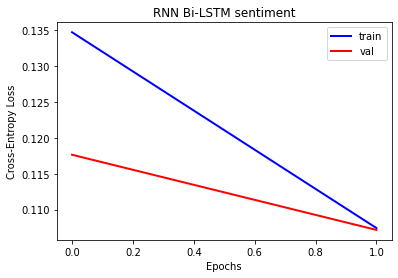

In [ ]:
plt.figure()
plt.plot(ft_rnn_bilstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(ft_rnn_bilstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

4. RNN (with GRU)

In [ ]:
ft_rnn_gru_own = Sequential() #groups a linear stack of layers
ft_rnn_gru_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
ft_rnn_gru_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
ft_rnn_gru_own.add(GRU(25, return_sequences=True)) #add GRU layer
ft_rnn_gru_own.add(BatchNormalization()) #add normalization layer
ft_rnn_gru_own.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
ft_rnn_gru_own.add(Dropout(0.5))
ft_rnn_gru_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
ft_rnn_gru_own.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

ft_rnn_gru_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

ft_rnn_gru_own.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 300)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 200, 25)           24525     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 25)           100       
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 25)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

In [ ]:
#train the NN
ft_rnn_gru_own_hist = ft_rnn_gru_own.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 415s 92ms/step - loss: 0.1463 - accuracy: 0.9122 - val_loss: 0.1470 - val_accuracy: 0.9835
Epoch 2/2
4488/4488 [==============================] - 420s 94ms/step - loss: 0.1307 - accuracy: 0.9870 - val_loss: 0.1227 - val_accuracy: 0.9828


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_rnn_gru_own, ft_test_auc_rnn_gru_own = ft_rnn_gru_own.evaluate(test_data, y_test, batch_size=32) #use the evaluate method to get test loss and test accuracy of the model. 
print('Test Loss:    ', ft_test_loss_rnn_gru_own)
print('Test Accuracy:', ft_test_auc_rnn_gru_own)

2000/2000 [==============================] - 44s 22ms/step - loss: 0.1282 - accuracy: 0.9854
Test Loss:     0.12820401787757874
Test Accuracy: 0.9853543639183044


In [ ]:
y_pred = ft_rnn_gru_own.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.1335600077828151
Hamming loss: 3.405337251346817
F1 score: 0.2543133307614347
---


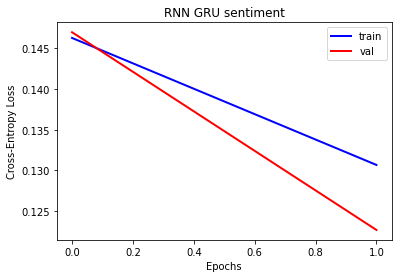

In [ ]:
plt.figure()
plt.plot(ft_rnn_gru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(ft_rnn_gru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs) - 34m 19s
ft_rnn_gru_own_hist = ft_rnn_gru_own.fit(train_data, y_train, batch_size=20, epochs=3, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/3
7181/7181 [==============================] - 687s 95ms/step - loss: 0.1439 - accuracy: 0.9361 - val_loss: 0.1341 - val_accuracy: 0.9940
Epoch 2/3
7181/7181 [==============================] - 685s 95ms/step - loss: 0.1275 - accuracy: 0.9907 - val_loss: 0.1109 - val_accuracy: 0.9938
Epoch 3/3
7181/7181 [==============================] - 686s 96ms/step - loss: 0.1107 - accuracy: 0.9925 - val_loss: 0.1035 - val_accuracy: 0.9853


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
ft_test_loss_rnn_gru_own, ft_test_auc_rnn_gru_own = ft_rnn_gru_own.evaluate(test_data, y_test, batch_size=20)
print('Test Loss:    ', ft_test_loss_rnn_gru_own)
print('Test Accuracy:', ft_test_auc_rnn_gru_own)

3199/3199 [==============================] - 70s 22ms/step - loss: 0.1175 - accuracy: 0.9893
Test Loss:     0.11747830361127853
Test Accuracy: 0.9892932176589966


In [ ]:
y_pred = ft_rnn_gru_own.predict(test_data)
print_score(np.round(y_pred), y_test) 

Jaccard score: 0.23533832220988968
Hamming loss: 3.2974876780559983
F1 score: 0.41415005180272185
---


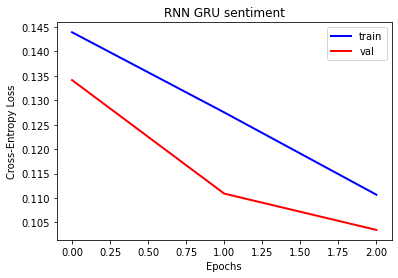

In [ ]:
plt.figure()
plt.plot(ft_rnn_gru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(ft_rnn_gru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

5. RNN (with Bi-GRU)

In [ ]:
ft_rnn_bigru_own = Sequential() #groups a linear stack of layers
ft_rnn_bigru_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
ft_rnn_bigru_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
ft_rnn_bigru_own.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and pass in a GRU layer
ft_rnn_bigru_own.add(BatchNormalization()) #add normalization layer
ft_rnn_bigru_own.add(GlobalMaxPool1D()) #add pooling layer - see below
ft_rnn_bigru_own.add(Dropout(0.5))
ft_rnn_bigru_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
ft_rnn_bigru_own.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]

ft_rnn_bigru_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

ft_rnn_bigru_own.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 200, 300)          40922400  
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 200, 300)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200, 50)           49050     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 50)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)               

In [ ]:
#model training - these also happen to be the optimal hyperparameters for this NN. 
ft_rnn_bigru_own_hist = ft_rnn_bigru_own.fit(train_data, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 539s 119ms/step - loss: 0.1339 - accuracy: 0.9074 - val_loss: 0.1088 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 535s 119ms/step - loss: 0.1099 - accuracy: 0.9912 - val_loss: 0.1057 - val_accuracy: 0.9940


In [ ]:
y_test = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
ft_test_loss_rnn_bigru_own, ft_test_auc_rnn_bigru_own = ft_rnn_bigru_own.evaluate(test_data, y_test, batch_size=32) #use the evaluate method to get the test loss and test accuracy
print('Test Loss:    ', ft_test_loss_rnn_bigru_own)
print('Test Accuracy:', ft_test_auc_rnn_bigru_own)

2000/2000 [==============================] - 65s 32ms/step - loss: 0.1238 - accuracy: 0.9975
Test Loss:     0.12384023517370224
Test Accuracy: 0.9975460171699524


In [ ]:
y_pred = ft_rnn_bigru_own.predict(test_data)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.21172790688154217
Hamming loss: 3.6158262736148883
F1 score: 0.3768805636332263
---


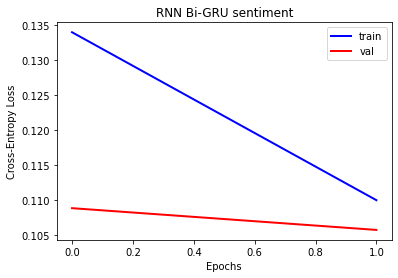

In [ ]:
plt.figure()
plt.plot(ft_rnn_bigru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(ft_rnn_bigru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

#GloVe Alternate Embeddings


As gloVe did not include an inbuilt own data-embedding generating mechanism, I used an alternative. For words not in pretrained -  from all the words that exist from our dataset and in pretrained, we take the mean and std dev, and find a value to use randomly from a set normal distribution.

Pre-processing

In [ ]:
!kaggle datasets download -d takuok/glove840b300dtxt --force #from https://www.kaggle.com/takuok/glove840b300dtxt, via the kaggle API method

100% 2.08G/2.08G [00:21<00:00, 135MB/s]
100% 2.08G/2.08G [00:21<00:00, 102MB/s]


In [ ]:
!unzip glove840b300dtxt.zip

Archive:  glove840b300dtxt.zip
  inflating: glove.840B.300d.txt     


In [ ]:
glove = open('glove.840B.300d.txt') #reading from pre-trained embeddings
glove

<_io.TextIOWrapper name='glove.840B.300d.txt' mode='r' encoding='UTF-8'>

In [ ]:
glove_df=df_cleaned #get a copy of the clean dataset

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence

In [ ]:
tokenizer = Tokenizer(num_words=20000)
X_train=glove_df["comment_text"].values #tokenizing the data
X_test=tester["comment_text"].values

tokenizer.fit_on_texts(list(X_train)) #update internal vocab based on a list of texts

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train) #text to sequence of ints
X_test  = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=200) #pads sequence to desired length with 0s at the start
X_test  = sequence.pad_sequences(X_test,  maxlen=200)

In [ ]:
embeddings_index = dict() #creating a dictionary - changeable, unordered and indexed
for line in glove: #for each line in the embeddings available
	values = line.split(' ') #split the line by spaces
	word = values[0] #first in a line is the word
	coefs = np.asarray(values[1:], dtype='float32') #embeddings for the word
	embeddings_index[word] = coefs #store neatly in an array for each word
glove.close()

In [ ]:
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 2196017 word vectors.


In [ ]:
all_embs = np.stack(list(embeddings_index.values())) #joins a seq of arrays along an axis

In [ ]:
nb_words = len(tokenizer.word_index) #number of words

In [ ]:
emb_mean,emb_std = all_embs.mean(), all_embs.std() #getting mean and std deviation of the embeddings

In [ ]:
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words,300)) #draws random samples from a normal/gaussian distribution
#params: mean/centre of distribution, std dev/width of distr (non neg), size of distr (number of words in vocab x embedding size)
#basically - make a matrix with random embeddings centered around dist, fill with values if they exist in pre-trained. 

In [ ]:
embeddedCount = 0
for word, i in tokenizer.word_index.items():
    i-=1
 #we see if this word is in glove's dictionary, if yes, get the corresponding weights. Else, leave as is with the random
    embedding_vector = embeddings_index.get(word)
#and store inside the embedding matrix that we will train later on.
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector
        embeddedCount+=1
print('total embedded:',embeddedCount,'common words')

total embedded: 55077 common words


In [ ]:
embedding_matrix.shape 

(136407, 300)

Models

In [ ]:
#common -------- run before any of the GloVe Models below
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import matplotlib.pyplot as plt
import gensim.models.keyedvectors as word2vec

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test):
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---") 

In [ ]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = df_cleaned[list_classes].values #y_train

#end of common -------

1. CNN

In [ ]:
inp = Input(shape=(200, )) #entry point to a network
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp) #add our embedding matrix
x = Conv1D(64, 7, activation='relu', padding='same')(x) #convolutional layer that looks over the area for the distinct features we train it to looks for
x = MaxPooling1D(2)(x) #explained below
x = Conv1D(filters=64, kernel_size=4, padding='same', activation='relu')(x) #add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
x = Dropout(0.1)(x) #randomly drops 10% of nodes to help prevent overfitting
x = Dense(50, activation="relu")(x) #densely connected NN layer
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x) #for the 6 output classes
glove_cnn_own = Model(inputs=inp, outputs=x)
glove_cnn_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
glove_cnn_own.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 300)          40922100  
                                                                 
 conv1d (Conv1D)             (None, 200, 64)           134464    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           16448     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                          

In [ ]:
batch_size = 32 # model training - 10m 53s
epochs = 2
glove_cnn_own_hist = glove_cnn_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/2
4488/4488 [==============================] - 325s 72ms/step - loss: 0.0876 - accuracy: 0.9258 - val_loss: 0.0736 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 328s 73ms/step - loss: 0.0620 - accuracy: 0.9941 - val_loss: 0.0681 - val_accuracy: 0.9939


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
glove_test_loss_cnn_own, glove_test_auc_cnn_own = glove_cnn_own.evaluate(X_test, y_test, batch_size=32) #evaluate method to obtain test loss and test accuracy
print('Test Loss:    ', glove_test_loss_cnn_own)
print('Test Accuracy:', glove_test_auc_cnn_own)

2000/2000 [==============================] - 47s 23ms/step - loss: 0.0840 - accuracy: 0.9976
Test Loss:     0.08401861041784286
Test Accuracy: 0.9975773096084595


In [ ]:
y_pred = glove_cnn_own.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4097058415608416
Hamming loss: 2.973417945752186
F1 score: 0.6074683449576072
---


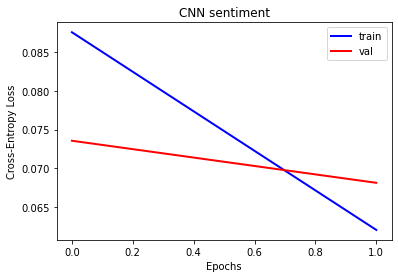

In [ ]:
plt.figure()
plt.plot(glove_cnn_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_cnn_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#optimal hyperparameters (batch size and epochs)
batch_size = 20 #10m 32s
epochs = 2
glove_cnn_own_hist = glove_cnn_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/2
7181/7181 [==============================] - 319s 44ms/step - loss: 0.0870 - accuracy: 0.9614 - val_loss: 0.0725 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 314s 44ms/step - loss: 0.0648 - accuracy: 0.9941 - val_loss: 0.0689 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
glove_test_loss_cnn_own, glove_test_auc_cnn_own = glove_cnn_own.evaluate(X_test, y_test, batch_size=20)
print('Test Loss:    ', glove_test_loss_cnn_own)
print('Test Accuracy:', glove_test_auc_cnn_own)

3199/3199 [==============================] - 48s 15ms/step - loss: 0.0835 - accuracy: 0.9976
Test Loss:     0.08346643298864365
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_cnn_own.predict(X_test)
print_score(np.round(y_pred), y_test)  #jaccard score slightly went down, maybe due to the limited grid used in gridsearch, we would need more computational power

Jaccard score: 0.4076527107154177
Hamming loss: 2.856450654912626
F1 score: 0.6098230889535934
---


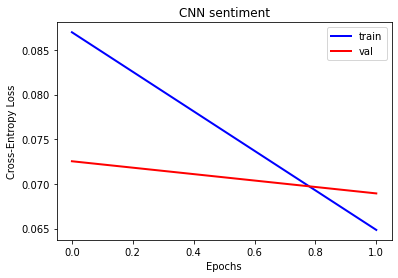

In [ ]:
plt.figure()
plt.plot(glove_cnn_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_cnn_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

2. RNN (LSTM)

In [ ]:
inp = Input(shape=(200, )) #entry point to a network
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
x = LSTM(25, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(x)
x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
x = Dropout(0.1)(x) #randomly drops 10% of nodes to help prevent overfitting
x = Dense(50, activation="relu")(x) #densely connected NN layer
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x) #for the 6 output classes
glove_rnn_lstm_own = Model(inputs=inp, outputs=x)
glove_rnn_lstm_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
glove_rnn_lstm_own.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 300)          40922100  
                                                                 
 lstm_1 (LSTM)               (None, 200, 25)           32600     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                1300      
                                                           

In [ ]:
batch_size = 32 #model training - 32m 19s
epochs = 2
glove_rnn_lstm_own_hist = glove_rnn_lstm_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/2
4488/4488 [==============================] - 968s 215ms/step - loss: 0.0936 - accuracy: 0.9602 - val_loss: 0.0692 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 966s 215ms/step - loss: 0.0646 - accuracy: 0.9942 - val_loss: 0.0623 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
glove_test_loss_rnn_lstm_own, glove_test_auc_rnn_lstm_own = glove_rnn_lstm_own.evaluate(X_test, y_test, batch_size=32) #evaluate method for test loss and test accuracy
print('Test Loss:    ', glove_test_loss_rnn_lstm_own)
print('Test Accuracy:', glove_test_auc_rnn_lstm_own)

2000/2000 [==============================] - 69s 34ms/step - loss: 0.0809 - accuracy: 0.9976
Test Loss:     0.08088672906160355
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_lstm_own.predict(X_test)
print_score(np.round(y_pred), y_test) 

Jaccard score: 0.42057772939755994
Hamming loss: 3.007023247574687
F1 score: 0.6238420796642145
---


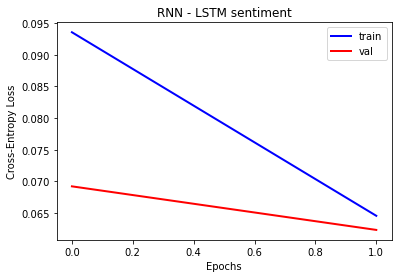

In [ ]:
plt.figure()
plt.plot(glove_rnn_lstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_lstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN - LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs)
batch_size = 20 #46m 31s
epochs = 2
glove_rnn_lstm_own_hist = glove_rnn_lstm_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/2
7181/7181 [==============================] - 1395s 194ms/step - loss: 0.0842 - accuracy: 0.9702 - val_loss: 0.0657 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 1397s 195ms/step - loss: 0.0616 - accuracy: 0.9942 - val_loss: 0.0595 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
glove_test_loss_rnn_lstm_own, glove_test_auc_rnn_lstm_own = glove_rnn_lstm_own.evaluate(X_test, y_test, batch_size=20)
print('Test Loss:    ', glove_test_loss_rnn_lstm_own)
print('Test Accuracy:', glove_test_auc_rnn_lstm_own)

3199/3199 [==============================] - 93s 29ms/step - loss: 0.0781 - accuracy: 0.9976
Test Loss:     0.07810477167367935
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_lstm_own.predict(X_test)
print_score(np.round(y_pred), y_test) #worse hamming because of small grid in gridsearch, we need more computational power

Jaccard score: 0.42720462744190313
Hamming loss: 3.018746027280211
F1 score: 0.6360605283997605
---


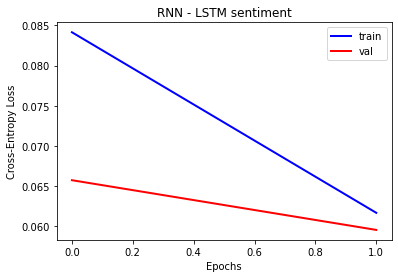

In [ ]:
plt.figure()
plt.plot(glove_rnn_lstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_lstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN - LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

3. RNN (Bi-LSTM)

In [ ]:
inp = Input(shape=(200, )) #entry point to a network
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
x = Bidirectional(LSTM(25, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
x = Dropout(0.1)(x) #randomly drops 10% of nodes to help prevent overfitting
x = Dense(50, activation="relu")(x) #densely connected NN layer
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x) #for the 6 output classes
glove_rnn_bilstm_own = Model(inputs=inp, outputs=x)
glove_rnn_bilstm_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
glove_rnn_bilstm_own.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 300)          40922100  
                                                                 
 bidirectional (Bidirectiona  (None, 200, 50)          65200     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 50)                2550  

In [ ]:
batch_size = 32 #model training - 55m 29s
epochs = 2
glove_rnn_bilstm_own_hist = glove_rnn_bilstm_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) #trains for 1.5 hour

Epoch 1/2
4488/4488 [==============================] - 1657s 369ms/step - loss: 0.0575 - accuracy: 0.9941 - val_loss: 0.0575 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [ ]:
glove_test_loss_rnn_bilstm_own, glove_test_auc_rnn_bilstm_own = glove_rnn_bilstm_own.evaluate(X_test, y_test, batch_size=32) #using the evaluate method to get test loss and test accuracy
print('Test Loss:    ', glove_test_loss_rnn_bilstm_own)
print('Test Accuracy:', glove_test_auc_rnn_bilstm_own)

2000/2000 [==============================] - 110s 55ms/step - loss: 0.0725 - accuracy: 0.9976
Test Loss:     0.07253427058458328
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_bilstm_own.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test) 

Jaccard score: 0.4438913667040429
Hamming loss: 2.797576250169329
F1 score: 0.6507678705909715
---


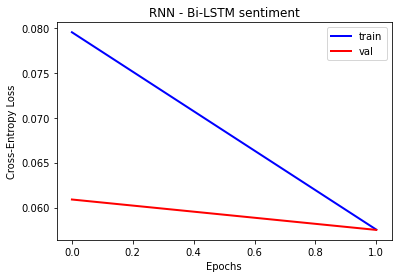

In [ ]:
plt.figure()
plt.plot(glove_rnn_bilstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_bilstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN - Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal parameters (batch size and epochs): #1h 53m 31s
batch_size = 20
epochs = 3
glove_rnn_bilstm_own_hist = glove_rnn_bilstm_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
7181/7181 [==============================] - 2260s 314ms/step - loss: 0.0771 - accuracy: 0.9627 - val_loss: 0.0628 - val_accuracy: 0.9940
Epoch 2/3
7181/7181 [==============================] - 2263s 315ms/step - loss: 0.0566 - accuracy: 0.9940 - val_loss: 0.0572 - val_accuracy: 0.9940
Epoch 3/3
7181/7181 [==============================] - 2289s 319ms/step - loss: 0.0524 - accuracy: 0.9940 - val_loss: 0.0547 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
glove_test_loss_rnn_bilstm_own, glove_test_auc_rnn_bilstm_own = glove_rnn_bilstm_own.evaluate(X_test, y_test, batch_size=20)
print('Test Loss:    ', glove_test_loss_rnn_bilstm_own)
print('Test Accuracy:', glove_test_auc_rnn_bilstm_own)

3199/3199 [==============================] - 137s 43ms/step - loss: 0.0692 - accuracy: 0.9976
Test Loss:     0.06915131211280823
Test Accuracy: 0.9975616335868835


In [ ]:
y_pred = glove_rnn_bilstm_own.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.45659958753657937
Hamming loss: 2.669667698271281
F1 score: 0.66110402174105
---


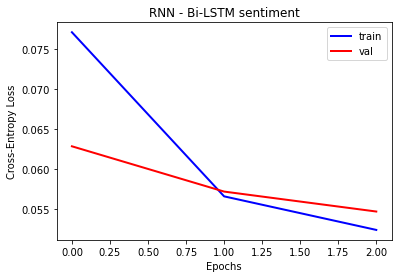

In [ ]:
plt.figure()
plt.plot(glove_rnn_bilstm_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_bilstm_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN - Bi-LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

4. RNN (GRU)

In [ ]:
inp = Input(shape=(200, )) #entry point to a network
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
x = GRU(25, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(x)
x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
x = Dropout(0.1)(x) #randomly drops 10% of nodes to help prevent overfitting
x = Dense(50, activation="relu")(x) #densely connected NN layer
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x) #for the 6 output classes
glove_rnn_gru_own = Model(inputs=inp, outputs=x)
glove_rnn_gru_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
glove_rnn_gru_own.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 200, 300)          40922100  
                                                                 
 gru (GRU)                   (None, 200, 25)           24525     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_6 (Dropout)         (None, 25)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                1300      
                                                           

In [ ]:
batch_size = 32 #model training - 30m 26s
epochs = 2
glove_rnn_gru_own_hist = glove_rnn_gru_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/2
4488/4488 [==============================] - 901s 200ms/step - loss: 0.0892 - accuracy: 0.9459 - val_loss: 0.0702 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 900s 200ms/step - loss: 0.0646 - accuracy: 0.9942 - val_loss: 0.0657 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
glove_test_loss_rnn_gru_own, glove_test_auc_rnn_gru_own = glove_rnn_gru_own.evaluate(X_test, y_test, batch_size=32) #use the evaluate method to get test loss and test accuracy
print('Test Loss:    ', glove_test_loss_rnn_gru_own)
print('Test Accuracy:', glove_test_auc_rnn_gru_own)

2000/2000 [==============================] - 64s 32ms/step - loss: 0.0758 - accuracy: 0.9976
Test Loss:     0.07583249360322952
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_gru_own.predict(X_test)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.41297286863384686
Hamming loss: 2.8059124490710348
F1 score: 0.6209022827467126
---


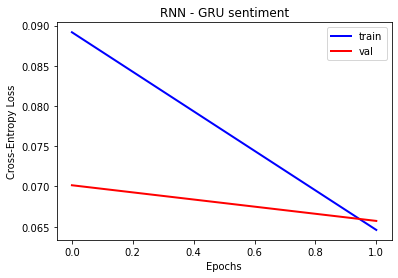

In [ ]:
plt.figure()
plt.plot(glove_rnn_gru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_gru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN - GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs)
batch_size = 20 #22m
epochs = 2
glove_rnn_gru_own_hist = glove_rnn_gru_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/2
7181/7181 [==============================] - 1306s 181ms/step - loss: 0.0831 - accuracy: 0.9637 - val_loss: 0.0690 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 1288s 179ms/step - loss: 0.0647 - accuracy: 0.9940 - val_loss: 0.0630 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
glove_test_loss_rnn_gru_own, glove_test_auc_rnn_gru_own = glove_rnn_gru_own.evaluate(X_test, y_test, batch_size=20)
print('Test Loss:    ', glove_test_loss_rnn_gru_own)
print('Test Accuracy:', glove_test_auc_rnn_gru_own)

3199/3199 [==============================] - 107s 33ms/step - loss: 0.0899 - accuracy: 0.9976
Test Loss:     0.08987877517938614
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_gru_own.predict(X_test)
print_score(np.round(y_pred), y_test) #worse f1 and hamming loss, due to the small grid in gridsearch

Jaccard score: 0.4144435686686937
Hamming loss: 3.3495889211916596
F1 score: 0.6144188866803073
---


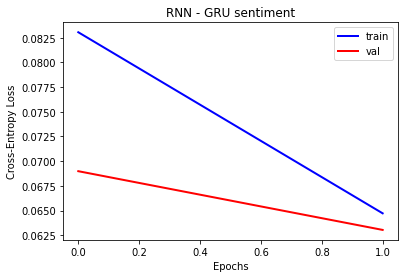

In [ ]:
plt.figure()
plt.plot(glove_rnn_gru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_gru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN - GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

5. RNN (Bi-GRU)

In [ ]:
inp = Input(shape=(200, )) #entry point to a network
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
x = Bidirectional(GRU(25, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
x = Dropout(0.1)(x) #randomly drops 10% of nodes to help prevent overfitting
x = Dense(50, activation="relu")(x) #densely connected NN layer
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x) #for the 6 output classes
glove_rnn_bigru_own = Model(inputs=inp, outputs=x)
glove_rnn_bigru_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
glove_rnn_bigru_own.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 300)          40922100  
                                                                 
 bidirectional (Bidirectiona  (None, 200, 50)          49050     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 50)                2550  

In [ ]:
batch_size = 32 #model training - 48m 25s
epochs = 2
glove_rnn_bigru_own_hist = glove_rnn_bigru_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/2
4488/4488 [==============================] - 1455s 323ms/step - loss: 0.0817 - accuracy: 0.9532 - val_loss: 0.0626 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 1450s 323ms/step - loss: 0.0586 - accuracy: 0.9941 - val_loss: 0.0585 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
glove_test_loss_rnn_bigru_own, glove_test_auc_rnn_bigru_own = glove_rnn_bigru_own.evaluate(X_test, y_test, batch_size=32) #use the evaluate method to get test loss and test accuracy
print('Test Loss:    ', glove_test_loss_rnn_bigru_own)
print('Test Accuracy:', glove_test_auc_rnn_bigru_own)

2000/2000 [==============================] - 94s 47ms/step - loss: 0.0739 - accuracy: 0.9976
Test Loss:     0.07393578439950943
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_bigru_own.predict(X_test)
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4483579867532298
Hamming loss: 2.852022049246095
F1 score: 0.6477293717934044
---


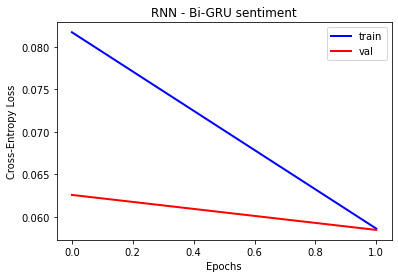

In [ ]:
plt.figure()
plt.plot(glove_rnn_bigru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_bigru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN - Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#with optimal hyperparameters (batch size and epochs)
batch_size = 20 #1h 9m 30s
epochs = 2
glove_rnn_bigru_own_hist = glove_rnn_bigru_own.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

Epoch 1/2
7181/7181 [==============================] - 2072s 288ms/step - loss: 0.0758 - accuracy: 0.9625 - val_loss: 0.0619 - val_accuracy: 0.9940
Epoch 2/2
7181/7181 [==============================] - 2084s 290ms/step - loss: 0.0574 - accuracy: 0.9940 - val_loss: 0.0575 - val_accuracy: 0.9940


In [ ]:
y_test=tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
glove_test_loss_rnn_bigru_own, glove_test_auc_rnn_bigru_own = glove_rnn_bigru_own.evaluate(X_test, y_test, batch_size=20)
print('Test Loss:    ', glove_test_loss_rnn_bigru_own)
print('Test Accuracy:', glove_test_auc_rnn_bigru_own)

3199/3199 [==============================] - 147s 46ms/step - loss: 0.0709 - accuracy: 0.9976
Test Loss:     0.07094539701938629
Test Accuracy: 0.9976085424423218


In [ ]:
y_pred = glove_rnn_bigru_own.predict(X_test)
print_score(np.round(y_pred), y_test) 

Jaccard score: 0.4545333056879555
Hamming loss: 2.6665416236831407
F1 score: 0.6564822513927834
---


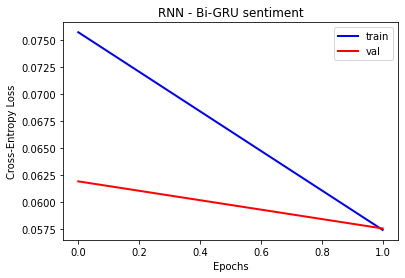

In [ ]:
plt.figure()
plt.plot(glove_rnn_bigru_own_hist.history['loss'], lw=2.0, color='b', label='train') #cost function for training data - blue line
plt.plot(glove_rnn_bigru_own_hist.history['val_loss'], lw=2.0, color='r', label='val') #cost function for testing data - red line
plt.title('RNN - Bi-GRU sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

#Comparisons: Alt & Own Embeddings




In [ ]:
# concat all training, validation and testing accuracy scores 
accuracy_ft_cnn_own = ['FastText CNN (data-specific)', #model name
               np.mean(ft_cnn_own_hist.history['acc']), #model accuracy statistics - training, validation and test accuracies
               np.mean(ft_cnn_own_hist.history['val_acc']), 
               ft_test_auc_cnn]

accuracy_ft_lstm_own = ['FastText RNN - LSTM (data-specific)', 
               np.mean(ft_rnn_lstm_own_hist.history['accuracy']), 
               np.mean(ft_rnn_lstm_own_hist.history['val_accuracy']), 
               ft_test_auc_rnn_lstm_own]

accuracy_ft_bilstm_own = ['FastText RNN - Bi-LSTM (data-specific)', 
                np.mean(ft_rnn_bilstm_own_hist.history['accuracy']), 
                np.mean(ft_rnn_bilstm_own_hist.history['val_accuracy']), 
                ft_test_auc_rnn_bilstm_own]

accuracy_ft_gru_own = ['FastText RNN - GRU (data-specific)', 
                np.mean(ft_rnn_gru_own_hist.history['accuracy']), 
                np.mean(ft_rnn_gru_own_hist.history['val_accuracy']), 
                ft_test_auc_rnn_gru_own]

accuracy_ft_bigru_own = ['FastText RNN- Bi-GRU (data-specific)', 
                np.mean(ft_rnn_bigru_own_hist.history['accuracy']), 
                np.mean(ft_rnn_bigru_own_hist.history['val_accuracy']), 
                ft_test_auc_rnn_bigru_own]



accuracy_w2v_cnn_own = ['Word2Vec CNN (data-specific)', 
                np.mean(w2v_cnn_own_hist.history['acc']), 
                np.mean(w2v_cnn_own_hist.history['val_acc']), 
                w2v_test_auc_cnn]

accuracy_w2v_lstm_own = ['Word2Vec RNN - LSTM (data-specific)',
                np.mean(w2v_rnn_lstm_own_hist.history['accuracy']), 
                np.mean(w2v_rnn_lstm_own_hist.history['val_accuracy']), 
                w2v_test_auc_rnn_lstm_own]

accuracy_w2v_bilstm_own = ['Word2Vec RNN- Bi-LSTM (data-specific)', 
                  np.mean(w2v_rnn_bilstm_own_hist.history['accuracy']), 
                  np.mean(w2v_rnn_bilstm_own_hist.history['val_accuracy']), 
                  w2v_test_auc_rnn_bilstm_own]

accuracy_w2v_gru_own = ['Word2Vec RNN - GRU (data-specific)', 
                  np.mean(w2v_rnn_gru_own_hist.history['accuracy']), 
                  np.mean(w2v_rnn_gru_own_hist.history['val_accuracy']), 
                  w2v_test_auc_rnn_gru_own]

accuracy_w2v_bigru_own = ['Word2Vec RNN - Bi-GRU (data-specific)', 
                  np.mean(w2v_rnn_bigru_own_hist.history['accuracy']), 
                  np.mean(w2v_rnn_bigru_own_hist.history['val_accuracy']), 
                  w2v_test_auc_rnn_bigru_own]


accuracy_glove_bilstm_own= ['Glove RNN - Bi-LSTM (data-specific)', 
                    np.mean(glove_rnn_bilstm_own_hist.history['accuracy']), 
                    np.mean(glove_rnn_bilstm_own_hist.history['val_accuracy']), 
                     glove_test_auc_rnn_bilstm_own]

# create dataframe
comparison_summary_own = pd.DataFrame([accuracy_ft_cnn_own])
# append all other scores
comparison_summary_own = comparison_summary_own.append([accuracy_ft_lstm_own, accuracy_ft_bilstm_own, accuracy_ft_gru_own, accuracy_ft_bigru_own, accuracy_w2v_cnn_own, accuracy_w2v_lstm_own,accuracy_w2v_bilstm_own, accuracy_w2v_gru_own, accuracy_w2v_bigru_own, accuracy_glove_bilstm_own])


In [ ]:
# beautify the new dataframe
comparison_summary_own.columns = ['Algorithm', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
comparison_summary_own.set_index(['Algorithm'], inplace=True)
comparison_summary_own

,Training Accuracy,Validation Accuracy,Testing Accuracy
Algorithm,,,
FastText CNN (own),0.970518,0.993984,0.997609
FastText RNN - LSTM (own),0.946934,0.993828,0.997296
FastText RNN - Bi-LSTM (own),0.943390,0.985963,0.997609
FastText RNN - GRU (own),0.949618,0.983143,0.985354
FastText RNN- Bi-GRU (own),0.949315,0.993984,0.997546
Word2Vec CNN (own),0.982916,0.993702,0.997609
Word2Vec RNN - LSTM (own),0.966211,0.993922,0.997609
Word2Vec RNN- Bi-LSTM (own),0.958353,0.993796,0.997609
Word2Vec RNN - GRU (own),0.961762,0.993984,0.997593


#Comment Tester

This section helps present a neater output for the results we obtain, abstracting all the nitty gritty details.

In [ ]:
COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'] #output classes - 34 min

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score

def print_score(y_pred, clf): #to print the metrics in an organized format
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---")  


from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [ ]:
#classic models [Tf-idf + SVC Classifier]
def classify_string(string, investigate=False): #method to classify
    prediction = clf.predict(tfidf_svc.transform([string]))[0] #using the predict method to obtain a prediction [an array with 1/0 for our 6 output classes]
    print(prediction)
    df=pd.DataFrame({'classes': COLUMNS, 'T/F':prediction}) #helps print results in a dataframe format
    print(df)


svc = LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='hinge', max_iter=100,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0) #defining the model - this specific one was chosen for its superior performance


clf = OneVsRestClassifier(svc) #one vs rest classifier for the 6 output classes
clf.fit(x_tfidf_g2, y_train) #fitting the model
y_pred = clf.predict(x_tfidf_test_g2) #making a sample test prediction

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [ ]:
comment= "hi, how are you" #testing with a clean sentence
classify_string(comment)

[0 0 0 0 0 0]
         classes  T/F
0          toxic    0
1   severe_toxic    0
2        obscene    0
3         threat    0
4         insult    0
5  identity_hate    0


In [ ]:
comment= "trump supporters suck"
classify_string(comment)

[1 0 1 0 1 0]
         classes  T/F
0          toxic    1
1   severe_toxic    0
2        obscene    1
3         threat    0
4         insult    1
5  identity_hate    0


In [ ]:
comment= "please go die"
classify_string(comment) #should also be threat - area to improve

[1 0 0 0 0 0]
         classes  T/F
0          toxic    1
1   severe_toxic    0
2        obscene    0
3         threat    0
4         insult    0
5  identity_hate    0


With a Deep Learning Model,

In [ ]:
#run glove preprocessing before this.

In [ ]:
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test):
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---")   

max_features=20000  #number of unique words we want to use (or: number of rows in incoming embedding vector)
max_len=200 #max number of words in a comment to use (or: number of columns in incoming embedding vector)
embedding_dims=128#dimension of the embedding variable (or: number of rows in output of embedding vector)
embed_dim=300 #length of each embedding


In [ ]:
glove_rnn_bigru = Sequential() #groups a linear stack of layers
glove_rnn_bigru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
glove_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
glove_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and add GRU layer
glove_rnn_bigru.add(BatchNormalization()) #add normalization layer
glove_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer - see below comment
glove_rnn_bigru.add(Dropout(0.5))
glove_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
glove_rnn_bigru.add(Dense(6, activation='sigmoid'))

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
glove_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

glove_rnn_bigru.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 300)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200, 50)          49050     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 200, 50)          200       
 ormalization)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                       

In [ ]:
glove_rnn_bigru_hist = glove_rnn_bigru.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list) #model training - 20m 26s

Epoch 1/2
4488/4488 [==============================] - 582s 130ms/step - loss: 0.0583 - accuracy: 0.9922 - val_loss: 0.0555 - val_accuracy: 0.9939


In [ ]:
sentence="hi hello"
sentence2="i'll delete your shit"
sentences=pd.DataFrame([sentence], columns=["comments"]) #putting sample sentences in a dataframe
sentences=sentences.append({'comments': sentence2},ignore_index=True)
sentences

,comments
0,hi hello
1,i'll delete your shit


In [ ]:
X_test  = tokenizer.texts_to_sequences(sentences["comments"]) #converting text to a series of ints based on dict values
#it excludes world not in dict defined by train altogether. See https://stackoverflow.com/questions/54891464/is-it-better-to-keras-fit-to-text-on-the-entire-x-data-or-just-the-train-data first answer
X_test  = sequence.pad_sequences(X_test,  maxlen=200) #padding sequences with zeros
y_pred = glove_rnn_bigru.predict(X_test) #predicting
submission_df=pd.DataFrame(y_pred, columns=COLUMNS) #printing as a df for interpretability
submission_df #more accurate unrounded probabilities

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.026242,0.000306,0.002319,0.000361,0.004016,0.000669
1,0.994799,0.328673,0.951836,0.025297,0.856623,0.105763


In [ ]:
#with rounding
X_test  = tokenizer.texts_to_sequences(sentences["comments"]) #converting text to a seq of ints
X_test  = sequence.pad_sequences(X_test,  maxlen=200) #padding sequences with zeros
y_pred = glove_rnn_bigru.predict(X_test) #predicting
y_pred = np.where(y_pred >= 0.5, 1.0, 0.0)
submission_df=pd.DataFrame((y_pred), columns=COLUMNS) #printing as a df for interpretability
submission_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0


#Hyperparameter tuning, ML models

We use Pipelines to accomodate the OneVsRest approach as well as the classifier.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline #obtaining necessary imports

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y_matrix, test_size = 0.2, random_state = 0) #run tf-idf pre-processing before this, split the data

SGD Classifier

In [ ]:
pipeline = Pipeline([ #9 m 5 s - GridSearchCV
    ('clf', OneVsRestClassifier(SGDClassifier())),
])
parameters = {
    'clf__estimator__penalty': ['l2', 'l1'], #regularization term to be used, l2 default and standard for linear SVM
     'clf__estimator__max_iter': [100, 500], #max number of passes over the training data (epochs). 1000 default
     'clf__estimator__loss': ['hinge', 'log'] #loss function to be used. Hinge, default gives linear SVM. Log gives logistic regression. 
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3) #cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  5.7min
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:  8.5min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=500, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=None))]


In [ ]:
pipeline = Pipeline([ #8 m 55 s - RandomizedSearchCV
    ('clf', OneVsRestClassifier(SGDClassifier())),
])
parameters = {
  'clf__estimator__penalty': ['l2', 'l1'], #regularization term to be used, l2 default and standard for linear SVM
     'clf__estimator__max_iter': [100, 500], #max number of passes over the training data (epochs). 1000 default
     'clf__estimator__loss': ['hinge', 'log'] #loss function to be used. Hinge, default gives linear SVM. Log gives logistic regression. 
}

random_search_tune = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
random_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(random_search_tune.best_estimator_.steps)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  5.6min
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:  8.5min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=500, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=None))]


Overall, same worked best. l1 (which tries to shrink coefficients to 0 and hence do feature selection) and log loss (better probability estimations, due to well behaved probabilistic outputs), and 500 max iterations. [no real way to predict optimal number of iterations, iterate till the errors does not significantly decrease when tuning.]



Multinomial Naive Bayes

In [ ]:
pipeline = Pipeline([ #1 min 44 s - GridSearchCV
    ('clf', OneVsRestClassifier(MultinomialNB())),
])
parameters = {
    'clf__estimator__alpha': [0,1], #additive smoothing parameter (0 for no smoothing, 1 default) [laplace/lidstone/additive - for categorical data]
'clf__estimator__fit_prior': ('True', 'False') #whether to learn class prior probabilities or not [boolean, true default]. for false, uniform prior used
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.7min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=1, class_prior=None,
                                            fit_prior='True'),
                    n_jobs=None))]


In [ ]:
pipeline = Pipeline([ #1 m 43 s - RandomizedSearchCV
    ('clf', OneVsRestClassifier(MultinomialNB())),
])
parameters = {
    'clf__estimator__alpha': [0,1], #additive smoothing parameter (0 for no smoothing, 1 default) [laplace/lidstone/additive - for categorical data]
'clf__estimator__fit_prior': ('True', 'False') #whether to learn class prior probabilities or not [boolean, true default]. for false, uniform prior used
}

random_search_tune = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
random_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(random_search_tune.best_estimator_.steps)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:  1.7min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=1, class_prior=None,
                                            fit_prior='True'),
                    n_jobs=None))]


Both gave same best -  smoothing, as alpha is 1 (maybe because of 0 probabilities) and class prior probabilities (probability of an event before new data is collected) are to be learned. 

Linear SVC

In [ ]:
pipeline = Pipeline([ #27 m 42 s - GridSearchCV
    ('clf', OneVsRestClassifier(LinearSVC())),
])
parameters = {
    'clf__estimator__penalty': ['l2', 'l1'], #norm used for regularization. l2 default
     'clf__estimator__max_iter': [100, 500], #max number of passes over the training data (epochs). 1000 default
     'clf__estimator__loss': ['hinge', 'log'], #loss function, hinge standard SVM loss, default squared_hinge (not here)
     'clf__estimator__multi_class': ['ovr', 'crammer_singer'] #ovr trains onevsrest classifiers, the other optimises a joint objective over all classes. default ovr. c_s good in theory but expensive to compute in practice. 

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  8.3min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed: 27.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

Best parameters set:
[('clf', OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='hinge', max_iter=100,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None))]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
pipeline = Pipeline([ #19 m 50s - RandomizedSearchCV
    ('clf', OneVsRestClassifier(LinearSVC())),
])
parameters = {
    'clf__estimator__penalty': ['l2', 'l1'], #norm used for regularization. l2 default
     'clf__estimator__max_iter': [100, 500], #max number of passes over the training data (epochs). 1000 default
     'clf__estimator__loss': ['hinge', 'log'], #loss function, hinge standard SVM loss, default squared_hinge (not here)
     'clf__estimator__multi_class': ['ovr', 'crammer_singer'] #ovr trains onevsrest classifiers, the other optimises a joint objective over all classes. default ovr. c_s good in theory but expensive to compute in practice. 

}

random_search_tune = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
random_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(random_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  9.3min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 19.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

Best parameters set:
[('clf', OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='hinge', max_iter=100,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None))]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Both predictions match. So, we use l2 normalisation (shrinks coefficients equally - good for collinear and codependent features), hinge loss (good for max margin like SVMs), OneVsRest and 100 iterations.


Perceptron

In [ ]:
pipeline = Pipeline([ #5 m 49 s - GridSearchCV
    ('clf', OneVsRestClassifier(Perceptron())),
])
parameters = {
    'clf__estimator__penalty': ['l2', 'l1', 'elasticnet'], #regularization/penalty term to be used, default None
     'clf__estimator__max_iter': [100, 500] #max number of passes over training data (epochs) default 1000
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  5.6min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=Perceptron(alpha=0.0001, class_weight=None,
                                         early_stopping=False, eta0=1.0,
                                         fit_intercept=True, max_iter=100,
                                         n_iter_no_change=5, n_jobs=None,
                                         penalty='l2', random_state=0,
                                         shuffle=True, tol=0.001,
                                         validation_fraction=0.1, verbose=0,
                                         warm_start=False),
                    n_jobs=None))]


In [ ]:
pipeline = Pipeline([ #5 m 55 s - RandomizedSearchCV
    ('clf', OneVsRestClassifier(Perceptron())),
])
parameters = {
    'clf__estimator__penalty': ['l2', 'l1', 'elasticnet'], #regularization/penalty term to be used, default None
    'clf__estimator__max_iter': [100, 500] #max number of passes over training data (epochs) default 1000
}

random_search_tune = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
random_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(random_search_tune.best_estimator_.steps)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  5.6min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=Perceptron(alpha=0.0001, class_weight=None,
                                         early_stopping=False, eta0=1.0,
                                         fit_intercept=True, max_iter=100,
                                         n_iter_no_change=5, n_jobs=None,
                                         penalty='l2', random_state=0,
                                         shuffle=True, tol=0.001,
                                         validation_fraction=0.1, verbose=0,
                                         warm_start=False),
                    n_jobs=None))]


Both returned l2 penalty as better (shrinks coefficients equally - good for collinear and codependent features), and the same max number of iterations (100). 


Passive Aggressive Classifier

In [ ]:
pipeline = Pipeline([ #5 m 31s - GridSearchCV
    ('clf', OneVsRestClassifier(PassiveAggressiveClassifier())),
])
parameters = {
    'clf__estimator__max_iter': [100, 500], #max number of passes over training data (epochs) - default 1000
     'clf__estimator__C': [0.5, 1.0, 1.5] #max step size (regularization), default 1.0 - shows how much penalty given for an incorrect prediction
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  5.2min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=PassiveAggressiveClassifier(C=0.5, average=False,
                                                          class_weight=None,
                                                          early_stopping=False,
                                                          fit_intercept=True,
                                                          loss='hinge',
                                                          max_iter=500,
                                                          n_iter_no_change=5,
                                                          n_jobs=None,
                                                          random_state=None,
                                                          shuffle=True,
                                                          tol=0.001,
                                                          validation_fraction=0.1,
                                                          ver

In [ ]:
pipeline = Pipeline([ #5 m 33s - RandomizedSearchCV
    ('clf', OneVsRestClassifier(PassiveAggressiveClassifier())),
])
parameters = {
   'clf__estimator__max_iter': [100, 500], #max number of passes over training data (epochs) - default 1000
     'clf__estimator__C': [0.5, 1.0, 1.5] #max step size (regularization), default 1.0 - shows how much penalty given for an incorrect prediction

}

random_search_tune = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
random_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(random_search_tune.best_estimator_.steps)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  5.2min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=PassiveAggressiveClassifier(C=0.5, average=False,
                                                          class_weight=None,
                                                          early_stopping=False,
                                                          fit_intercept=True,
                                                          loss='hinge',
                                                          max_iter=500,
                                                          n_iter_no_change=5,
                                                          n_jobs=None,
                                                          random_state=None,
                                                          shuffle=True,
                                                          tol=0.001,
                                                          validation_fraction=0.1,
                                                          ver

Same ideal value of C, the penalty (0.5 - do not trust the training data to be a full representative sample and penalize the model heavily for mistakes) and max iterations (500).



Decision Tree

In [ ]:
pipeline = Pipeline([ #1 h 17 mins 17 s - GridSearchCV
    ('clf', OneVsRestClassifier(DecisionTreeClassifier())),
])
parameters = {
    'clf__estimator__criterion': ['gini', 'entropy'], #function to measure quality of a split. Gini impurity (default) and information gain (entropy)
     'clf__estimator__splitter': ['best', 'random'], #Strategy used to choose split. Chooses a best (default) or random split
     'clf__estimator__max_depth': ['None', 50, 100] #max depth of a tree. default None (expanded until all leaves pure or all leaves have less than min_samples_split samples, default 2)

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=3, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 30.9min
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed: 77.3min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=50,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
           

In [ ]:
pipeline = Pipeline([ #59 m 34 s - RandomizedSearchCV
    ('clf', OneVsRestClassifier(DecisionTreeClassifier())),
])
parameters = {
  'clf__estimator__criterion': ['gini', 'entropy'], #function to measure quality of a split. Gini impurity (default) and information gain (entropy)
     'clf__estimator__splitter': ['best', 'random'], #Strategy used to choose split. Chooses a best (default) or random split
     'clf__estimator__max_depth': ['None', 50, 100] #max depth of a tree. default None (expanded until all leaves pure or all leaves have less than min_samples_split samples, default 2)
}

random_search_tune = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=3, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
random_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(random_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 44.6min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 56.8min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=50,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
           

Both gave similar best - gini impurity (CART + gini: good for larger distributions with more value possibilities, also less computationally expensive and hence faster), random splitter (no computational overhead of best, less prone to overfitting) and max depth being 50 (lesser max_depth saves model from overfitting). 


Logistic Regression

In [ ]:
pipeline = Pipeline([ #22 m 25 s - GridSearchCV
    ('clf', OneVsRestClassifier(LogisticRegression())),
])
parameters = {
    'clf__estimator__penalty': ['l1', 'l2', 'none'], #regularization/penalty used, default l2
     'clf__estimator__C': [0.5, 1.0, 1.5] #inverse of regularization strength (max step size?), has to be a +ve float (default 1.0)

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 12.7min
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed: 21.5min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None))]


In [ ]:
pipeline = Pipeline([ #21 m 43 s - RandomizedSearchCV
    ('clf', OneVsRestClassifier(LogisticRegression())),
])
parameters = {
    'clf__estimator__penalty': ['l1', 'l2', 'none'], #regularization/penalty used, default l2
     'clf__estimator__C': [0.5, 1.0, 1.5] #inverse of regularization strength (max step size?), has to be a +ve float (default 1.0)

}

random_search_tune = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
random_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(random_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 12.1min
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed: 20.9min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None))]


Both gave similar results, l2 penalty did the best (good for collinear/codependent features - shrinks coefficients evenly), and best c values was 1.0 (the default - trust the data to an extent, and don't penalize too heavily).



AdaBoost

In [ ]:
pipeline = Pipeline([ #2 h 5 mins 10 s - GridSearchCV
    ('clf', OneVsRestClassifier(AdaBoostClassifier())),
])
parameters = {
    'clf__estimator__n_estimators': [25, 50, 75], #number of estimators at which boosting is terminated. default 50
     'clf__estimator__learning_rate': [0.5, 1.0], #weight applied to each classifier at each boosting iteration. Tradeoff between this and n_estimators (default 1.0)
     'clf__estimator__algorithm': ['SAMME', 'SAMME.R'] #SAMME.R real boosting algorithm vs SAMME discrete boosting algorithm.
     #The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=2, verbose=3)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 75.1min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed: 164.9min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=0.5,
                                                 n_estimators=75,
                                                 random_state=None),
                    n_jobs=None))]


In [ ]:
pipeline = Pipeline([ #2 h 11 m 10 s - RandomizedSearchCV
    ('clf', OneVsRestClassifier(AdaBoostClassifier())),
])
parameters = {
    'clf__estimator__n_estimators': [25, 50, 75], #number of estimators at which boosting is terminated. default 50
     'clf__estimator__learning_rate': [0.5, 1.0], #weight applied to each classifier at each boosting iteration. Tradeoff between this and n_estimators (default 1.0)
     'clf__estimator__algorithm': ['SAMME', 'SAMME.R'] #SAMME.R real boosting algorithm vs SAMME discrete boosting algorithm.
     #The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

}

random_search_tune = RandomizedSearchCV(pipeline, parameters, cv=5, n_jobs=3, verbose=1)#cv determines the cross validation generator. 5-fold cross validation here - 20% used for testing
random_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(random_search_tune.best_estimator_.steps)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 99.3min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 118.2min finished


Best parameters set:
[('clf', OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=0.5,
                                                 n_estimators=75,
                                                 random_state=None),
                    n_jobs=None))]


Both claim SAMME.R worked best (uses real boosting also and typically converges faster). Learning rate was best deemed at 0.5 (shrinks contribution of each classifier by half) and n_estimators at 75 (number of weak learners, doesn't decrease bias much if low - the average number here indicates that it decreases a good amount of bias).

Note: __ used for name mangling - python interpreter helps seperate names and avoid name clashes via the __ in front of a variable or method name. 

#Hyperparameter Tuning, BoW

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.feature_extraction.text import CountVectorizer #importing necessary packages

In [ ]:
x=x['comment_text'] #obtaining comment text from training data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_matrix, test_size = 0.2, random_state = 0) #splitting the data for ease of testing

SGD + BoW

In [ ]:
pipeline = Pipeline([ #46mins
    ('bow', CountVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=500, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False))) #model definition wrapped in a one vs rest classifier, for our 6 output classes
])
parameters = {
    'bow__max_df': (0.25, 0.5, 0.75),
    'bow__min_df': (0.001, 0.005, 0.01),
    'bow__ngram_range': [(1, 1), (1, 2)]

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.01, 0.25, (1,2) - optimal obtained

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 15.2min
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed: 45.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best parameters set:
[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.25, max_features=None, min_df=0.01,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                               

Ignore terms that appear in more than 50% of docs, and less than 1% of docs (will make too sparse). Also use unigrams only (bigrams may make the data more sparse, as each possibility occurs fewer times).

Multinomial NB + BoW

In [ ]:
pipeline = Pipeline([ #2 m 39 s
    ('bow', CountVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=1, class_prior=None,
                                            fit_prior='True')))
])
parameters = {
    'bow__max_df': (0.25, 0.5, 0.75),
    'bow__min_df': (0.001, 0.005, 0.01),
    'bow__ngram_range': [(1, 1), (1, 2)]

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,1) - optimal obtained

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  2.6min finished


Best parameters set:
[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.25, max_features=None, min_df=0.001,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=1, class_prior=None,
                                            fit_prior='True'),
                    n_jobs=None)

Ignore terms that occur in less than 0.1% of docs,and occur in more than 25% of docs. Also use only unigrams.

Linear SVC + BoW

In [ ]:
pipeline = Pipeline([ #5 m 35 s
    ('bow', CountVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='hinge', max_iter=100,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)))
])
parameters = {
    'bow__max_df': (0.25, 0.5, 0.75),
    'bow__min_df': (0.001, 0.005, 0.01),
    'bow__ngram_range': [(1, 1), (1, 2)]

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.5. 0.005, (1,2) - optimal obtained

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  3.5min
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  4.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best parameters set:
[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=0.005,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
         

Ignore terms occuring in less than 0.5% of docs and more than 50% of docs. Also, bigrams mixed with ngrams are preferred for a more sparse docs (perhaps unigrams too dense and may underfit the model, so opted for bigrams as well).

Perceptron + BoW

In [ ]:
pipeline = Pipeline([ #3 m 5 s
    ('bow', CountVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=Perceptron(alpha=0.0001, class_weight=None,
                                         early_stopping=False, eta0=1.0,
                                         fit_intercept=True, max_iter=100,
                                         n_iter_no_change=5, n_jobs=None,
                                         penalty='l2', random_state=0,
                                         shuffle=True, tol=0.001,
                                         validation_fraction=0.1, verbose=0,
                                         warm_start=False)))
])
parameters = {
    'bow__max_df': (0.25, 0.5, 0.75),
    'bow__min_df': (0.001, 0.005, 0.01),
    'bow__ngram_range': [(1, 1), (1, 2)]

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,2) - optimal obtained

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.1min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:  7.7min finished


Best parameters set:
[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.25, max_features=None, min_df=0.001,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=Perceptron(alpha=0.0001, class_weight=None,
                                         early_stopping=False, eta0=1.0,
                   

Ignore terms that occur in less than 0.1% of docs and more than 50% of docs. Use unigrams and bigrams to prevent underfitting and give a larger range of values.

Passive Aggressive Classifier + BoW

In [ ]:
pipeline = Pipeline([ #3 m 6s
    ('bow', CountVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=PassiveAggressiveClassifier(C=0.5, average=False,
                                                          class_weight=None,
                                                          early_stopping=False,
                                                          fit_intercept=True,
                                                          loss='hinge',
                                                          max_iter=500,
                                                          n_iter_no_change=5,
                                                          n_jobs=None,
                                                          random_state=None,
                                                          shuffle=True,
                                                          tol=0.001,
                                                          validation_fraction=0.1,
                                                          verbose=0,
                                                          warm_start=False)))
])
parameters = {
    'bow__max_df': (0.25, 0.5, 0.75),
    'bow__min_df': (0.001, 0.005, 0.01),
    'bow__ngram_range': [(1, 1), (1, 2)]

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.5, 0.001, (1,2) - optimal obtained

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  2.8min finished


Best parameters set:
[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=0.001,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=PassiveAggressiveClassifier(C=0.5, average=False,
                                                          class_weight=None,
          

Ignore terms that occur in less than 0.1% of docs and more than 50% of docs. Also use uni and bigrams to reduce underfitting, providing a bigger value range. 

Decision Tree + BoW

In [ ]:
pipeline = Pipeline([ #9 m 22s
    ('bow', CountVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=50,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                     splitter='random')))
])
parameters = {
    'bow__max_df': (0.25, 0.5, 0.75),
    'bow__min_df': (0.001, 0.005, 0.01),
    'bow__ngram_range': [(1, 1), (1, 2)]

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.75, 0.001, (1,2) - optimal obtained

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  8.1min finished


Best parameters set:
[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.75, max_features=None, min_df=0.001,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                          

Ignore terms that occur in less than 0.1% of docs and more than 75% of docs. Use unigrams and bigrams for a larger set of outcomes to prevent underfitting. 

Logistic Regression + BoW

In [ ]:
pipeline = Pipeline([ #5 m 8 s - this doesn't converge
    ('bow', CountVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)))
])
parameters = {
    'bow__max_df': (0.25, 0.5, 0.75),
    'bow__min_df': (0.001, 0.005, 0.01),
    'bow__ngram_range': [(1, 1), (1, 2)]

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,2) - optimal obtained

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  3.2min
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  4.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:

Best parameters set:
[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.25, max_features=None, min_df=0.001,
                ngram_range=(1, 2), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
          

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Ignore terms which occur in less than 0.1% of docs and more than 25% of docs. Include uni and bigrams to increase number of outcomes and prevent overfitting.

AdaBoost + BoW

In [ ]:
pipeline = Pipeline([ #15 m 40s
    ('bow', CountVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=0.5,
                                                 n_estimators=75,
                                                 random_state=None)))
])
parameters = {
    'bow__max_df': (0.25, 0.5, 0.75),
    'bow__min_df': (0.001, 0.005, 0.01),
    'bow__ngram_range': [(1, 1), (1, 2)]

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) # 0.001, 0.25, (1,1) - optimal obtained

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 11.5min
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed: 37.7min finished


Best parameters set:
[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.25, max_features=None, min_df=0.001,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                          

Ignore terms that occur in less than 0.1% of docs and more than 25% of docs. Include uni and bigrams to prevent underfitting, with a bigger possibility space.

#Hyperparamater tuning, Tf-idf

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.feature_extraction.text import TfidfVectorizer #import necessary packages and libraries

In [ ]:
x=x['comment_text'] #obtaining just the comment text from the training data

In [ ]:
x

0         explan edit made usernam hardcor metallica fan...
1         daww match background colour im seem stuck tha...
2         hey man im realli tri edit war guy constant re...
3         cant make real suggest improv wonder section s...
4                        sir hero chanc rememb page that on
                                ...                        
159566    second time ask view complet contradict covera...
159567                    asham horribl thing put talk page
159568    spitzer umm there actual articl prostitut ring...
159569    look like actual put speedi first version dele...
159570    realli dont think understand came idea bad rig...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_matrix, test_size = 0.2, random_state = 0) #splitting the data in order to test

In [ ]:
X_train

157279             hmmm work polish proffesor reliabl sourc
1259                                            im talk you
1562      duel unit cost ive remov duel unit cost figur ...
95532     okay let settl look section titl peter th grad...
104452     ask explain pov havent edit summari correct talk
                                ...                        
97639     actual research possibl charact power work int...
95939          insult first fair warn well that call justic
152315                  page need go away good riddanc talk
117952     use templat mani usacentr articl found wikipedia
43567     british empir british empir appear strong enti...
Name: comment_text, Length: 127656, dtype: object

In [ ]:
y_train

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
X_train.shape

(127656,)

In [ ]:
y_train.shape

(127656, 6)

**A brief on sublinear tf scaling**: If term frequency for the word 'computer' in doc1 is 10 and in doc2 it's 20, we can say that doc2 is more relevant than doc1 for the word.

However, if the term frequency of the same word, for doc1 is 1 million and doc2 is 2 million, at this point, there is no much difference in terms of relevancy anymore because they both contain a very high count for term.

Adding log is to dampen importance of a term that has high frequency, by using log base 2, 1 mil becomes 19.9. We also make tf -> 1+log(tf), because when tf=1, log1 is 0, and we need a way to distinguish between tf=0 and tf=1. 

SGD + Tf-idf

In [ ]:
pipeline = Pipeline([ #6 m 7s
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=500, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False)))
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.001, 0.005, 0.01),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': ['True', 'False'],

}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,1), True - optimal obtained

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  6.0min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=F

Ignore terms which occur in less than 0.1% of documents, and more than 25% of documents. Use unigrams only, to prevent overfitting, as both uni and bigrams included would create a larger number of specific values. Mark sublinear_tf as true, to dampen importance of larger terms, in order to not throw the values askew. 

Multinomial Naive Bayes + Tf-idf

In [ ]:
pipeline = Pipeline([ #5m 25s
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=1, class_prior=None,
                                            fit_prior='True')))
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.001, 0.005, 0.01),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': ['True', 'False']
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,1), True - optimal obtained

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  5.3min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=1, class_prior=No

Ignore terms with document frequency less than 0.1%, and more than 25%. Also only use unigrams to prevent overfitting. Substitute tf with 1+log(tf) in order to bring values to a reasonable scale. 

Linear SVC + Tf-idf

In [ ]:
pipeline = Pipeline([ #7 m 41s
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='hinge', max_iter=100,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)))
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.001, 0.005, 0.01),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': ['True', 'False']
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,1), False - optimal obtained

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  7.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='False',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, 

Ignore terms with document frequency less than 0.1%, and more than 25%. Also only use unigrams to prevent overfitting. Do not substitute tf with 1+log(tf), probably because all values are already in a reasonable scale, and damping may not be needed/worsens performance.

Perceptron + Tf-idf

In [ ]:
pipeline = Pipeline([ #5 m 51s
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=Perceptron(alpha=0.0001, class_weight=None,
                                         early_stopping=False, eta0=1.0,
                                         fit_intercept=True, max_iter=100,
                                         n_iter_no_change=5, n_jobs=None,
                                         penalty='l2', random_state=0,
                                         shuffle=True, tol=0.001,
                                         validation_fraction=0.1, verbose=0,
                                         warm_start=False)))
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.001, 0.005, 0.01),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': ['True', 'False']
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,1), True - optimal obtained

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 11.5min
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed: 17.0min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', OneVsRestClassifier(estimator=Perceptron(alpha=0.0001, class_weight

Ignore terms with document frequency less than 0.1%, and more than 25%. Also only use unigrams to prevent overfitting. Substitute tf with 1+log(tf) in order to bring values to a reasonable scale. 

Passive Aggressive Classifier + Tf-idf

In [ ]:
pipeline = Pipeline([ #6 m 25 s
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=PassiveAggressiveClassifier(C=0.5, average=False,
                                                          class_weight=None,
                                                          early_stopping=False,
                                                          fit_intercept=True,
                                                          loss='hinge',
                                                          max_iter=500,
                                                          n_iter_no_change=5,
                                                          n_jobs=None,
                                                          random_state=None,
                                                          shuffle=True,
                                                          tol=0.001,
                                                          validation_fraction=0.1,
                                                          verbose=0,
                                                          warm_start=False)))
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.001, 0.005, 0.01),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': ['True', 'False']
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:") 
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,1), False - optimal obtained

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  6.3min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='False',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', OneVsRestClassifier(estimator=PassiveAggressiveClassifier(C=0.5, a

Ignore terms with document frequency less than 0.1%, and more than 25%. Also only use unigrams to prevent overfitting. Do not substitute tf with 1+log(tf), probably because all values are already in a reasonable scale, and damping may not be needed/worsens performance.

Decision Tree + Tf-idf

In [ ]:
pipeline = Pipeline([#14 m 40 s
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=50,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                     splitter='random')))
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.001, 0.005, 0.01),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': ['True', 'False']
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.75, 0.001, (1,2), True - optimal obtained

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  5.0min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed: 13.7min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.75, max_features=None,
                min_df=0.001, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,

Ignore terms which occur in less than 0.1% documents and more than 75% documents. Include unigrams and bigrams to prevent underfitting and provide more combinations. Use sublinear tf scaling in order to bring values to a reasonable scale by using logarithms. 

Logistic Regression + Tf-idf

In [ ]:
pipeline = Pipeline([ #7m 32 s
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)))
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.001, 0.005, 0.01),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': ['True', 'False']
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,1), True - optimal obtained

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  7.3min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weigh

Ignore terms with document frequency less than 0.1%, and more than 25%. Also only use unigrams to prevent overfitting. Substitute tf with 1+log(tf) in order to bring values to a reasonable scale. 

AdaBoost + Tf-idf

In [ ]:
pipeline = Pipeline([ #1 h 8 m
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=0.5,
                                                 n_estimators=75,
                                                 random_state=None)))
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__min_df': (0.001, 0.005, 0.01),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__sublinear_tf': ['True', 'False']
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=3, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps) #0.25, 0.001, (1,1), True - optimal obtained

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 24.2min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed: 63.5min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.25, max_features=None,
                min_df=0.001, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'across', 'after', 'again',
                            'against', 'ain', 'all', 'also', 'am', 'among',
                            'an', 'and', 'any', 'are', 'aren', "aren't", 'as',
                            'at', 'be', 'because', 'been', 'before', 'being',
                            'below', 'beside', 'between', 'both', 'but', ...},
                strip_accents=None, sublinear_tf='True',
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)), ('clf', OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R

Ignore terms with document frequency less than 0.1%, and more than 25%. Also only use unigrams to prevent overfitting. Substitute tf with 1+log(tf) in order to bring values to a reasonable scale. 

#DL Tuning - Word2Vec

(run w2v preprocessing first, then run the below cells)

In [ ]:
#common -------- run before any of the Word2Vec Models below
from keras import Input
from keras.layers import Concatenate, Embedding
from keras import Model

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline #common imports and packages

In [ ]:
label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y_train=w2v_df[label_names].values
y_train

In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test):
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---") 

#end of common ------

1. CNN

In [ ]:
def build_clf(): 
  w2v_cnn = Sequential() #groups a linear stack of layers
  w2v_cnn.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding matrix
  w2v_cnn.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields 
  w2v_cnn.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space
  #add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
  w2v_cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
  w2v_cnn.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  w2v_cnn.add(Dropout(0.5))
  w2v_cnn.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
  w2v_cnn.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel
  w2v_cnn.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
  return w2v_cnn
 
w2v_cnn_tune=KerasClassifier(build_fn=build_clf)  #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], 
        'nb_epoch':[2, 3] } #parameter grid
gs_w2v_cnn =GridSearchCV(estimator=w2v_cnn_tune, param_grid=params, cv=2) 
#now fit the dataset to the GridSearchCV object. 
gs_w2v_cnn = gs_w2v_cnn.fit(train_data, y_train) #model fitting - 50mins

7979/7979 [==============================] - 345s 43ms/step - loss: 0.0722 - acc: 0.9636


In [ ]:
best_params_w2v_cnn=gs_w2v_cnn.best_params_
accuracy_w2v_cnn=gs_w2v_cnn.best_score_

best_params_w2v_cnn #print best parameters obtained

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly. 

In [ ]:
accuracy_w2v_cnn #print accuracy of the grid-search

0.9941655993461609

2. RNN (LSTM) 

In [ ]:
def build_clf(): 
  w2v_rnn_lstm = Sequential() #groups a linear stack of layers
  w2v_rnn_lstm.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  w2v_rnn_lstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  w2v_rnn_lstm.add(LSTM(25, return_sequences=True)) #add LSTM layer
  w2v_rnn_lstm.add(BatchNormalization()) #add normalization layer
  w2v_rnn_lstm.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  w2v_rnn_lstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  w2v_rnn_lstm.add(Dense(6, activation='sigmoid'))
  w2v_rnn_lstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return w2v_rnn_lstm
  
w2v_rnn_lstm_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], 
        'nb_epoch':[2, 3] }
gs_w2v_rnn_lstm =GridSearchCV(estimator=w2v_rnn_lstm_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_rnn_lstm = gs_w2v_rnn_lstm.fit(train_data, y_train) #model fitting - 1h

7979/7979 [==============================] - 669s 84ms/step - loss: 0.0966 - accuracy: 0.9500


In [ ]:
best_params_w2v_rnn_lstm=gs_w2v_rnn_lstm.best_params_
accuracy_w2v_rnn_lstm=gs_w2v_rnn_lstm.best_score_

best_params_w2v_rnn_lstm

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.


In [ ]:
accuracy_w2v_rnn_lstm

0.9941468238830566

3. RNN (Bi-LSTM) - pretrained

In [ ]:
def build_clf():
  w2v_rnn_bilstm = Sequential() #groups a linear stack of layers
  w2v_rnn_bilstm.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  w2v_rnn_bilstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  w2v_rnn_bilstm.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer and pass in an LSTM()
  w2v_rnn_bilstm.add(BatchNormalization()) #add normalization layer
  w2v_rnn_bilstm.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  w2v_rnn_bilstm.add(Dropout(0.5))
  w2v_rnn_bilstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  w2v_rnn_bilstm.add(Dense(6, activation='sigmoid'))
  w2v_rnn_bilstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return w2v_rnn_bilstm
  
w2v_rnn_bilstm_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1h 16m 4s
        'nb_epoch':[2, 3] }
gs_w2v_rnn_bilstm =GridSearchCV(estimator=w2v_rnn_bilstm_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_rnn_bilstm = gs_w2v_rnn_bilstm.fit(train_data, y_train)

7979/7979 [==============================] - 832s 104ms/step - loss: 0.0824 - accuracy: 0.9580


In [ ]:
best_params_w2v_rnn_bilstm=gs_w2v_rnn_bilstm.best_params_
accuracy_w2v_rnn_bilstm=gs_w2v_rnn_bilstm.best_score_

best_params_w2v_rnn_bilstm

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.


In [ ]:
accuracy_w2v_rnn_bilstm

0.9941029250621796

4. RNN (GRU) - pretrained

In [ ]:
def build_clf():
  w2v_rnn_gru = Sequential() #groups a linear stack of layers
  w2v_rnn_gru.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  w2v_rnn_gru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  w2v_rnn_gru.add(GRU(25, return_sequences=True)) #add GRU layer
  w2v_rnn_gru.add(BatchNormalization()) #add normalization layer
  w2v_rnn_gru.add(GlobalMaxPool1D()) #add pooling layer 
   #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
  w2v_rnn_gru.add(Dropout(0.5))
  w2v_rnn_gru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  w2v_rnn_gru.add(Dense(6, activation='sigmoid'))
  w2v_rnn_gru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return w2v_rnn_gru

  
w2v_rnn_gru_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1 h 7 m 36 s
        'nb_epoch':[2, 3] }
gs_w2v_rnn_gru =GridSearchCV(estimator=w2v_rnn_gru_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_rnn_gru = gs_w2v_rnn_gru.fit(train_data, y_train)

7979/7979 [==============================] - 717s 90ms/step - loss: 0.0926 - accuracy: 0.9509


In [ ]:
best_params_w2v_rnn_gru=gs_w2v_rnn_gru.best_params_
accuracy_w2v_rnn_gru=gs_w2v_rnn_gru.best_score_

best_params_w2v_rnn_gru

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly. 

In [ ]:
accuracy_w2v_rnn_gru

0.9941217303276062

5. RNN (Bi-GRU) - pretrained

In [ ]:
def build_clf():
  w2v_rnn_bigru = Sequential() #groups a linear stack of layers
  w2v_rnn_bigru.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  w2v_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  w2v_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and pass in a GRU layer
  w2v_rnn_bigru.add(BatchNormalization()) #add normalization layer
  w2v_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer 
   #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
  w2v_rnn_bigru.add(Dropout(0.5))
  w2v_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  w2v_rnn_bigru.add(Dense(6, activation='sigmoid'))
  w2v_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return w2v_rnn_bigru

  
w2v_rnn_bigru_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model training - 1h 10m 48s
        'nb_epoch':[2, 3] }
gs_w2v_rnn_bigru =GridSearchCV(estimator=w2v_rnn_bigru_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_rnn_bigru = gs_w2v_rnn_bigru.fit(train_data, y_train)

4987/4987 [==============================] - 586s 117ms/step - loss: 0.0873 - accuracy: 0.9404


In [ ]:
best_params_w2v_rnn_bigru=gs_w2v_rnn_bigru.best_params_
accuracy_w2v_rnn_bigru=gs_w2v_rnn_bigru.best_score_

best_params_w2v_rnn_bigru

{'batch_size': 32, 'nb_epoch': 2}

The larger batch size of 32 takes lesser time to train, because it doesn't have to update model params as often, and may converge slower. A smaller size was maybe not appropriate because a higher number of updates might not have been necessary (not many changes frequently to update, etc). There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly.

In [ ]:
accuracy_w2v_rnn_bigru

0.9940277338027954

Data-specific Embeddings

In [ ]:
w2v_df_own=df_cleaned
w2v_df_own['tokens'] = w2v_df_own['comment_text'].apply(lambda words: (words.split(" "))) #make tokens of the comments in the dataframe

In [ ]:
import time
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
start_time = time.time()
w2v_ownembed = Word2Vec(sentences=w2v_df_own['tokens'], #use the inbuilt function in gensim to create our data-specific embeddings on the training data
                 sg=1, 
                 size=300,  
                 workers=4)
print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 1.90 mins


In [ ]:
MAX_VOCAB_SIZE = 175303 #how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 200 #max number of words in a comment to use
embed_dim = 300 #how big is each word vector (k, later)

In [ ]:
w2v_ownembed

In [ ]:
import tensorflow as tf  #required imports
from tensorflow import keras
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False) #initialisze tokenizer
tokenizer.fit_on_texts(w2v_df_own["comment_text"].tolist()) #updates vocab based on the comment tokens
training_sequences = tokenizer.texts_to_sequences(w2v_df_own["comment_text"].tolist()) #transforms each text to a seq of ints

In [ ]:
train_word_index = tokenizer.word_index #indices of words in the dictionary
print('Found %s unique tokens.' % len(train_word_index))

Found 136407 unique tokens.


In [ ]:
train_data = sequence.pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

In [ ]:
#creates embedding matrix
train_embedding_weights = np.zeros((len(train_word_index)+1, embed_dim)) #matrix with 0s of required dim
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = w2v_ownembed[word] if word in w2v_ownembed else np.random.rand(embed_dim) #either fill with pretrained weights or random
print(train_embedding_weights.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(136408, 300)


In [ ]:
test_sequences = tokenizer.texts_to_sequences(tester["comment_text"].tolist()) #transforms each text to a seq of ints
test_data = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

In [ ]:
#common -------- run before any of the Word2Vec Models below
from keras import Input
from keras.layers import Concatenate, Embedding
from keras import Model

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU

label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y_train=w2v_df_own[label_names].values
y_train

from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test):
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---") 

#end of common ------

6. CNN - own

In [ ]:
def build_clf():
  w2v_cnn_own = Sequential() #groups a linear stack of layers
  w2v_cnn_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) # add embedding layer 
  w2v_cnn_own.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields ADD
  w2v_cnn_own.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space ADD
  #add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
  w2v_cnn_own.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
  w2v_cnn_own.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
  w2v_cnn_own.add(Dropout(0.5))
  w2v_cnn_own.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
  w2v_cnn_own.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel
  w2v_cnn_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
  return w2v_cnn_own  

  
w2v_cnn_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 35 m
        'nb_epoch':[2, 3] }
gs_w2v_cnn_own =GridSearchCV(estimator=w2v_cnn_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_cnn_own = gs_w2v_cnn_own.fit(train_data, y_train)

7979/7979 [==============================] - 344s 43ms/step - loss: 0.0598 - acc: 0.9662


In [ ]:
best_params_w2v_cnn_own=gs_w2v_cnn_own.best_params_
accuracy_w2v_cnn_own=gs_w2v_cnn_own.best_score_

best_params_w2v_cnn_own

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_w2v_cnn_own

0.9941655993461609

7. RNN (LSTM) - own

In [ ]:
def build_clf():
  w2v_rnn_lstm_own = Sequential() #groups a linear stack of layers
  w2v_rnn_lstm_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  w2v_rnn_lstm_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  w2v_rnn_lstm_own.add(LSTM(25, return_sequences=True)) #add LSTM layer
  w2v_rnn_lstm_own.add(BatchNormalization()) #add normalization layer
  w2v_rnn_lstm_own.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
  w2v_rnn_lstm_own.add(Dropout(0.5))
  w2v_rnn_lstm_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  w2v_rnn_lstm_own.add(Dense(6, activation='sigmoid'))
  w2v_rnn_lstm_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return w2v_rnn_lstm_own

  
w2v_rnn_lstm_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting- 54m 58s
        'nb_epoch':[2, 3] }
gs_w2v_rnn_lstm_own =GridSearchCV(estimator=w2v_rnn_lstm_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_rnn_lstm_own = gs_w2v_rnn_lstm_own.fit(train_data, y_train)

7979/7979 [==============================] - 662s 83ms/step - loss: 0.0849 - accuracy: 0.9495


In [ ]:
best_params_w2v_rnn_lstm_own=gs_w2v_rnn_lstm_own.best_params_
accuracy_w2v_rnn_lstm_own=gs_w2v_rnn_lstm_own.best_score_

best_params_w2v_rnn_lstm_own

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly. 

In [ ]:
accuracy_w2v_rnn_lstm_own

0.9941279888153076

8. RNN (Bi-LSTM) - own

In [ ]:
def build_clf():
  w2v_rnn_bilstm_own = Sequential() #groups a linear stack of layers
  w2v_rnn_bilstm_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  w2v_rnn_bilstm_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  w2v_rnn_bilstm_own.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer and pass in an LSTM()
  w2v_rnn_bilstm_own.add(BatchNormalization()) #add normalization layer
  w2v_rnn_bilstm_own.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
  w2v_rnn_bilstm_own.add(Dropout(0.5))
  w2v_rnn_bilstm_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  w2v_rnn_bilstm_own.add(Dense(6, activation='sigmoid'))
  w2v_rnn_bilstm_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return w2v_rnn_bilstm_own
  
  
w2v_rnn_bilstm_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1 h 6 m
        'nb_epoch':[2, 3] }
gs_w2v_rnn_bilstm_own =GridSearchCV(estimator=w2v_rnn_bilstm_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_rnn_bilstm_own = gs_w2v_rnn_bilstm_own.fit(train_data, y_train)

7979/7979 [==============================] - 808s 101ms/step - loss: 0.0680 - accuracy: 0.9576


In [ ]:
best_params_w2v_rnn_bilstm_own=gs_w2v_rnn_bilstm_own.best_params_
accuracy_w2v_rnn_bilstm_own=gs_w2v_rnn_bilstm_own.best_score_

best_params_w2v_rnn_bilstm_own

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.


In [ ]:
accuracy_w2v_rnn_bilstm_own

0.9938459992408752

9. RNN (GRU) - own

In [ ]:
def build_clf():
  w2v_rnn_gru_own = Sequential() #groups a linear stack of layers
  w2v_rnn_gru_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  w2v_rnn_gru_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  w2v_rnn_gru_own.add(GRU(25, return_sequences=True)) #add GRU layer
  w2v_rnn_gru_own.add(BatchNormalization()) #add normalization layer
  w2v_rnn_gru_own.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
  w2v_rnn_gru_own.add(Dropout(0.5))
  w2v_rnn_gru_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  w2v_rnn_gru_own.add(Dense(6, activation='sigmoid'))
  w2v_rnn_gru_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return w2v_rnn_gru_own 
  
  
w2v_rnn_gru_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1 h 5 m
        'nb_epoch':[2, 3] }
gs_w2v_rnn_gru_own =GridSearchCV(estimator=w2v_rnn_gru_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_rnn_gru_own = gs_w2v_rnn_gru_own.fit(train_data, y_train)

7979/7979 [==============================] - 585s 73ms/step - loss: 0.0823 - accuracy: 0.9481


In [ ]:
best_params_w2v_rnn_gru_own=gs_w2v_rnn_gru_own.best_params_
accuracy_w2v_rnn_gru_own=gs_w2v_rnn_gru_own.best_score_

best_params_w2v_rnn_gru_own

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.


In [ ]:
accuracy_w2v_rnn_gru_own

0.9941467940807343

10. RNN (Bi-GRU)- own

In [ ]:
def build_clf():
  w2v_rnn_bigru_own = Sequential() #groups a linear stack of layers
  w2v_rnn_bigru_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  w2v_rnn_bigru_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  w2v_rnn_bigru_own.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and pass in a GRU layer
  w2v_rnn_bigru_own.add(BatchNormalization()) #add normalization layer
  w2v_rnn_bigru_own.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
  w2v_rnn_bigru_own.add(Dropout(0.5))
  w2v_rnn_bigru_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  w2v_rnn_bigru_own.add(Dense(6, activation='sigmoid'))
  w2v_rnn_bigru_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return w2v_rnn_bigru_own
 
  
w2v_rnn_bigru_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 54m 58s
        'nb_epoch':[2, 3] }
gs_w2v_rnn_bigru_own =GridSearchCV(estimator=w2v_rnn_bigru_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_w2v_rnn_bigru_own = gs_w2v_rnn_bigru_own.fit(train_data, y_train)

4987/4987 [==============================] - 469s 94ms/step - loss: 0.0734 - accuracy: 0.9351


In [ ]:
best_params_w2v_rnn_bigru_own=gs_w2v_rnn_bigru_own.best_params_
accuracy_w2v_rnn_bigru_own=gs_w2v_rnn_bigru_own.best_score_

best_params_w2v_rnn_bigru_own

{'batch_size': 32, 'nb_epoch': 3}

The larger batch size of 32 takes lesser time to train, because it doesn't have to update model params as often, and may converge slower. A smaller size was maybe not appropriate because a higher number of updates might not have been necessary (not many changes frequently to update, etc). here was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_w2v_rnn_bigru_own

0.9941154718399048

#DL tuning - FastText

(run fasttext pre-processing before running the cells below)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline

In [ ]:
#common -------- run before any of the FastText Models below
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
y_train = ft_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

1. CNN - pretrained

In [ ]:
def build_clf():
  ft_cnn = Sequential() 
  ft_cnn.add(Embedding(nb_words, embed_dim, 
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
  ft_cnn.add(Conv1D(num_filters, 7, activation='relu', padding='same')) 
  ft_cnn.add(MaxPooling1D(2))
  ft_cnn.add(Conv1D(num_filters, 7, activation='relu', padding='same')) 
  ft_cnn.add(GlobalMaxPooling1D())
  ft_cnn.add(Dropout(0.5)) 
  ft_cnn.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
  ft_cnn.add(Dense(6, activation='sigmoid')) 
  ft_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
  return ft_cnn

In [ ]:
ft_cnn_tune=KerasClassifier(build_fn=build_clf)  #uses the keras classifier wrapper to tune

- Batch size: number of training samples to work through before the model's internal parameters are updated. 
- Epochs: number of complete passes through the training dataset. Implies each sample in the dataset has had an opportunity to update the internal model parameters. (nb_epoch = number of epochs)

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1h 36m 46s
        'nb_epoch':[2, 3] }
gs_ft_cnn =GridSearchCV(estimator=ft_cnn_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_cnn = gs_ft_cnn.fit(word_seq_train, y_train)

7979/7979 [==============================] - 152s 19ms/step - loss: 0.0751 - accuracy: 0.9804


In [ ]:
best_params=gs_ft_cnn.best_params_
accuracy=gs_ft_cnn.best_score_

best_params

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly.

In [ ]:
accuracy

0.9941655933856964

2. RNN (LSTM) - pretrained

In [ ]:
def build_clf():
  ft_rnn_lstm = Sequential() #groups a linear stack of layers
  ft_rnn_lstm.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #add embedding layer 
  ft_rnn_lstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  ft_rnn_lstm.add(LSTM(25, return_sequences=True)) #add an LSTM layer with 25 units
  ft_rnn_lstm.add(BatchNormalization()) #add normalization layer
  ft_rnn_lstm.add(GlobalMaxPool1D()) #add pooling layer 
  ft_rnn_lstm.add(Dropout(0.5))
  ft_rnn_lstm.add(Dense(50, activation='relu')) 
  ft_rnn_lstm.add(Dense(6, activation='sigmoid'))
  ft_rnn_lstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return ft_rnn_lstm

ft_rnn_lstm_tune=KerasClassifier(build_fn=build_clf)  #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 25m 22s
        'nb_epoch':[2, 3] }
gs_ft_rnn_lstm =GridSearchCV(estimator=ft_rnn_lstm_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_rnn_lstm = gs_ft_rnn_lstm.fit(word_seq_train, y_train)

7979/7979 [==============================] - 284s 35ms/step - loss: 0.0928 - accuracy: 0.9431


In [ ]:
best_params_rnn_lstm=gs_ft_rnn_lstm.best_params_
accuracy_rnn_lstm=gs_ft_rnn_lstm.best_score_

best_params_rnn_lstm

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly.

In [ ]:
accuracy_rnn_lstm

0.9941405355930328

3. RNN (Bi-LSTM) - pretrained

In [ ]:
def build_clf():
  ft_rnn_bilstm = Sequential() #groups a linear stack of layers
  ft_rnn_bilstm.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #add embedding layer 
  ft_rnn_bilstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  ft_rnn_bilstm.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer wrapper with an LSTM layer as an argument
  ft_rnn_bilstm.add(BatchNormalization()) #add normalization layer
  ft_rnn_bilstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
  ft_rnn_bilstm.add(Dropout(0.5))
  ft_rnn_bilstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  ft_rnn_bilstm.add(Dense(6, activation='sigmoid'))
  ft_rnn_bilstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return ft_rnn_bilstm
 

ft_rnn_bilstm_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], 
        'nb_epoch':[2, 3] }
gs_ft_rnn_bilstm =GridSearchCV(estimator=ft_rnn_bilstm_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_rnn_bilstm = gs_ft_rnn_bilstm.fit(word_seq_train, y_train)

7979/7979 [==============================] - 371s 46ms/step - loss: 0.0855 - accuracy: 0.9508


In [ ]:
best_params_rnn_bilstm=gs_ft_rnn_bilstm.best_params_
accuracy_rnn_bilstm=gs_ft_rnn_bilstm.best_score_

best_params_rnn_bilstm

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly.

In [ ]:
accuracy_rnn_bilstm

0.9941655993461609

4. RNN (GRU) - pretrained

In [ ]:
def build_clf():
  ft_rnn_gru = Sequential() #groups a linear stack of layers
  ft_rnn_gru.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #add embedding layer 
  ft_rnn_gru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  ft_rnn_gru.add(GRU(25, return_sequences=True)) #add a GRU layer
  ft_rnn_gru.add(BatchNormalization()) #add normalization layer
  ft_rnn_gru.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
  ft_rnn_gru.add(Dropout(0.5))
  ft_rnn_gru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  ft_rnn_gru.add(Dense(6, activation='sigmoid'))
  ft_rnn_gru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return ft_rnn_gru
 
ft_rnn_gru_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 30 m 12 s
        'nb_epoch':[2, 3] }
gs_ft_rnn_gru =GridSearchCV(estimator=ft_rnn_gru_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_rnn_gru = gs_ft_rnn_gru.fit(word_seq_train, y_train)

7979/7979 [==============================] - 347s 43ms/step - loss: 0.0952 - accuracy: 0.9593


In [ ]:
best_params_rnn_gru=gs_ft_rnn_gru.best_params_
accuracy_rnn_gru=gs_ft_rnn_gru.best_score_

best_params_rnn_gru

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_rnn_gru

0.9941593408584595

5. RNN (Bi-GRU) - pretrained

In [ ]:
def build_clf():
  ft_rnn_bigru = Sequential() #instantiate linear stack of layers
  ft_rnn_bigru.add(Embedding(nb_words, embed_dim,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False)) #add embedding layer 
  ft_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  ft_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add a bidirectional layer wrapper and a GRU layer
  ft_rnn_bigru.add(BatchNormalization()) #add normalization layer
  ft_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer - see explanation in an above cnn
  ft_rnn_bigru.add(Dropout(0.5))
  ft_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  ft_rnn_bigru.add(Dense(6, activation='sigmoid'))
  ft_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return ft_rnn_bigru

 
ft_rnn_bigru_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], 
        'nb_epoch':[2, 3] }
gs_ft_rnn_bigru =GridSearchCV(estimator=ft_rnn_bigru_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_rnn_bigru = gs_ft_rnn_bigru.fit(word_seq_train, y_train)

7979/7979 [==============================] - 432s 54ms/step - loss: 0.0859 - accuracy: 0.9403


In [ ]:
best_params_rnn_bigru=gs_ft_rnn_bigru.best_params_
accuracy_rnn_bigru=gs_ft_rnn_bigru.best_score_

best_params_rnn_bigru

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_rnn_bigru

0.9941154718399048

Data-specific Embeddings

In [ ]:
from gensim.models import FastText 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from keras.preprocessing.text import Tokenizer
import time
from tqdm import tqdm
from keras.preprocessing import sequence #importing necessary libraries

In [ ]:
ft_df_own=df_cleaned #import a copy of the cleaned df

In [ ]:
MAX_VOCAB_SIZE = 175303 #how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 200 #max number of words in a comment to use
embed_dim = 300 #how big is each word vector (k, later)
tokenizer = RegexpTokenizer(r'\w+') #regex to tokenize, w=alphanumeric

In [ ]:
print("pre-processing train data...")
processed_docs_train = []
training=ft_df_own['comment_text'].tolist()
for doc in tqdm(training): 
    tokens = tokenizer.tokenize(doc) #tokenize training data
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_train.append(" ".join(filtered)) #append all tokens not in stop words from training data to this array

processed_docs_test = []
testing=tester['comment_text'].tolist() 
for doc in tqdm(testing):
    tokens = tokenizer.tokenize(doc) #tokenize test data
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test.append(" ".join(filtered)) #append all tokens not in stop words from test data to this array

pre-processing train data...


100%|██████████| 63978/63978 [00:00<00:00, 70855.26it/s]


In [ ]:
start_time = time.time()

In [ ]:
ftmodel = FastText(sentences=processed_docs_train,
                 sg=1, 
                 size=300,  
                 workers=4) #use the gensim libraries' inbuilt method to make out data-specific embeddings
print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

Time taken : 2.95 mins


In [ ]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False) #initialize tokenizer
tokenizer.fit_on_texts(ft_df_own["comment_text"].tolist()) #updates vocab based on the comment tokens
training_sequences = tokenizer.texts_to_sequences(ft_df_own["comment_text"].tolist()) #transforms each text to a seq of ints

In [ ]:
train_word_index = tokenizer.word_index #indices of words in the dictionary
print('Found %s unique tokens.' % len(train_word_index))

Found 136407 unique tokens.


In [ ]:
train_data = sequence.pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, embed_dim)) #matrix with 0s of required dim
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = ftmodel[word] if word in ftmodel else np.random.rand(embed_dim) #either fill with pretrained weights or random
print(train_embedding_weights.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(136408, 300)


In [ ]:
test_sequences = tokenizer.texts_to_sequences(tester["comment_text"].tolist()) #transforms each text to a seq of ints
test_data = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH) #pad all seqs with 0 at beginning to be same len

In [ ]:
#common -------- run before any of the FastText Models below
from keras import Input
from keras.layers import Concatenate, Embedding
from keras import Model

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU

label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y_train=ft_df_own[label_names].values
y_train

from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test):
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---") 

#end of common ------

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline

6. CNN - own

In [ ]:
def build_clf():
  ft_cnn_own = Sequential() #groups a linear stack of layers
  ft_cnn_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) # add embedding layer 
  ft_cnn_own.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields 
  ft_cnn_own.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space
#add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
  ft_cnn_own.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
  ft_cnn_own.add(GlobalMaxPool1D()) #add pooling layer 
  ft_cnn_own.add(Dropout(0.5)) #to prevent overfitting, 50% of input unit values are dropped. 
  ft_cnn_own.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
  ft_cnn_own.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel
  ft_cnn_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
  return ft_cnn_own

 
ft_cnn_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], 
        'nb_epoch':[2, 3] }
gs_ft_cnn_own =GridSearchCV(estimator=ft_cnn_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_cnn_own = gs_ft_cnn_own.fit(train_data, y_train) #model fitting

7979/7979 [==============================] - 353s 44ms/step - loss: 0.1123 - acc: 0.9532


In [ ]:
best_params_cnn_own=gs_ft_cnn_own.best_params_
accuracy_cnn_own=gs_ft_cnn_own.best_score_

best_params_cnn_own

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly. 

In [ ]:
accuracy_cnn_own

0.9941029250621796

7. RNN (LSTM) - own

In [ ]:
def build_clf():
  ft_rnn_lstm_own = Sequential() #groups a linear stack of layers
  ft_rnn_lstm_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  ft_rnn_lstm_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  ft_rnn_lstm_own.add(LSTM(25, return_sequences=True)) #add LSTM layer
  ft_rnn_lstm_own.add(BatchNormalization()) #add normalization layer
  ft_rnn_lstm_own.add(GlobalMaxPool1D()) #add pooling layer
  ft_rnn_lstm_own.add(Dropout(0.5))
  ft_rnn_lstm_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  ft_rnn_lstm_own.add(Dense(6, activation='sigmoid'))
  ft_rnn_lstm_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return ft_rnn_lstm_own

 
ft_rnn_lstm_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], 
        'nb_epoch':[2, 3] }
gs_ft_rnn_lstm_own =GridSearchCV(estimator=ft_rnn_lstm_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_rnn_lstm_own = gs_ft_rnn_lstm_own.fit(train_data, y_train)

7979/7979 [==============================] - 709s 89ms/step - loss: 0.1428 - accuracy: 0.9065


In [ ]:
best_params_rnn_lstm_own=gs_ft_rnn_lstm_own.best_params_
accuracy_rnn_lstm_own=gs_ft_rnn_lstm_own.best_score_

best_params_rnn_lstm_own

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_rnn_lstm_own

0.9941468238830566

8. RNN (Bi-LSTM) - own

In [ ]:
def build_clf():
  ft_rnn_bilstm_own = Sequential() #groups a linear stack of layers
  ft_rnn_bilstm_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  ft_rnn_bilstm_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  ft_rnn_bilstm_own.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer and pass in an LSTM()
  ft_rnn_bilstm_own.add(BatchNormalization()) #add normalization layer
  ft_rnn_bilstm_own.add(GlobalMaxPool1D()) #add pooling layer
  ft_rnn_bilstm_own.add(Dropout(0.5))
  ft_rnn_bilstm_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  ft_rnn_bilstm_own.add(Dense(6, activation='sigmoid')) 
  ft_rnn_bilstm_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return ft_rnn_bilstm_own
    
ft_rnn_bilstm_own_tune=KerasClassifier(build_fn=build_clf)#uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1h 4m 35 s
        'nb_epoch':[2, 3] }
gs_ft_rnn_bilstm_own =GridSearchCV(estimator=ft_rnn_bilstm_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_rnn_bilstm_own = gs_ft_rnn_bilstm_own.fit(train_data, y_train)

4987/4987 [==============================] - 553s 110ms/step - loss: 0.1344 - accuracy: 0.8824


In [ ]:
best_params_rnn_bilstm_own=gs_ft_rnn_bilstm_own.best_params_
accuracy_rnn_bilstm_own=gs_ft_rnn_bilstm_own.best_score_

best_params_rnn_bilstm_own

{'batch_size': 32, 'nb_epoch': 2}

The larger batch size of 32 takes lesser time to train, because it doesn't have to update model params as often, and may converge slower. A smaller size was maybe not appropriate because a higher number of updates might not have been necessary (not many changes frequently to update, etc). There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly.

In [ ]:
accuracy_rnn_bilstm_own

0.9940841197967529

9. RNN (GRU) - own

In [ ]:
def build_clf():
  ft_rnn_gru_own = Sequential() #groups a linear stack of layers
  ft_rnn_gru_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  ft_rnn_gru_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  ft_rnn_gru_own.add(GRU(25, return_sequences=True)) #add GRU layer
  ft_rnn_gru_own.add(BatchNormalization()) #add normalization layer
  ft_rnn_gru_own.add(GlobalMaxPool1D()) #add pooling layer 
  ft_rnn_gru_own.add(Dropout(0.5))
  ft_rnn_gru_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  ft_rnn_gru_own.add(Dense(6, activation='sigmoid'))
  ft_rnn_gru_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return ft_rnn_gru_own
  
   
ft_rnn_gru_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1h
        'nb_epoch':[2, 3] }
gs_ft_rnn_gru_own =GridSearchCV(estimator=ft_rnn_gru_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_rnn_gru_own = gs_ft_rnn_gru_own.fit(train_data, y_train)

7979/7979 [==============================] - 659s 82ms/step - loss: 0.1442 - accuracy: 0.9263


In [ ]:
best_params_rnn_gru_own=gs_ft_rnn_gru_own.best_params_
accuracy_rnn_gru_own=gs_ft_rnn_gru_own.best_score_

best_params_rnn_gru_own

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_rnn_gru_own

0.9941530525684357

10. RNN (Bi-GRU) - own

In [ ]:
def build_clf():
  ft_rnn_bigru_own = Sequential() #groups a linear stack of layers
  ft_rnn_bigru_own.add(Embedding(len(train_word_index)+1, input_length=MAX_SEQUENCE_LENGTH,
                          output_dim=embed_dim, 
                          weights=[train_embedding_weights], trainable=False)) #add embedding layer 
  ft_rnn_bigru_own.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  ft_rnn_bigru_own.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and pass in a GRU layer
  ft_rnn_bigru_own.add(BatchNormalization()) #add normalization layer
  ft_rnn_bigru_own.add(GlobalMaxPool1D()) #add pooling layer
  ft_rnn_bigru_own.add(Dropout(0.5))
  ft_rnn_bigru_own.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  ft_rnn_bigru_own.add(Dense(6, activation='sigmoid'))
  ft_rnn_bigru_own.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return ft_rnn_bigru_own
  
  
ft_rnn_bigru_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], 
        'nb_epoch':[2, 3] }
gs_ft_rnn_bigru_own =GridSearchCV(estimator=ft_rnn_bigru_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_ft_rnn_bigru_own = gs_ft_rnn_bigru_own.fit(train_data, y_train)

4987/4987 [==============================] - 577s 115ms/step - loss: 0.1334 - accuracy: 0.9103


In [ ]:
best_params_rnn_bigru_own=gs_ft_rnn_bigru_own.best_params_
accuracy_rnn_bigru_own=gs_ft_rnn_bigru_own.best_score_

best_params_rnn_bigru_own

{'batch_size': 32, 'nb_epoch': 2}

The larger batch size of 32 takes lesser time to train, because it doesn't have to update model params as often, and may converge slower. A smaller size was maybe not appropriate because a higher number of updates might not have been necessary (not many changes frequently to update, etc). There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly.

In [ ]:
accuracy_rnn_bigru_own

0.9909632802009583

#DL Tuning - GloVe

(run gloVe preprocessing before running any of the cells below)

In [ ]:
#common -------- run before any of the GloVe Models below
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline

def print_score(y_pred, y_test):
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---")   

max_features=20000  #number of unique words we want to use (or: number of rows in incoming embedding vector)
max_len=200 #max number of words in a comment to use (or: number of columns in incoming embedding vector)
embedding_dims=128 #dimension of the embedding variable (or: number of rows in output of embedding vector)
embed_dim=300 #length of each embedding

#end of common -------

1. CNN 

In [ ]:
def build_clf():
  #A pretrained embedding requires the arguments weights=embedding_matrix as well as trainable=False to freeze the weights.
  glove_cnn = Sequential() #groups a linear stack of layers
  glove_cnn.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
  glove_cnn.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields
  glove_cnn.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space
  #add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
  glove_cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
  glove_cnn.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  glove_cnn.add(Dropout(0.5))
  glove_cnn.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
  glove_cnn.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel
  glove_cnn.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return glove_cnn
 
  
glove_cnn_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 30m 47s
        'nb_epoch':[2, 3] }
gs_glove_cnn =GridSearchCV(estimator=glove_cnn_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_cnn = gs_glove_cnn.fit(X_train, y_train)

4987/4987 [==============================] - 285s 57ms/step - loss: 0.0633 - accuracy: 0.9479


In [ ]:
best_params_glove_cnn=gs_glove_cnn.best_params_
accuracy_glove_cnn=gs_glove_cnn.best_score_

best_params_glove_cnn

{'batch_size': 32, 'nb_epoch': 3}

The larger batch size of 32 takes lesser time to train, because it doesn't have to update model params as often, and may converge slower. A smaller size was maybe not appropriate because a higher number of updates might not have been necessary (not many changes frequently to update, etc). here was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_glove_cnn

0.9941655993461609

2. RNN (LSTM) 

In [ ]:
def build_clf():
  glove_rnn_lstm = Sequential() #groups a linear stack of layers
  glove_rnn_lstm.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
  glove_rnn_lstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  glove_rnn_lstm.add(LSTM(25, return_sequences=True)) #add LSTM layer with 25 nodes
  glove_rnn_lstm.add(BatchNormalization()) #add normalization layer
  glove_rnn_lstm.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  glove_rnn_lstm.add(Dropout(0.5))
  glove_rnn_lstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  glove_rnn_lstm.add(Dense(6, activation='sigmoid'))
  glove_rnn_lstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return glove_rnn_lstm
 
  
glove_rnn_lstm_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 44m 28s
        'nb_epoch':[2, 3] }
gs_glove_rnn_lstm =GridSearchCV(estimator=glove_rnn_lstm_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_rnn_lstm = gs_glove_rnn_lstm.fit(X_train, y_train)

4987/4987 [==============================] - 371s 74ms/step - loss: 0.0896 - accuracy: 0.9393


In [ ]:
best_params_glove_rnn_lstm=gs_glove_rnn_lstm.best_params_
accuracy_glove_rnn_lstm=gs_glove_rnn_lstm.best_score_

best_params_glove_rnn_lstm

{'batch_size': 32, 'nb_epoch': 3}

The larger batch size of 32 takes lesser time to train, because it doesn't have to update model params as often, and may converge slower. A smaller size was maybe not appropriate because a higher number of updates might not have been necessary (not many changes frequently to update, etc). here was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_glove_rnn_lstm

0.9940339922904968

3. RNN (Bi-LSTM)

In [ ]:
def build_clf():
  glove_rnn_bilstm = Sequential() #groups a linear stack of layers
  glove_rnn_bilstm.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
  glove_rnn_bilstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  glove_rnn_bilstm.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer wrapper and pass in an LSTM layer
  glove_rnn_bilstm.add(BatchNormalization()) #add normalization layer
  glove_rnn_bilstm.add(GlobalMaxPool1D()) #add pooling layer
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  glove_rnn_bilstm.add(Dropout(0.5))
  glove_rnn_bilstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  glove_rnn_bilstm.add(Dense(6, activation='sigmoid'))
  glove_rnn_bilstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return glove_rnn_bilstm  
 
  
glove_rnn_bilstm_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 53 m 10 s
        'nb_epoch':[2, 3] }
gs_glove_rnn_bilstm =GridSearchCV(estimator=glove_rnn_bilstm_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_rnn_bilstm = gs_glove_rnn_bilstm.fit(X_train, y_train)

4987/4987 [==============================] - 442s 88ms/step - loss: 0.0788 - accuracy: 0.9332


In [ ]:
best_params_glove_rnn_bilstm=gs_glove_rnn_bilstm.best_params_
accuracy_glove_rnn_bilstm=gs_glove_rnn_bilstm.best_score_

best_params_glove_rnn_bilstm

{'batch_size': 32, 'nb_epoch': 2}

The larger batch size of 32 takes lesser time to train, because it doesn't have to update model params as often, and may converge slower. A smaller size was maybe not appropriate because a higher number of updates might not have been necessary (not many changes frequently to update, etc). There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly.

In [ ]:
accuracy_glove_rnn_bilstm

0.994102954864502

4. RNN (GRU) 

In [ ]:
def build_clf():
  glove_rnn_gru = Sequential() #groups a linear stack of layers
  glove_rnn_gru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
  glove_rnn_gru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  glove_rnn_gru.add(GRU(25, return_sequences=True)) #add GRU later
  glove_rnn_gru.add(BatchNormalization()) #add normalization layer
  glove_rnn_gru.add(GlobalMaxPool1D()) #add pooling layer
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  glove_rnn_gru.add(Dropout(0.5))
  glove_rnn_gru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  glove_rnn_gru.add(Dense(6, activation='sigmoid'))
  glove_rnn_gru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return glove_rnn_gru
      
glove_rnn_gru_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 57m 56s
        'nb_epoch':[2, 3] }
gs_glove_rnn_gru =GridSearchCV(estimator=glove_rnn_gru_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_rnn_gru = gs_glove_rnn_gru.fit(X_train, y_train)

7979/7979 [==============================] - 659s 82ms/step - loss: 0.0901 - accuracy: 0.9513


In [ ]:
best_params_glove_rnn_gru=gs_glove_rnn_gru.best_params_
accuracy_glove_rnn_gru=gs_glove_rnn_gru.best_score_

best_params_glove_rnn_gru

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.


In [ ]:
accuracy_glove_rnn_gru

0.9941655993461609

5. RNN (Bi-GRU)

In [ ]:
def build_clf():
  glove_rnn_bigru = Sequential() #groups a linear stack of layers
  glove_rnn_bigru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
  glove_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
  glove_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and add GRU layer
  glove_rnn_bigru.add(BatchNormalization()) #add normalization layer
  glove_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer 
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  glove_rnn_bigru.add(Dropout(0.5))
  glove_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
  glove_rnn_bigru.add(Dense(6, activation='sigmoid'))
  glove_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])
  return glove_rnn_bigru

    
  
glove_rnn_bigru_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1h 8m 29s
        'nb_epoch':[2, 3] }
gs_glove_rnn_bigru =GridSearchCV(estimator=glove_rnn_bigru_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_rnn_bigru = gs_glove_rnn_bigru.fit(X_train, y_train)

4987/4987 [==============================] - 580s 116ms/step - loss: 0.0798 - accuracy: 0.9435


In [ ]:
best_params_glove_rnn_bigru=gs_glove_rnn_bigru.best_params_
accuracy_glove_rnn_bigru=gs_glove_rnn_bigru.best_score_

best_params_glove_rnn_bigru

{'batch_size': 32, 'nb_epoch': 2}

The larger batch size of 32 takes lesser time to train, because it doesn't have to update model params as often, and may converge slower. A smaller size was maybe not appropriate because a higher number of updates might not have been necessary (not many changes frequently to update, etc). There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly.

In [ ]:
accuracy_glove_rnn_bigru

0.9941530525684357

Data-specific embeddings

Pre-processing

In [ ]:
!kaggle datasets download -d takuok/glove840b300dtxt #from https://www.kaggle.com/takuok/glove840b300dtxt #import dataset via the kaggle API method

100% 2.08G/2.08G [00:17<00:00, 31.3MB/s]
100% 2.08G/2.08G [00:17<00:00, 128MB/s] 


In [ ]:
!unzip glove840b300dtxt.zip

Archive:  glove840b300dtxt.zip
  inflating: glove.840B.300d.txt     


In [ ]:
glove = open('glove.840B.300d.txt') #reading from pre-trained embeddings
glove

<_io.TextIOWrapper name='glove.840B.300d.txt' mode='r' encoding='UTF-8'>

In [ ]:
glove_df=df_cleaned

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence

In [ ]:
tokenizer = Tokenizer(num_words=20000)
X_train=glove_df["comment_text"].values #tokenizing the data
X_test=tester["comment_text"].values

In [ ]:
tokenizer.fit_on_texts(list(X_train)) #update internal vocab based on a list of texts

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train) #text to sequence of ints
X_test  = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=200) #pads sequence to desired length with 0s at the start
X_test  = sequence.pad_sequences(X_test,  maxlen=200)

In [ ]:
embeddings_index = dict() #creating a dictionary - changeable, unordered and indexed
for line in glove: #for each line
	values = line.split(' ')
	word = values[0] #first in a line is the word
	coefs = np.asarray(values[1:], dtype='float32') #embeddings for the word
	embeddings_index[word] = coefs #store neatly in an array for each word
glove.close()

In [ ]:
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 2196017 word vectors.


In [ ]:
all_embs = np.stack(list(embeddings_index.values())) 

In [ ]:
nb_words = len(tokenizer.word_index)

In [ ]:
emb_mean,emb_std = all_embs.mean(), all_embs.std() #embedding data statistics

In [ ]:
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words,300)) #draws random samples from a normal/gaussian distribution
#params: mean/centre of distribution, std dev/width of distr (non neg), size of distr (number of words in vocab x embedding size)
#basically - make a matrix with random embeddings centered around dist, fill with values if they exist in pre-trained. 

In [ ]:
embeddedCount = 0
for word, i in tokenizer.word_index.items():
    i-=1
 #we see if this word is in glove's dictionary, if yes, get the corresponding weights. Else, leave as is with the random
    embedding_vector = embeddings_index.get(word)
#and store inside the embedding matrix that we will train later on.
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector
        embeddedCount+=1
print('total embedded:',embeddedCount,'common words')

total embedded: 55077 common words


In [ ]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import matplotlib.pyplot as plt
import gensim.models.keyedvectors as word2vec

In [ ]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = df_cleaned[list_classes].values #y_train

Models

6. CNN - own

In [ ]:
def build_clf():
  inp = Input(shape=(200, )) #entry point to a network
  x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
  x = Conv1D(64, 7, activation='relu', padding='same')(x)
  x = MaxPooling1D(2)(x)
  x = Conv1D(filters=64, kernel_size=4, padding='same', activation='relu')(x) #add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
  x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  x = Dropout(0.1)(x)
  x = Dense(50, activation="relu")(x) #densely connected NN layer
  x = Dropout(0.1)(x)
  x = Dense(6, activation="sigmoid")(x)
  glove_cnn_own = Model(inputs=inp, outputs=x)
  glove_cnn_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return glove_cnn_own

glove_cnn_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 16m 52s
        'nb_epoch':[2, 3] }
gs_glove_cnn_own =GridSearchCV(estimator=glove_cnn_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_cnn_own = gs_glove_cnn_own.fit(X_train, y)

7979/7979 [==============================] - 336s 42ms/step - loss: 0.0850 - accuracy: 0.9562


In [ ]:
best_params_glove_cnn_own=gs_glove_cnn_own.best_params_
accuracy_glove_cnn_own=gs_glove_cnn_own.best_score_

best_params_glove_cnn_own

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly. 

In [ ]:
accuracy_glove_cnn_own

0.9941655993461609

7. RNN (LSTM) - own

In [ ]:
def build_clf():
 inp = Input(shape=(200, )) #entry point to a network
 x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
 x = LSTM(25, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(x)
 x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
 #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
 x = Dropout(0.1)(x)
 x = Dense(50, activation="relu")(x) #densely connected NN layer
 x = Dropout(0.1)(x)
 x = Dense(6, activation="sigmoid")(x)
 glove_rnn_lstm_own = Model(inputs=inp, outputs=x)
 glove_rnn_lstm_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
 
 return glove_rnn_lstm_own
 
glove_rnn_lstm_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting- 2 hrs
        'nb_epoch':[2, 3] }
gs_glove_rnn_lstm_own =GridSearchCV(estimator=glove_rnn_lstm_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_rnn_lstm_own = gs_glove_rnn_lstm_own.fit(X_train, y)

7979/7979 [==============================] - 1571s 196ms/step - loss: 0.0851 - accuracy: 0.9630


In [ ]:
best_params_glove_rnn_lstm_own=gs_glove_rnn_lstm_own.best_params_
accuracy_glove_rnn_lstm_own=gs_glove_rnn_lstm_own.best_score_

best_params_glove_rnn_lstm_own

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly. 

In [ ]:
accuracy_glove_rnn_lstm_own 

0.9941655993461609

8. RNN (Bi-LSTM) - own

In [ ]:
def build_clf():
  inp = Input(shape=(200, )) #entry point to a network
  x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
  x = Bidirectional(LSTM(25, return_sequences=True,name='lstm_layer',dropout=0.1,recurrent_dropout=0.1))(x)
  x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  x = Dropout(0.1)(x)
  x = Dense(50, activation="relu")(x) #densely connected NN layer
  x = Dropout(0.1)(x)
  x = Dense(6, activation="sigmoid")(x)
  glove_rnn_bilstm_own = Model(inputs=inp, outputs=x)
  glove_rnn_bilstm_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return glove_rnn_bilstm_own
 
  
glove_rnn_bilstm_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 2h 44m 30s
        'nb_epoch':[2, 3] }
gs_glove_rnn_bilstm_own =GridSearchCV(estimator=glove_rnn_bilstm_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_rnn_bilstm_own = gs_glove_rnn_bilstm_own.fit(X_train, y)

7979/7979 [==============================] - 2007s 251ms/step - loss: 0.0749 - accuracy: 0.9609


In [ ]:
best_params_glove_rnn_bilstm_own=gs_glove_rnn_bilstm_own.best_params_
accuracy_glove_rnn_bilstm_own=gs_glove_rnn_bilstm_own.best_score_

best_params_glove_rnn_bilstm_own

{'batch_size': 20, 'nb_epoch': 3}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was improvement from epoch 2 to 3, so 3 epochs was better. 2 might have underfitted the data slightly. It may be worth it to explore higher values of epochs.

In [ ]:
accuracy_glove_rnn_bilstm_own

0.9941655993461609

9. RNN (GRU) - own

In [ ]:
def build_clf():
  inp = Input(shape=(200, )) #entry point to a network
  x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
  x = GRU(25, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(x)
  x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  x = Dropout(0.1)(x)
  x = Dense(50, activation="relu")(x) #densely connected NN layer
  x = Dropout(0.1)(x)
  x = Dense(6, activation="sigmoid")(x)
  glove_rnn_gru_own = Model(inputs=inp, outputs=x)
  glove_rnn_gru_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return glove_rnn_gru_own
 
  
glove_rnn_gru_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting - 1h 49m 53s
        'nb_epoch':[2, 3] }
gs_glove_rnn_gru_own = GridSearchCV(estimator=glove_rnn_gru_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_rnn_gru_own = gs_glove_rnn_gru_own.fit(X_train, y)

7979/7979 [==============================] - 1335s 167ms/step - loss: 0.0839 - accuracy: 0.9670


In [ ]:
best_params_glove_rnn_gru_own=gs_glove_rnn_gru_own.best_params_
accuracy_glove_rnn_gru_own=gs_glove_rnn_gru_own.best_score_

best_params_glove_rnn_gru_own

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly. 

In [ ]:
accuracy_glove_rnn_gru_own

0.9941655993461609

10. RNN (Bi-GRU) - own

In [ ]:
def build_clf():
  inp = Input(shape=(200, )) #entry point to a network
  x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
  x = Bidirectional(GRU(25, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(x)
  x = GlobalMaxPool1D()(x) #like ordinary max pooling, but pool size is the size of input
  #maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10] 
  x = Dropout(0.1)(x)
  x = Dense(50, activation="relu")(x) #densely connected NN layer
  x = Dropout(0.1)(x)
  x = Dense(6, activation="sigmoid")(x)
  glove_rnn_bigru_own = Model(inputs=inp, outputs=x)
  glove_rnn_bigru_own.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return glove_rnn_bigru_own
  
glove_rnn_bigru_own_tune=KerasClassifier(build_fn=build_clf) #uses the keras classifier wrapper to tune

In [ ]:
params={'batch_size':[20, 32], #model fitting  - 3h 12m 55s
        'nb_epoch':[2, 3] }
gs_glove_rnn_bigru_own =GridSearchCV(estimator=glove_rnn_bigru_own_tune, param_grid=params, cv=2)
# now fit the dataset to the GridSearchCV object. 
gs_glove_rnn_bigru_own = gs_glove_rnn_bigru_own.fit(X_train, y)

7979/7979 [==============================] - 2309s 289ms/step - loss: 0.0757 - accuracy: 0.9578


In [ ]:
best_params_glove_rnn_bigru_own=gs_glove_rnn_bigru_own.best_params_
accuracy_glove_rnn_bigru_own=gs_glove_rnn_bigru_own.best_score_

best_params_glove_rnn_bigru_own

{'batch_size': 20, 'nb_epoch': 2}

The smaller batch size of 20 may take longer to train, because it has to update model params more often, but can converge faster. There was not much improvement from epoch 2 to 3, so 2 epochs was deemed adequate. Accuracy plateaus after convergence, and 3 might have overfitted the data slightly. 

In [ ]:
accuracy_glove_rnn_bigru_own

0.9941655993461609

#Special "de-biased" embeddings: Conceptnet Numberbatch

Preprocessing

In [ ]:
#concept numberbatch - an open source set of embeddings built with ConceptNet (semantic network) and distributional semantics
!kaggle datasets download -d joeskimo/conceptnet #from here https://www.kaggle.com/joeskimo/conceptnet

 97% 314M/322M [00:02<00:00, 118MB/s]
100% 322M/322M [00:02<00:00, 137MB/s]


In [ ]:
!unzip conceptnet.zip #unzip the file

Archive:  conceptnet.zip
  inflating: numberbatch-en-19.08.txt  


In [ ]:
cnnbembed = open('numberbatch-en-19.08.txt') #reading from pre-trained embeddings

In [ ]:
cnnbembed

<_io.TextIOWrapper name='numberbatch-en-19.08.txt' mode='r' encoding='UTF-8'>

In [ ]:
embeddings_index = dict() #creating a dictionary - changeable, unordered and indexed
for line in cnnbembed:
	values = line.split(' ')
	word = values[0] #first in a line is the word
	coefs = np.asarray(values[1:], dtype='float32') #embeddings for the word
	embeddings_index[word] = coefs #store neatly in an array for each word
cnnbembed.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 516783 word vectors.


In [ ]:
cnnb_df=df_cleaned #copy the clean and preprocessed dataframe

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence #import needed libaries

In [ ]:
tokenizer = Tokenizer(num_words=20000)
X_train=cnnb_df["comment_text"].values #obtaining comment text for train and test
X_test=tester["comment_text"].values

tokenizer.fit_on_texts(list(X_train)) #tokenizer updates internal vocab based on a list of texts

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train) #turning the tokenized text into sequences - text to sequence of ints
X_test  = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=200) #pads sequence to desired length with 0s at the start
X_test  = sequence.pad_sequences(X_test,  maxlen=200)

In [ ]:
y_train = cnnb_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values 

In [ ]:
#create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 300)) #setting default 0 values in the matrix to be filled

for word, i in tokenizer.word_index.items(): #for each word in the training data's vocab
    embedding_vector = embeddings_index.get(word) #get the word from pretrained 
    if embedding_vector is not None: #if the word was found in the pretrained vocab
        embedding_matrix[i] = embedding_vector #(only puts existing words in)

Models

In [ ]:
#common -------- run before any of the Models below
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

#defines callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test): #function to print metrics in an organized manner
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---")   

max_features=20000  #number of unique words we want to use (or: number of rows in incoming embedding vector)
max_len=200 #max number of words in a comment to use (or: number of columns in incoming embedding vector)
embedding_dims=128#dimension of the embedding variable (or: number of rows in output of embedding vector)
embed_dim=300 #length of each embedding

#end of common -------


1. CNN

In [ ]:
#A pretrained embedding requires the arguments weights=embedding_matrix as well as trainable=False to freeze the weights.

cnnb_cnn = Sequential() #groups a linear stack of layers
cnnb_cnn.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) # add embedding layer 
cnnb_cnn.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields ADD
cnnb_cnn.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space ADD
#add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
cnnb_cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnnb_cnn.add(GlobalMaxPool1D()) #add pooling layer 
cnnb_cnn.add(Dropout(0.5)) #add a dropout layer to randomly drop 50% of nodes to prevent overfitting
cnnb_cnn.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
cnnb_cnn.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel

#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]


In [ ]:
cnnb_cnn.compile(loss='binary_crossentropy', #uses binary crossentropy loss
                    optimizer= 'adam',
                    metrics=['accuracy'])

cnnb_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 64)           134464    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 100, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 64)           16448     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [ ]:
#model training - 10 m
cnnb_cnn_hist = cnnb_cnn.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 328s 73ms/step - loss: 0.0693 - accuracy: 0.9632 - val_loss: 0.0562 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 322s 72ms/step - loss: 0.0547 - accuracy: 0.9933 - val_loss: 0.0552 - val_accuracy: 0.9940


In [ ]:
y_pred = cnnb_cnn.predict(X_test)

In [ ]:
y_pred

array([[1.7682612e-03, 6.6963975e-07, 1.5392900e-04, 1.0612051e-06,
        1.5839934e-04, 6.6802218e-05],
       [1.0778192e-01, 1.6555786e-03, 1.4035702e-02, 1.6030073e-03,
        2.5224656e-02, 5.8232546e-03],
       [3.2465699e-01, 1.1297762e-03, 4.6255231e-02, 4.0073693e-03,
        7.3065758e-02, 2.0269901e-02],
       ...,
       [6.5731490e-01, 1.0672745e-01, 3.4423018e-01, 9.7995669e-02,
        3.7650302e-01, 1.4432538e-01],
       [8.3897233e-01, 1.1302596e-01, 5.9990460e-01, 5.5226982e-02,
        5.2761221e-01, 1.5502664e-01],
       [3.5874784e-02, 7.9357291e-05, 2.8357804e-03, 8.9903013e-05,
        4.8829913e-03, 8.6784363e-04]], dtype=float32)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4341638542211963
Hamming loss: 2.9484093490470684
F1 score: 0.6474579212799313
---


2. RNN (LSTM)

In [ ]:
cnnb_rnn_lstm = Sequential() #groups a linear stack of layers
cnnb_rnn_lstm.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
cnnb_rnn_lstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
cnnb_rnn_lstm.add(LSTM(25, return_sequences=True)) #add LSTM layer with 25 nodes
cnnb_rnn_lstm.add(BatchNormalization()) #add normalization layer
cnnb_rnn_lstm.add(GlobalMaxPool1D()) #add pooling layer - see comment below
cnnb_rnn_lstm.add(Dropout(0.5))
cnnb_rnn_lstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
cnnb_rnn_lstm.add(Dense(6, activation='sigmoid'))
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
cnnb_rnn_lstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

cnnb_rnn_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 200, 25)           32600     
                                                                 
 batch_normalization (BatchN  (None, 200, 25)          100       
 ormalization)                                                   
                                                                 
 global_max_pooling1d_2 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                      

In [ ]:
#model training - 13m 19s
cnnb_rnn_lstm_hist = cnnb_rnn_lstm.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 399s 88ms/step - loss: 0.0931 - accuracy: 0.9423 - val_loss: 0.0765 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 400s 89ms/step - loss: 0.0745 - accuracy: 0.9932 - val_loss: 0.0660 - val_accuracy: 0.9940


In [ ]:
y_pred = cnnb_rnn_lstm.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4010486811044036
Hamming loss: 3.7726510154532287
F1 score: 0.6081594098548149
---


3. RNN (Bi-LSTM)

In [ ]:
cnnb_rnn_bilstm = Sequential() #groups a linear stack of layers
cnnb_rnn_bilstm.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
cnnb_rnn_bilstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
cnnb_rnn_bilstm.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer wrapper and pass in an LSTM layer
cnnb_rnn_bilstm.add(BatchNormalization()) #add normalization layer
cnnb_rnn_bilstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
cnnb_rnn_bilstm.add(Dropout(0.5))
cnnb_rnn_bilstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
cnnb_rnn_bilstm.add(Dense(6, activation='sigmoid'))
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
cnnb_rnn_bilstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

cnnb_rnn_bilstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200, 50)          65200     
 l)                                                              
                                                                 
 batch_normalization_1 (Batc  (None, 200, 50)          200       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_3 (Glo  (None, 50)               0         
 balMaxPooling1D)                                     

In [ ]:
#model training - 17m 25s
cnnb_rnn_bilstm_hist = cnnb_rnn_bilstm.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 525s 116ms/step - loss: 0.0822 - accuracy: 0.9466 - val_loss: 0.0644 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 516s 115ms/step - loss: 0.0639 - accuracy: 0.9933 - val_loss: 0.0592 - val_accuracy: 0.9938


In [ ]:
y_pred = cnnb_rnn_bilstm.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4406748114580947
Hamming loss: 2.879114695676639
F1 score: 0.6486190296750051
---


4. RNN (GRU)

In [ ]:
cnnb_rnn_gru = Sequential() #groups a linear stack of layers
cnnb_rnn_gru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
cnnb_rnn_gru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
cnnb_rnn_gru.add(GRU(25, return_sequences=True)) #add GRU later
cnnb_rnn_gru.add(BatchNormalization()) #add normalization layer
cnnb_rnn_gru.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
cnnb_rnn_gru.add(Dropout(0.5))
cnnb_rnn_gru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
cnnb_rnn_gru.add(Dense(6, activation='sigmoid'))
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
cnnb_rnn_gru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

cnnb_rnn_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 200, 25)           24525     
                                                                 
 batch_normalization_2 (Batc  (None, 200, 25)          100       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_4 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                      

In [ ]:
#model training - 14m 1s
cnnb_rnn_gru_hist = cnnb_rnn_gru.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 420s 93ms/step - loss: 0.0905 - accuracy: 0.9408 - val_loss: 0.0683 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 421s 94ms/step - loss: 0.0757 - accuracy: 0.9939 - val_loss: 0.0651 - val_accuracy: 0.9940


In [ ]:
y_pred = cnnb_rnn_gru.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.3892432820829528
Hamming loss: 2.7715256286014984
F1 score: 0.6076121885951892
---


5. RNN (Bi-GRU)

In [ ]:
cnnb_rnn_bigru = Sequential() #groups a linear stack of layers
cnnb_rnn_bigru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
cnnb_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
cnnb_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and add GRU layer
cnnb_rnn_bigru.add(BatchNormalization()) #add normalization layer
cnnb_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
cnnb_rnn_bigru.add(Dropout(0.5))
cnnb_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
cnnb_rnn_bigru.add(Dense(6, activation='sigmoid'))
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
cnnb_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

cnnb_rnn_bigru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 50)          49050     
 nal)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 200, 50)          200       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_5 (Glo  (None, 50)               0         
 balMaxPooling1D)                                     

In [ ]:
#model training - 18m 39s
cnnb_rnn_bigru_hist = cnnb_rnn_bigru.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 561s 124ms/step - loss: 0.0817 - accuracy: 0.9204 - val_loss: 0.0624 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 560s 125ms/step - loss: 0.0645 - accuracy: 0.9931 - val_loss: 0.0677 - val_accuracy: 0.9940


In [ ]:
y_pred = cnnb_rnn_bigru.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4326054022436963
Hamming loss: 3.2498150405868684
F1 score: 0.6371305270250897
---


#Special "de-biased" embeddings: Hard Debiased Word2vec Vectors

Preprocessing

In [ ]:
from google.colab import drive #mounting drive to my personal gmail to access the large file easily
drive.mount('/content/drive') #to get https://github.com/tolga-b/debiaswe in txt format

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Capstone/GoogleNews-vectors-negative300-hard-debiased.txt.zip

Archive:  /content/drive/MyDrive/Capstone/GoogleNews-vectors-negative300-hard-debiased.txt.zip
  inflating: GoogleNews-vectors-negative300-hard-debiased.txt  


In [ ]:
hd = open('GoogleNews-vectors-negative300-hard-debiased.txt') #reading from pre-trained embeddings - hard de-biased word2vec vectors

In [ ]:
hd

<_io.TextIOWrapper name='GoogleNews-vectors-negative300-hard-debiased.txt' mode='r' encoding='UTF-8'>

In [ ]:
embeddings_index = dict() #creating a dictionary - changeable, unordered and indexed
for line in hd:
	values = line.split(' ')
	word = values[0] #first in a line is the word
	coefs = np.asarray(values[1:], dtype='float32') #embeddings for the word
	embeddings_index[word] = coefs #store neatly in an array for each word
hd.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 3000001 word vectors.


In [ ]:
w2vd_df=df_cleaned #copy the clean and preprocessed dataframe

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence

In [ ]:
tokenizer = Tokenizer(num_words=20000)
X_train=w2vd_df["comment_text"].values #obtaining comment text for train and test
X_test=tester["comment_text"].values

tokenizer.fit_on_texts(list(X_train)) #tokenizer updates internal vocab based on a list of texts

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train) #turning the tokenized text into sequences - text to sequence of ints
X_test  = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=200) #pads sequence to desired length with 0s at the start
X_test  = sequence.pad_sequences(X_test,  maxlen=200)

In [ ]:
y_train = w2vd_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = tester[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values 

In [ ]:
#create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 300)) #setting default 0 values in the matrix to be filled

for word, i in tokenizer.word_index.items(): #for each word in the training data's vocab
    embedding_vector = embeddings_index.get(word) #get the word from pretrained 
    if embedding_vector is not None: #if the word was found in the pretrained vocab
        embedding_matrix[i] = embedding_vector #only puts existing words in

Models

In [ ]:
#common -------- run before any of the Models below
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

#defines callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1) #stops training when a monitored metric has stopped improving. patience is the number of epochs to wait before early stop
callbacks_list = [early_stopping] #val_loss is the value of cost function for your test set of data

from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def print_score(y_pred, y_test): #function to print metrics in an organized manner
    print("Jaccard score: {}".format(jaccard_score(y_test, y_pred, average="weighted")))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("F1 score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("---")   

max_features=20000  #number of unique words we want to use (or: number of rows in incoming embedding vector)
max_len=200 #max number of words in a comment to use (or: number of columns in incoming embedding vector)
embedding_dims=128#dimension of the embedding variable (or: number of rows in output of embedding vector)
embed_dim=300 #length of each embedding

#end of common -------

1. CNN

In [ ]:
#A pretrained embedding requires the arguments weights=embedding_matrix as well as trainable=False to freeze the weights.

w2vd_cnn = Sequential() #groups a linear stack of layers
w2vd_cnn.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) # add embedding layer 
w2vd_cnn.add(Conv1D(64, 7, activation='relu', padding='same')) #1D convolutional layer - detects patterns in subregions using receptive fields
w2vd_cnn.add(MaxPooling1D(2)) #max pooling for 1D data - defines how to move over, and does so to reduce space
#add convolutional layer that has 64 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
w2vd_cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
w2vd_cnn.add(GlobalMaxPool1D()) #add pooling layer 
w2vd_cnn.add(Dropout(0.5)) #add a dropout layer to randomly drop 50% of nodes to prevent overfitting
w2vd_cnn.add(Dense(32, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation - densely connected NN, implements an output operation
w2vd_cnn.add(Dense(6, activation='sigmoid')) #add a dense layer to squash values between 0 and 1 with sigmoid - multilabel
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
w2vd_cnn.compile(loss='binary_crossentropy', #uses binary crossentropy loss
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2vd_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 conv1d_4 (Conv1D)           (None, 200, 64)           134464    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 100, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 64)           16448     
                                                                 
 global_max_pooling1d_6 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_6 (Dropout)         (None, 64)               

In [ ]:
#model training- 11m 57s
w2vd_cnn_hist = w2vd_cnn.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1, shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 361s 80ms/step - loss: 0.0720 - accuracy: 0.9649 - val_loss: 0.0657 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 357s 80ms/step - loss: 0.0575 - accuracy: 0.9937 - val_loss: 0.0612 - val_accuracy: 0.9940


In [ ]:
y_pred = w2vd_cnn.predict(X_test)

In [ ]:
y_pred

array([[3.9364100e-03, 3.4943621e-06, 4.3871999e-04, 2.1613987e-06,
        4.3880939e-04, 3.0829629e-05],
       [1.5985590e-01, 2.3100674e-03, 3.0855328e-02, 2.5913715e-03,
        4.0522784e-02, 9.2493892e-03],
       [4.7675163e-01, 3.4358203e-03, 1.4830551e-01, 1.4452636e-03,
        1.7757896e-01, 1.5415847e-02],
       ...,
       [7.7828944e-01, 7.2117567e-02, 3.4095469e-01, 4.5087904e-02,
        4.0346521e-01, 1.1880568e-01],
       [7.6226509e-01, 2.4220496e-02, 5.2146870e-01, 3.8219392e-03,
        3.9702886e-01, 4.3931365e-02],
       [6.7807108e-02, 2.7641654e-04, 7.1184933e-03, 3.2633543e-04,
        1.0221124e-02, 1.8762946e-03]], dtype=float32)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4187615800862597
Hamming loss: 3.467077224462576
F1 score: 0.616407565661658
---


2. RNN (LSTM)

In [ ]:
w2vd_rnn_lstm = Sequential() #groups a linear stack of layers
w2vd_rnn_lstm.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
w2vd_rnn_lstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2vd_rnn_lstm.add(LSTM(25, return_sequences=True)) #add LSTM layer with 25 nodes
w2vd_rnn_lstm.add(BatchNormalization()) #add normalization layer
w2vd_rnn_lstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
w2vd_rnn_lstm.add(Dropout(0.5))
w2vd_rnn_lstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2vd_rnn_lstm.add(Dense(6, activation='sigmoid'))
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
w2vd_rnn_lstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2vd_rnn_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 200, 25)           32600     
                                                                 
 batch_normalization_4 (Batc  (None, 200, 25)          100       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_7 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                      

In [ ]:
#model training - 14m 49s
w2vd_rnn_lstm_hist = w2vd_rnn_lstm.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 446s 99ms/step - loss: 0.0985 - accuracy: 0.9406 - val_loss: 0.0764 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 444s 99ms/step - loss: 0.0860 - accuracy: 0.9860 - val_loss: 0.0724 - val_accuracy: 0.9930


In [ ]:
y_pred = w2vd_rnn_lstm.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.3643574237501007
Hamming loss: 2.9254848020673774
F1 score: 0.5693942787866859
---


3. RNN (Bi-LSTM)

In [ ]:
w2vd_rnn_bilstm = Sequential() #groups a linear stack of layers
w2vd_rnn_bilstm.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
w2vd_rnn_bilstm.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2vd_rnn_bilstm.add(Bidirectional(LSTM(25, return_sequences=True))) #add bidirectional layer wrapper and pass in an LSTM layer
w2vd_rnn_bilstm.add(BatchNormalization()) #add normalization layer
w2vd_rnn_bilstm.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
w2vd_rnn_bilstm.add(Dropout(0.5))
w2vd_rnn_bilstm.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2vd_rnn_bilstm.add(Dense(6, activation='sigmoid'))
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
w2vd_rnn_bilstm.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2vd_rnn_bilstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 50)          65200     
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 200, 50)          200       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_8 (Glo  (None, 50)               0         
 balMaxPooling1D)                                     

In [ ]:
#model training - 18m 42s
w2vd_rnn_bilstm_hist = w2vd_rnn_bilstm.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 559s 124ms/step - loss: 0.0823 - accuracy: 0.9396 - val_loss: 0.0690 - val_accuracy: 0.9939
Epoch 2/2
4488/4488 [==============================] - 563s 125ms/step - loss: 0.0677 - accuracy: 0.9905 - val_loss: 0.0622 - val_accuracy: 0.9940


In [ ]:
y_pred = w2vd_rnn_bilstm.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.42554329777513755
Hamming loss: 2.969510352517011
F1 score: 0.63392872405074
---


4. RNN (GRU)

In [ ]:
w2vd_rnn_gru = Sequential() #groups a linear stack of layers
w2vd_rnn_gru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
w2vd_rnn_gru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2vd_rnn_gru.add(GRU(25, return_sequences=True)) #add GRU later
w2vd_rnn_gru.add(BatchNormalization()) #add normalization layer
w2vd_rnn_gru.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
w2vd_rnn_gru.add(Dropout(0.5))
w2vd_rnn_gru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2vd_rnn_gru.add(Dense(6, activation='sigmoid'))
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
w2vd_rnn_gru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2vd_rnn_gru.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 gru_2 (GRU)                 (None, 200, 25)           24525     
                                                                 
 batch_normalization_6 (Batc  (None, 200, 25)          100       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_9 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                      

In [ ]:
#model training - 14m 48s
w2vd_rnn_gru_hist = w2vd_rnn_gru.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 447s 99ms/step - loss: 0.1043 - accuracy: 0.9367 - val_loss: 0.0787 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 442s 98ms/step - loss: 0.0859 - accuracy: 0.9854 - val_loss: 0.0783 - val_accuracy: 0.9940


In [ ]:
y_pred = w2vd_rnn_gru.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.36482966634041514
Hamming loss: 2.9197536653224545
F1 score: 0.572161616923281
---


5. RNN (Bi-GRU)

In [ ]:
w2vd_rnn_bigru = Sequential() #groups a linear stack of layers
w2vd_rnn_bigru.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embed_dim, 
                          weights=[embedding_matrix], trainable=False)) #add embedding layer 
w2vd_rnn_bigru.add(SpatialDropout1D(0.5)) #set the dropout layer to drop out 50% of the nodes - performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
w2vd_rnn_bigru.add(Bidirectional(GRU(25, return_sequences=True))) #add bidirectional layer wrapper and add GRU layer
w2vd_rnn_bigru.add(BatchNormalization()) #add normalization layer
w2vd_rnn_bigru.add(GlobalMaxPool1D()) #add pooling layer - see explanation below
w2vd_rnn_bigru.add(Dense(50, activation='relu')) #add dense layer to produce an output dimension of 50 and using relu activation
w2vd_rnn_bigru.add(Dense(6, activation='sigmoid'))
#maxpooling is [10,4,10] -> [10,3,10] but global is [10,4,10] -> [10,10]
w2vd_rnn_bigru.compile(loss='binary_crossentropy',
                    optimizer= 'adam',
                    metrics=['accuracy'])

w2vd_rnn_bigru.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 200, 300)          40922400  
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_4 (Bidirectio  (None, 200, 50)          49050     
 nal)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 200, 50)          200       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_11 (Gl  (None, 50)               0         
 obalMaxPooling1D)                                   

In [ ]:
#model training - 19m 1s
w2vd_rnn_bigru_hist = w2vd_rnn_bigru.fit(X_train, y_train, batch_size=32, epochs=2, validation_split=0.1,shuffle=True, callbacks=callbacks_list)

Epoch 1/2
4488/4488 [==============================] - 566s 125ms/step - loss: 0.0689 - accuracy: 0.9375 - val_loss: 0.0601 - val_accuracy: 0.9831
Epoch 2/2
4488/4488 [==============================] - 575s 128ms/step - loss: 0.0590 - accuracy: 0.9878 - val_loss: 0.0586 - val_accuracy: 0.9912


In [ ]:
y_pred = w2vd_rnn_bigru.predict(X_test)

In [ ]:
print_score(np.round(y_pred), y_test)

Jaccard score: 0.4431830928485353
Hamming loss: 3.312336532349662
F1 score: 0.6201629473669366
---
